<a href="https://colab.research.google.com/github/DrKenReid/GoodReads-Analysis/blob/main/Goodreads_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoodReads Data Analysis Project
## Introduction
This notebook provides a fairly comprehensive analysis of personal reading habits using data exported from GoodReads. It showcases a range of data science techniques and technologies, including data cleaning, exploratory data analysis, machine learning, and data visualization. The analysis is implemented in Python, utilizing libraries such as pandas, scikit-learn, TensorFlow, and seaborn.

The Goodreads data can be found on your profile on GoodReads, under My Books -> Import/Export at the bottom left of the screen.
I've included my stats file for reference, but feel free to replace this file with your own.

Modify the below code section to look at your own CSV, perhaps in a Google drive or uploaded CSV, or do as I have currently running in the second code section and point at the file uploaded on GitHub or elsewhere.


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Let's add some basic logging functionality and capture the main data source.

In [2]:
import pandas as pd
import numpy as np
raw_goodreads = pd.read_csv('https://raw.githubusercontent.com/DrKenReid/GoodReadsCSV/main/goodreads_library_export.csv')
raw_goodreads.size

32562

I use this tool to improve the data by adding genre information: [https://github.com/PaulKlinger/Enhance-GoodReads-Export](https://github.com/PaulKlinger/Enhance-GoodReads-Export).

Let's have a look at the data and see what's what:

In [3]:
raw_goodreads.head()

Book Id                                              Title  \
0  76018669          Mark of the Fool 3 (Mark of the Fool, #3)   
1  62834271          Mark of the Fool 2 (Mark of the Fool, #2)   
2  45032310  How We Show Up: Reclaiming Family, Friendship,...   
3  54654726  Mutual Aid: Building Solidarity in This Crisis...   
4  61187307  Let This Radicalize You: Organizing and the Re...   

            Author     Author l-f                         Additional Authors  \
0  J.M.     Clarke   Clarke, J.M.                                        NaN   
1  J.M.     Clarke   Clarke, J.M.                                        NaN   
2     Mia Birdsong  Birdsong, Mia                                        NaN   
3       Dean Spade    Spade, Dean                                        NaN   
4      Kelly Hayes   Hayes, Kelly  Mariame Kaba, Harsha Walia, Maya Schenwar   

            ISBN            ISBN13  My Rating  Average Rating  \
0            =""               =""          0            4.43   
1            =""               =""          5            4.44   
2  ="1580058078"  ="9781580058070"          0            4.25   
3  ="1839762128"  ="9781839762123"          0            4.35   
4            =""               =""          0            4.61   

         Publisher  ... Bookshelves with positions    Exclusive Shelf  \
0     Aethon Books  ...     currently-reading (#4)  currently-reading   
1     Aethon Books  ...                        NaN               read   
2          Balance  ...             to-read (#646)            to-read   
3      Verso Books  ...             to-read (#645)            to-read   
4  Haymarket Books  ...             to-read (#644)            to-read   

                                 My Review  Spoiler Private Notes Read Count  \
0                                      NaN      NaN           NaN          1   
1  Thoroughly enjoying this series so far.      NaN           NaN          1   
2                                      NaN      NaN           NaN          0   
3                                      NaN      NaN           NaN          0   
4                                      NaN      NaN           NaN          0   

  Owned Copies             read_dates  \
0            0                    NaN   
1            0  2025-01-14,2025-01-22   
2            0                    NaN   
3            0                    NaN   
4            0                    NaN   

                                              genres n_ratings  
0  Fantasy|103;Litrpg|46;Progression Fantasy|16;F...      4442  
1  Fantasy|133;Litrpg|47;Progression Fantasy|21;F...      5777  
2  Non Fiction|204;Nonfiction|132;Self Help|53;So...      3224  
3  Non Fiction|348;Nonfiction|266;Politics|162;So...      3949  
4  Non Fiction|182;Nonfiction|164;Politics|115;So...      1560  

[5 rows x 27 columns]

We should be wary going forward, some of the data is problematic:
1. There are many fields with missing data, such as Additional Authors, ISBN, Publisher, Number of Pages.
2. It seems that when a user marks a book as read but doesn't review it, the book rating defaults to '0'. This would be problematic in our analysis if we didn't notice this.
3. The date added field is in YYYY/MM/DD format. I prefer this personally, but we need to take note of this if we plan to parse this information for plotting.
4. This file is a CSV (comma separated value file), so commas are of utmost importance. Thankfully, it seems the commas in additional authors, titles, etc., are escaped (meaning these commas are explicitly highlighted as "not used for separating the data").
5. There is information missing: genres, for example, or gender of authors. This data would be useful in analysing the type of books we read, so we either must find this information elsewhere or not use it.

Looking at the head of this data doesn't explain all the issues, there may be others that appear during analysis, so we must be wary going forward. With that in mind, let's use a powerful pandas method for inspecting all of the data (even if it's useful to do so or not for some columns!)

In [4]:
raw_goodreads.describe()

Book Id    My Rating  Average Rating  Number of Pages  \
count  1.206000e+03  1206.000000     1206.000000      1195.000000   
mean   3.128650e+07     1.712272        4.155796       401.861925   
std    4.387177e+07     2.085150        0.255711       288.518747   
min    1.000000e+00     0.000000        1.500000         0.000000   
25%    1.032270e+05     0.000000        4.010000       262.000000   
50%    1.814428e+07     0.000000        4.160000       366.000000   
75%    4.618967e+07     4.000000        4.320000       496.000000   
max    2.191538e+08     5.000000        4.780000      7000.000000   

       Year Published  Original Publication Year  Private Notes   Read Count  \
count     1201.000000                1155.000000            0.0  1206.000000   
mean      2010.709409                1973.461472            NaN     0.472637   
std         10.858007                 226.128717            NaN     0.551570   
min       1925.000000                -700.000000            NaN     0.000000   
25%       2004.000000                1989.000000            NaN     0.000000   
50%       2013.000000                2010.000000            NaN     0.000000   
75%       2019.000000                2019.000000            NaN     1.000000   
max       2025.000000                2024.000000            NaN     2.000000   

       Owned Copies     n_ratings  
count        1206.0  1.206000e+03  
mean            0.0  3.381925e+05  
std             0.0  8.402658e+05  
min             0.0  2.000000e+00  
25%             0.0  4.726250e+03  
50%             0.0  3.441700e+04  
75%             0.0  2.647268e+05  
max             0.0  1.071286e+07

The first thing I notice in the description was one of the issues we noticed before: the "My Rating" data is massively skewed by all the zeroes. So all the books we have added to our "to-read" list is causing erroneous statistics. To get around this type of issue, we can just tell pandas to ignore cells that contain zero when using that column.

Here, we use the .loc accessor to filter the rows where the 'Average Rating' column is not equal to zero. The second argument of .loc is used to select the column(s) to apply the mean function on. A bit verbose, but it saves us storing the data twice:

In [5]:
# mean is calculated with a standard mean() call, but we're only looking at rows where the "My Rating" column isn't 0!
mean_rating = raw_goodreads.loc[raw_goodreads['My Rating'] != 0, 'My Rating'].mean()
print('The mean rating of your books is: %f / 5!' % mean_rating)

The mean rating of your books is: 3.955939 / 5!


Since Seaborn is built on top of Matplotlib, it provides a high-level interface for drawing informative statistical graphics, and it also work well with Pandas DataFrames, so it's a great choice for this script. We must import it first:


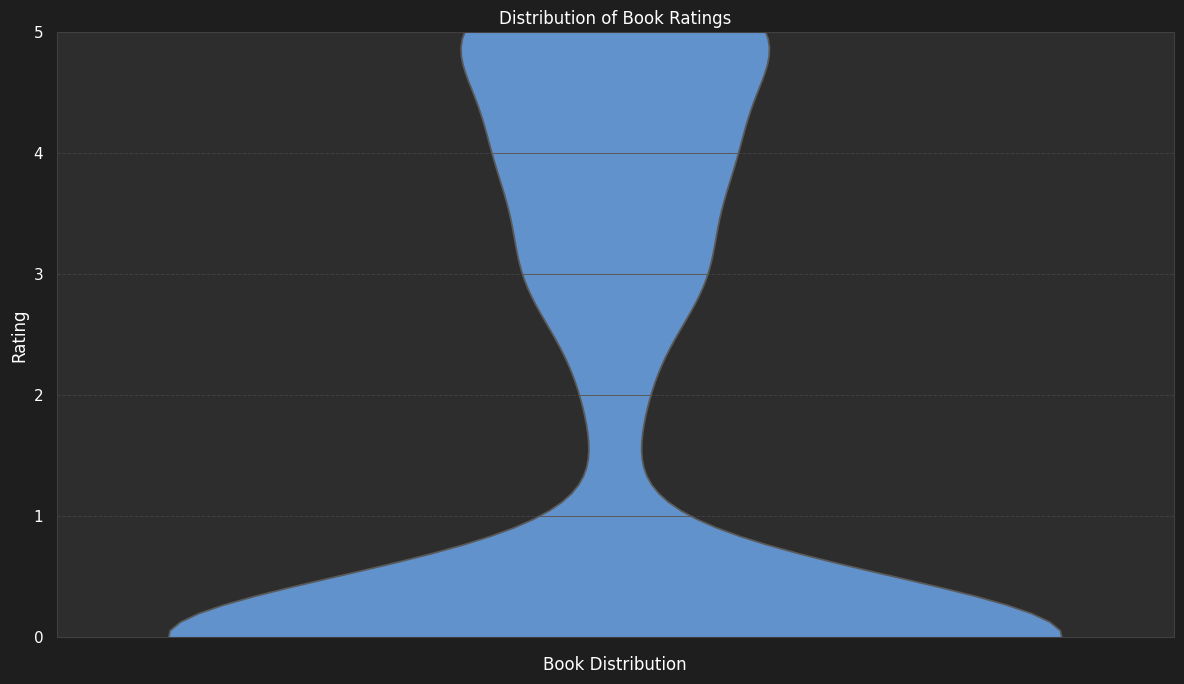

In [6]:
from typing import Optional
import matplotlib.pyplot as plt
import seaborn as sns

def create_rating_violin_plot(data, rating_column="My Rating", title: Optional[str] = None):
    """
    Create a violin plot of book ratings.

    Args:
        data (pandas.DataFrame): DataFrame containing book ratings data.
        rating_column (str): Column name for the ratings.
        title (str, optional): Custom title for the plot.

    Returns:
        matplotlib.figure.Figure: The plot figure.
    """
    # Set dark theme and styling
    plt.style.use('dark_background')
    sns.set_theme(style="darkgrid", palette="deep")
    plt.rcParams.update({
        'font.size': 12,
        'axes.facecolor': '#2d2d2d',
        'figure.facecolor': '#1e1e1e',
        'grid.color': '#404040',
        'text.color': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white'
    })

    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 7))

    # Create violin plot with enhanced styling
    sns.violinplot(
        y=rating_column,
        data=data,
        inner="stick",  # Show individual rating points
        color='#4a90e2',  # Bright blue that pops on dark background
        saturation=0.7,
        ax=ax
    )

    # Configure plot elements
    ax.set(
        xlabel='Book Distribution',
        ylabel='Rating',
        title=title or 'Distribution of Book Ratings'
    )
    ax.set_ylim(0, 5)
    ax.set_yticks([0, 1, 2, 3, 4, 5])

    # Style the spines
    for spine in ax.spines.values():
        spine.set_color('#404040')
        spine.set_linewidth(0.8)

    # Ensure title and labels are white
    ax.title.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    # Add gridlines for better readability
    ax.grid(axis='y', color='#404040', linestyle='--', linewidth=0.7)

    # Tighten layout
    plt.tight_layout()

    return fig

# Generate and display the plot
fig = create_rating_violin_plot(raw_goodreads)
plt.show()


Obviously, that's problematic. Let's fix this code so the violin plot excludes zeroes as before:

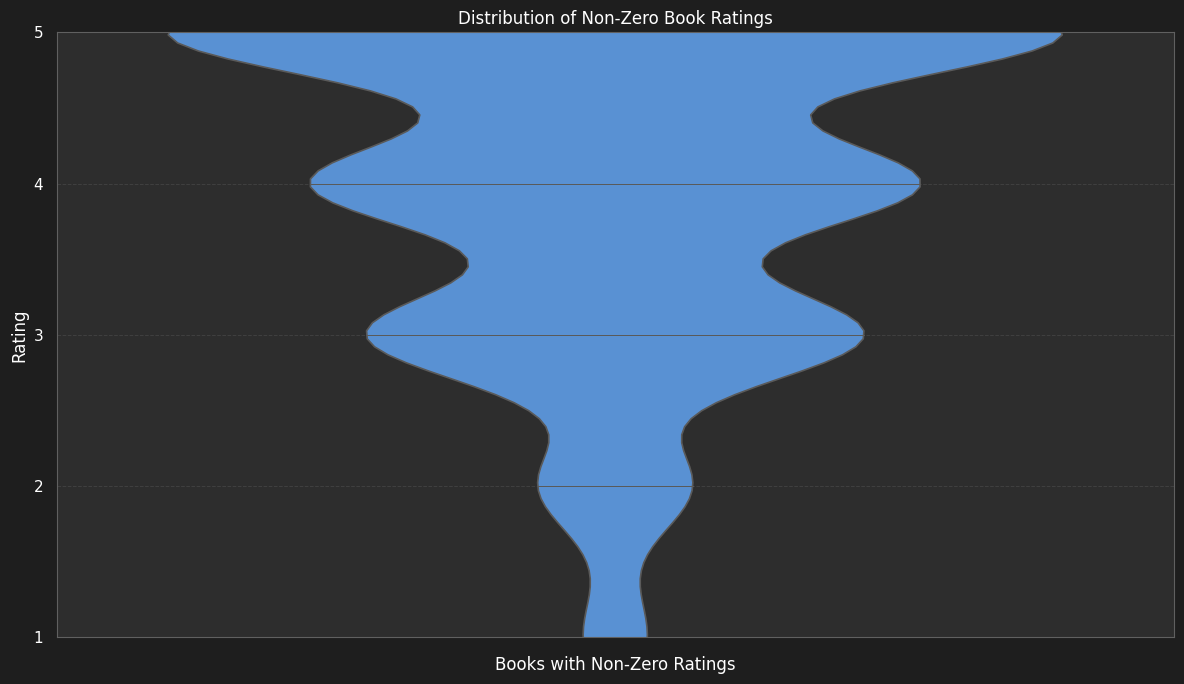

In [7]:
def create_violin_plot(data, rating_column="My Rating", title="Distribution of Non-Zero Book Ratings"):
    """
    Create a violin plot visualizing the distribution of non-zero book ratings.

    Args:
    data (pandas.DataFrame): The dataset containing the ratings.
    rating_column (str): Column name for the ratings.
    title (str): Title of the plot.

    Returns:
    matplotlib.figure.Figure: The plot figure.
    """
    # Set dark theme with refined styling
    plt.style.use('dark_background')
    sns.set_theme(style="darkgrid", palette="deep")
    plt.rcParams.update({
        'font.size': 12,
        'axes.facecolor': '#2d2d2d',
        'figure.facecolor': '#1e1e1e',
        'grid.color': '#404040',
        'text.color': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white',
        'legend.facecolor': '#2d2d2d',
        'legend.edgecolor': '#404040',
        'legend.title_fontsize': 10,
        'legend.fontsize': 10
    })

    # Filter ratings to exclude zero values
    filtered_data = data.loc[data[rating_column] != 0]

    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 7))

    # Create the violin plot
    sns.violinplot(
        y=rating_column,
        data=filtered_data,
        inner="stick",  # Show individual rating points
        linewidth=1.2,  # Enhance edge visibility
        color='#4a90e2',  # Bright blue for contrast
        saturation=0.8,
        ax=ax
    )

    # Configure plot elements
    ax.set(
        xlabel='Books with Non-Zero Ratings',
        ylabel='Rating',
        title=title
    )
    ax.set_ylim(1, 5)
    ax.set_yticks([1, 2, 3, 4, 5])

    # Style the spines for better contrast
    for spine in ax.spines.values():
        spine.set_color('#606060')
        spine.set_linewidth(0.8)

    # Add gridlines to enhance readability
    ax.grid(axis='y', color='#404040', linestyle='--', linewidth=0.7)

    # Tighten layout for better spacing
    plt.tight_layout()

    return fig

# Generate and display the plot
fig = create_violin_plot(raw_goodreads)
plt.show()


That looks much more sensible. In my data, it shows I am far from a normal distribution in my book reviews! Not abnormal, since people likely choose books they're likely to enjoy.

Now, rather than having to manually clean the data *every time we want to use it*, it's preferable to create a new file with cleansed data. I suggest we:
* Modify the column names, as spaces and such can be irritating when referring to columns, let's stick with the Python snake case.
* Modify the dtypes of the columns and make sure they represent the data well, and make our lives easier when analyzing the data.
* Separate into two bookshelves to represent the following. You can add your own code here to add in other bookshelves, too.
   * 'read'
   * 'want to read'
* Save the data to new files, so we can use it in the future without having to do all this work again!

In [8]:
"""
Preprocess the Goodreads data by:
1. Renaming columns for consistency
2. Converting data types for proper analysis
3. Creating separate dataframes for read and unread books
4. Saving processed data to files
"""

# Create a copy of raw data for modifications
mutable_raw = raw_goodreads.copy()

# Rename columns using more consistent naming convention
column_names = [
    'book_id', 'title', 'author', 'author_surname_to_firstname', 'additional_authors',
    'isbn', 'isbn13', 'my_rating', 'average_rating', 'publisher', 'binding',
    'number_of_pages', 'year_published', 'original_publication_year', 'date_read',
    'date_added', 'bookshelves', 'bookshelves_with_positions', 'exlusive_shelf',
    'my_review', 'spoiler', 'private_notes', 'read_count', 'owned_copies',
    'read_dates', 'genres', 'number_of_ratings'
]
mutable_raw.columns = column_names

# Convert date columns
mutable_raw['date_added'] = pd.to_datetime(mutable_raw['date_added'])

# Convert numeric columns
numeric_columns = [
    'year_published', 'original_publication_year', 'number_of_pages',
    'my_rating', 'average_rating', 'read_count', 'owned_copies', 'book_id'
]
for col in numeric_columns:
    mutable_raw[col] = pd.to_numeric(mutable_raw[col], errors='coerce')

# Split into read and to-read bookshelves
read_bookshelf = mutable_raw.loc[mutable_raw["my_rating"] != 0]
to_read_bookshelf = mutable_raw.loc[mutable_raw["my_rating"] == 0]

# Save processed data
read_bookshelf.to_pickle('read_bookshelf.pkl')
to_read_bookshelf.to_pickle('to_read_bookshelf.pkl')

print("\nData Types After Processing:")
print(mutable_raw.dtypes)


Data Types After Processing:
book_id                                 int64
title                                  object
author                                 object
author_surname_to_firstname            object
additional_authors                     object
isbn                                   object
isbn13                                 object
my_rating                               int64
average_rating                        float64
publisher                              object
binding                                object
number_of_pages                       float64
year_published                        float64
original_publication_year             float64
date_read                              object
date_added                     datetime64[ns]
bookshelves                            object
bookshelves_with_positions             object
exlusive_shelf                         object
my_review                              object
spoiler                                object
priv

Next, let's compare how different our personal ratings are against the community's ratings.

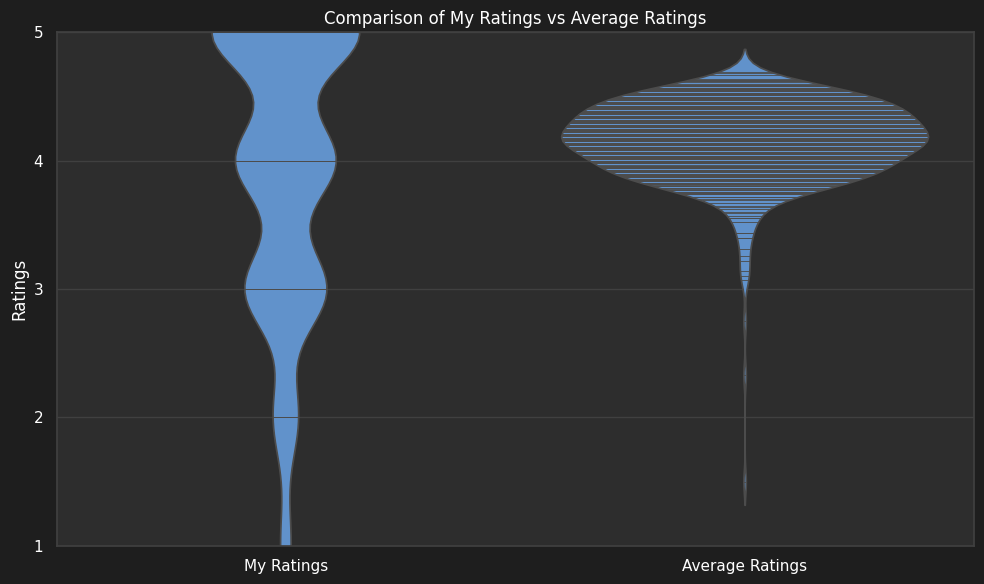

In [9]:
"""
Compare personal book ratings against average community ratings using a violin plot.
"""

# Extract ratings data
ratings_comparison = read_bookshelf.loc[:, ['my_rating', 'average_rating']]

def create_ratings_comparison_plot(data):
   """
   Create a violin plot comparing personal vs average book ratings.

   Args:
       data (pd.DataFrame): DataFrame with 'my_rating' and 'average_rating' columns

   Returns:
       matplotlib.figure.Figure: The plot figure
   """
   # Set dark theme with proper styling
   plt.style.use('dark_background')
   sns.set_theme(style="darkgrid")
   plt.rcParams.update({
       'font.size': 12,
       'axes.facecolor': '#2d2d2d',
       'figure.facecolor': '#1e1e1e',
       'grid.color': '#404040',
       'text.color': 'white',
       'axes.labelcolor': 'white',
       'axes.titlecolor': 'white',
       'xtick.color': 'white',
       'ytick.color': 'white'
   })

   plt.figure(figsize=(10, 6))

   # Create violin plot
   plot = sns.violinplot(
       data=data,
       inner="stick",
       color='#4a90e2',
       saturation=0.7
   )

   # Configure plot elements
   plot.set(
       xlabel='',
       ylabel='Ratings',
       title='Comparison of My Ratings vs Average Ratings'
   )

   # Set axis properties
   plot.set_ylim(1, 5)
   plot.set_yticks([1, 2, 3, 4, 5])
   x_labels = ["My Ratings", "Average Ratings"]
   plt.xticks(range(len(x_labels)), x_labels)

   # Only show gridlines at integer values
   plot.yaxis.grid(True, which='major')
   plot.yaxis.grid(False, which='minor')

   # Style the spines
   for spine in plot.spines.values():
       spine.set_color('#404040')

   # Adjust layout
   plt.tight_layout()

   return plt.gcf()

# Create and display the plot
fig = create_ratings_comparison_plot(ratings_comparison)
plt.show()

We can always just make use of the describe method, of course:

In [10]:
ratings_comparison.describe()

my_rating  average_rating
count  522.000000      522.000000
mean     3.955939        4.144866
std      1.078481        0.315775
min      1.000000        1.500000
25%      3.000000        3.962500
50%      4.000000        4.170000
75%      5.000000        4.370000
max      5.000000        4.690000

Let's dig deeper into the differences between my ratings and the community ratings, by creating a histogram known as a "population pyramid". The population pyramid plot visually compares the distribution of "my rating" versus the "average rating" of books, with each side representing a different rating category and the height of each section indicating the count of books rated in that category.

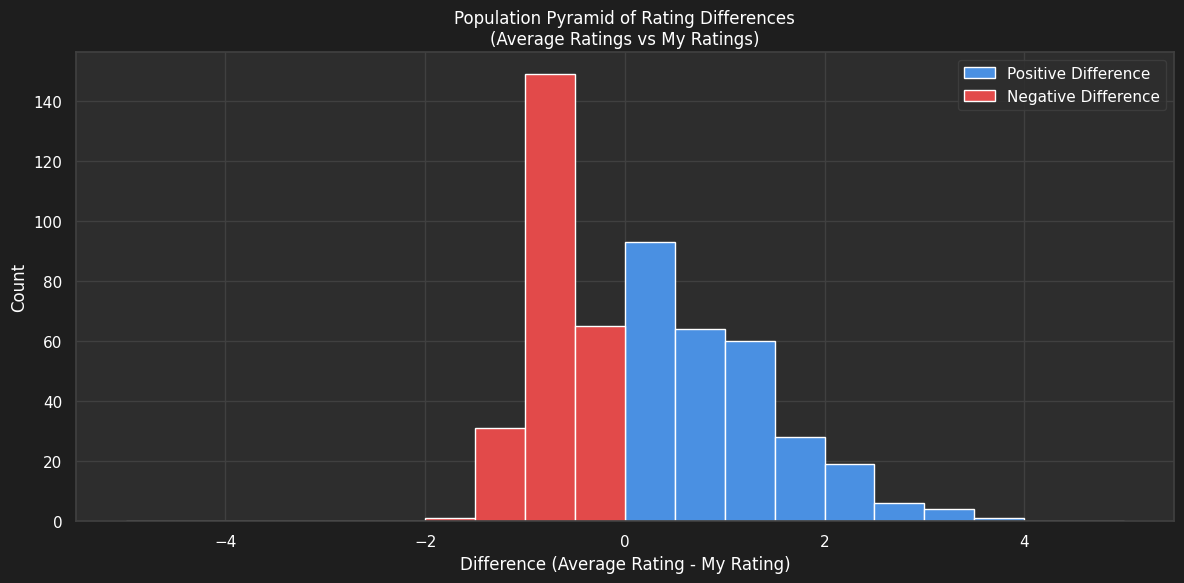

In [11]:
"""
Create a population pyramid histogram showing the difference between average and personal ratings.
"""

# Calculate rating differences
comparison_data = read_bookshelf[['my_rating', 'average_rating']]
comparison_data = comparison_data.assign(difference = comparison_data['average_rating'] - comparison_data['my_rating'])

def create_rating_difference_histogram(data):
   """
   Create a population pyramid histogram showing rating differences.

   Args:
       data (pd.DataFrame): DataFrame with 'difference' column

   Returns:
       matplotlib.figure.Figure: The plot figure
   """
   # Set dark theme with proper styling
   plt.style.use('dark_background')
   sns.set_theme(style="darkgrid")
   plt.rcParams.update({
       'font.size': 12,
       'axes.facecolor': '#2d2d2d',
       'figure.facecolor': '#1e1e1e',
       'grid.color': '#404040',
       'text.color': 'white',
       'axes.labelcolor': 'white',
       'axes.titlecolor': 'white',
       'xtick.color': 'white',
       'ytick.color': 'white'
   })

   # Separate positive and negative differences
   positive_differences = data[data['difference'] > 0]['difference']
   negative_differences = data[data['difference'] < 0]['difference']

   # Create bins for detailed distribution
   bins = [x * 0.1 for x in range(-50, 55, 5)]

   # Create and style the plot
   fig, ax = plt.subplots(figsize=(12, 6))

   # Plot differences
   ax.hist(positive_differences, bins=bins, histtype='bar',
           stacked=True, label='Positive Difference', color='#4a90e2')
   ax.hist(negative_differences, bins=bins, histtype='bar',
           stacked=True, label='Negative Difference', color='#e24a4a')

   # Configure plot elements
   ax.set(
       xlabel='Difference (Average Rating - My Rating)',
       ylabel='Count',
       title='Population Pyramid of Rating Differences\n(Average Ratings vs My Ratings)'
   )

   # Style the spines
   for spine in ax.spines.values():
       spine.set_color('#404040')

   ax.legend()
   plt.tight_layout()

   return fig

# Create and display the plot
fig = create_rating_difference_histogram(comparison_data)
plt.show()

This plot visualizes the top 25 differences between "my rating" and "average rating" of books, with each bar representing the number of book ratings with x amount of difference

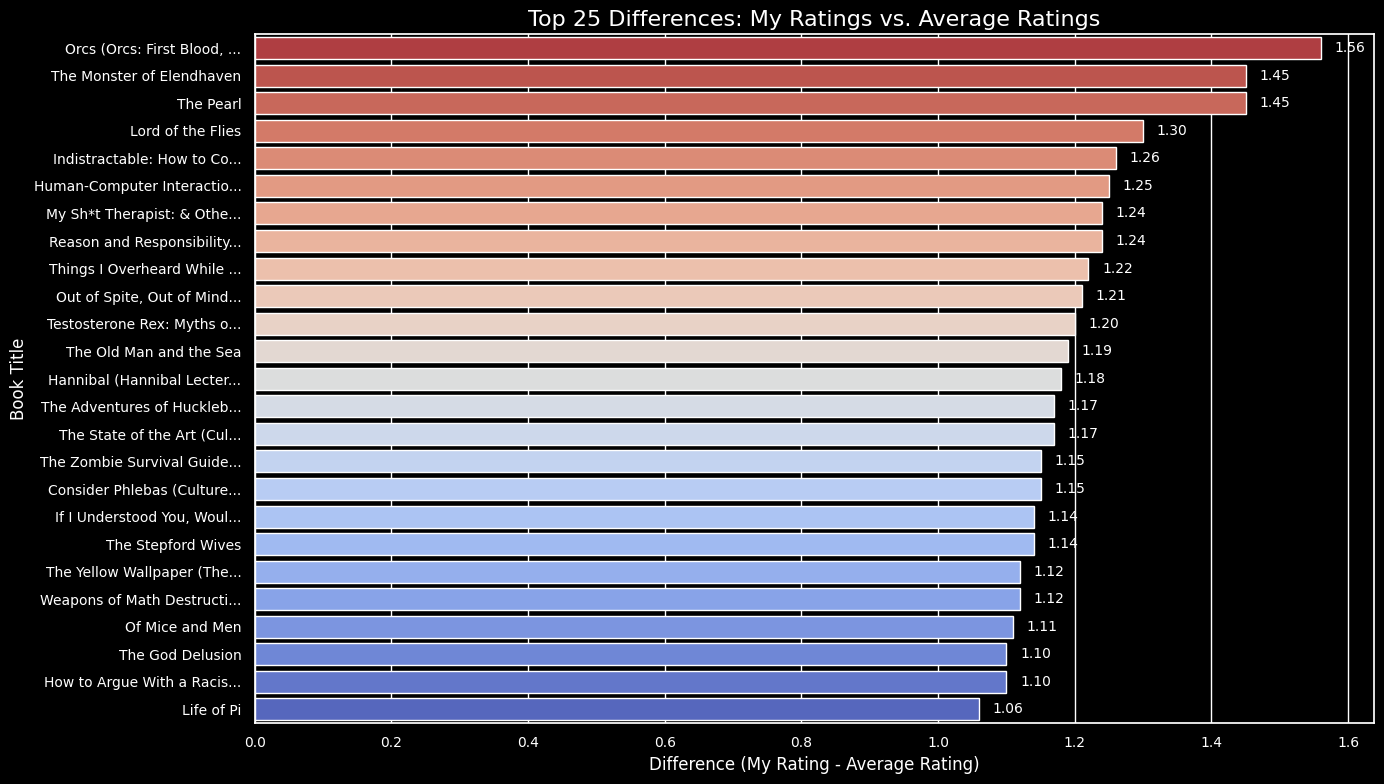

In [12]:
# Ensure consistent styling
sns.set_theme(style="darkgrid", palette="deep")
plt.style.use("dark_background")

# Create a new dataframe to store the difference calculation
difference_data = read_bookshelf[['title', 'my_rating', 'average_rating']].copy()
difference_data['difference'] = difference_data['my_rating'] - difference_data['average_rating']

def create_top_differences_barplot(data, n=25, title_length=25):
    """
    Create a bar plot of the top N books with the largest difference between personal and average ratings.

    Args:
    data (pandas.DataFrame): DataFrame containing 'title', 'my_rating', 'average_rating', and 'difference' columns
    n (int): Number of top differences to display
    title_length (int): Maximum length of book titles to display

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Sort in descending order of difference
    sorted_data = data.sort_values(by='difference', ascending=False)

    # Select top N differences
    top_n = sorted_data.head(n).copy()

    # Truncate titles for better visualization
    top_n['title'] = top_n['title'].apply(lambda x: x[:title_length] + '...' if len(x) > title_length else x)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.barplot(
        data=top_n,
        x='difference',
        y='title',
        ax=ax,
        palette="coolwarm_r",
        hue='title',
        dodge=False,
        legend=False  # Suppress legend for 'title' as it duplicates labels
    )

    # Customize the plot
    ax.set_xlabel('Difference (My Rating - Average Rating)', fontsize=12)
    ax.set_ylabel('Book Title', fontsize=12)
    ax.set_title(f'Top {n} Differences: My Ratings vs. Average Ratings', fontsize=16)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)

    # Add value annotations for better insights
    for i, v in enumerate(top_n['difference']):
        ax.text(v + 0.02, i, f'{v:.2f}', color='white', va='center', fontsize=10)

    # Tighten layout for better spacing
    plt.tight_layout()

    return fig

# Generate and display the plot
fig = create_top_differences_barplot(difference_data)
plt.show()


Let's do the opposite, too.

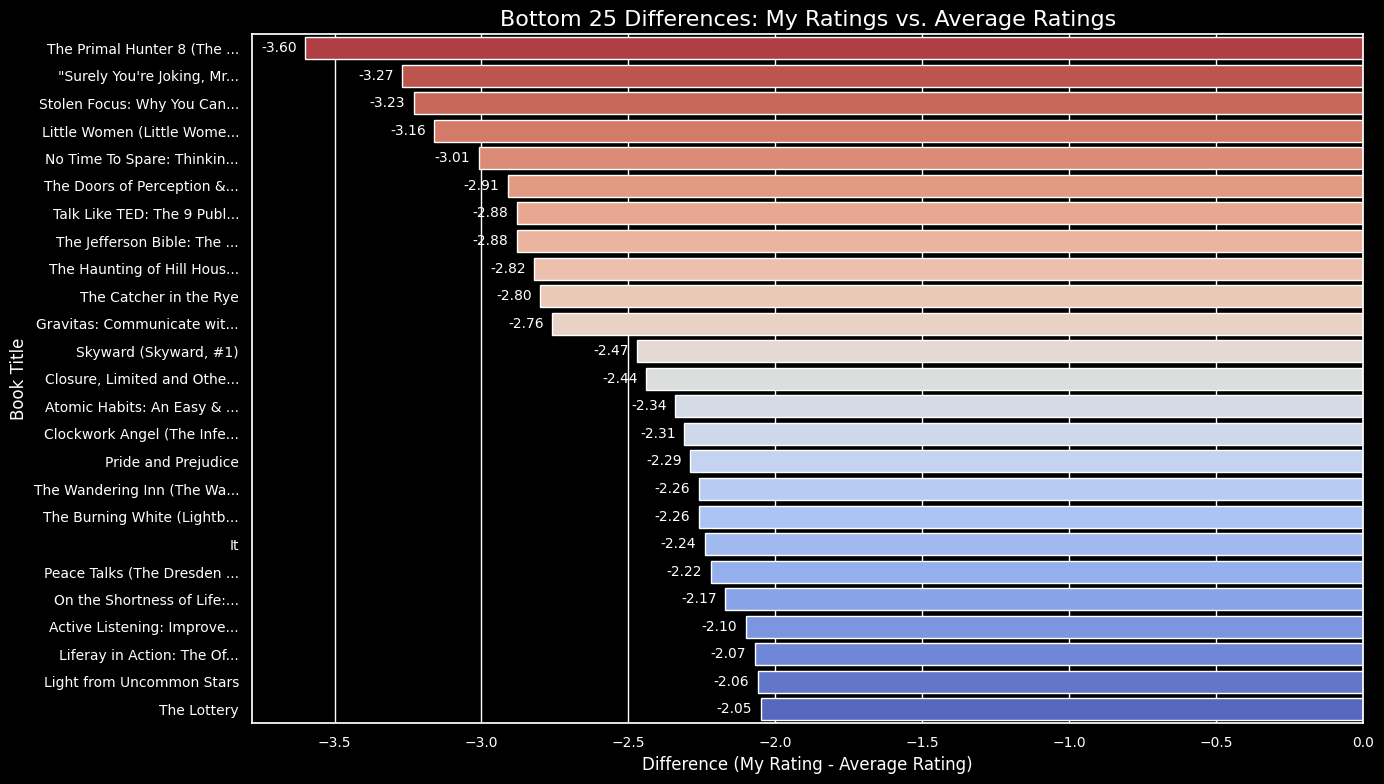

In [13]:
def create_bottom_differences_barplot(data, n=25, title_length=25):
    """
    Create a bar plot of the bottom N books with the largest negative difference
    between personal and average ratings, with text annotations outside the bars.

    Args:
    data (pandas.DataFrame): DataFrame containing 'title', 'my_rating', 'average_rating', and 'difference' columns
    n (int): Number of bottom differences to display
    title_length (int): Maximum length of book titles to display

    Returns:
    matplotlib.figure.Figure: The plot figure
    """
    # Sort in ascending order to get the bottom differences
    sorted_data = data.sort_values(by='difference', ascending=True)

    # Select bottom N differences
    bottom_n = sorted_data.head(n).copy()

    # Truncate titles for better visualization
    bottom_n['title'] = bottom_n['title'].apply(lambda x: x[:title_length] + '...' if len(x) > title_length else x)

    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for readability
    sns.barplot(
        data=bottom_n,
        x='difference',
        y='title',
        ax=ax,
        palette="coolwarm_r",  # Use reversed palette for visual contrast
        hue='title',
        dodge=False,
        legend=False
    )

    # Customize the plot
    ax.set_xlabel('Difference (My Rating - Average Rating)', fontsize=12)
    ax.set_ylabel('Book Title', fontsize=12)
    ax.set_title(f'Bottom {n} Differences: My Ratings vs. Average Ratings', fontsize=16)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)

    # Add value annotations outside the bars
    for i, v in enumerate(bottom_n['difference']):
        ax.text(
            v - 0.15 if v < 0 else v + 0.1,  # Position text outside the bar
            i,
            f'{v:.2f}',
            color='white',
            va='center',
            fontsize=10
        )

    # Tighten layout to prevent clipping
    plt.tight_layout()

    return fig

# Create and display the plot
fig = create_bottom_differences_barplot(difference_data)
plt.show()


# Reviewed vs Not Reviewed
It's also nice to see how many books you've reviewed vs those you've just rated:

<ipython-input-14-95c4d16009d7>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


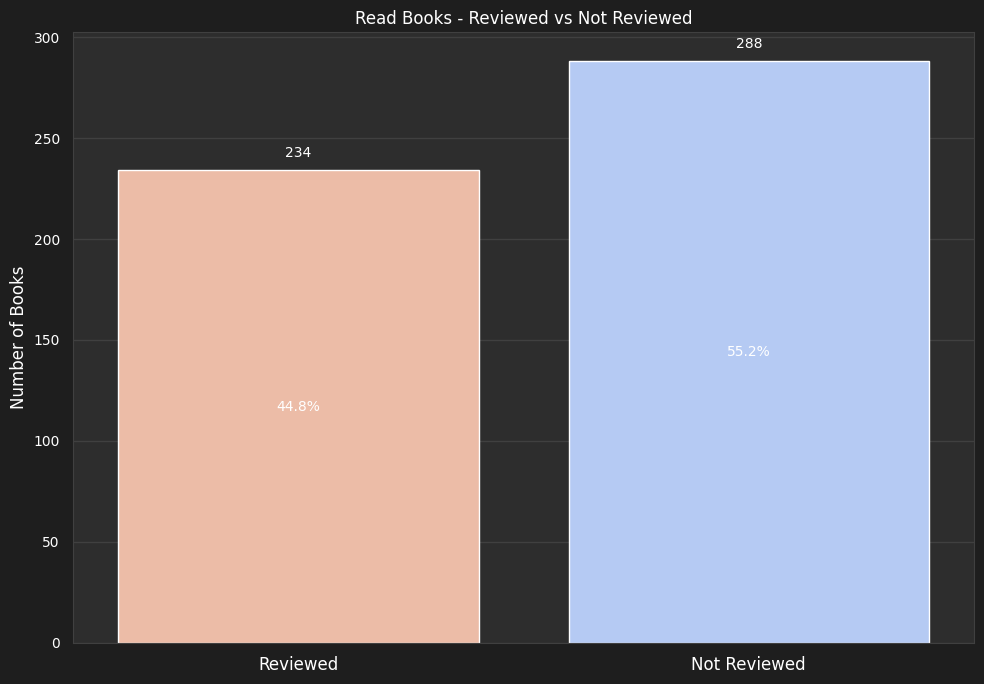

In [14]:
def analyze_review_counts(data, review_column="my_review", title="Read Books - Reviewed vs Not Reviewed"):
    """
    Analyze and visualize the count of books with and without reviews.

    Args:
        data (pandas.DataFrame): DataFrame containing the review column.
        review_column (str): Column name indicating reviews.
        title (str): Title for the plot.

    Returns:
        matplotlib.figure.Figure: The plot figure.
    """
    # Count number of books with and without reviews
    no_review_count = data[review_column].isna().sum()
    review_count = data[review_column].notna().sum()

    # Prepare data for plotting
    review_vs_not_reviewed_df = pd.DataFrame({
        'Count': [review_count, no_review_count],
        'Category': ['Reviewed', 'Not Reviewed']
    })

    # Set dark theme
    plt.style.use('dark_background')
    sns.set_theme(style="darkgrid")
    plt.rcParams.update({
        'font.size': 12,
        'axes.facecolor': '#2d2d2d',
        'figure.facecolor': '#1e1e1e',
        'grid.color': '#404040',
        'text.color': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white'
    })

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 7))

    # Create bar plot
    sns.barplot(
        x='Category',
        y='Count',
        data=review_vs_not_reviewed_df,
        palette="coolwarm_r",
        ax=ax
    )

    # Customize the plot
    ax.set(
        xlabel='',
        ylabel='Number of Books',
        title=title
    )
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=10)

    # Add value labels on the bars
    for i, v in enumerate(review_vs_not_reviewed_df['Count']):
        ax.text(
            i,
            v + 5,
            str(v),
            ha='center',
            va='bottom',
            fontsize=10,
            color='white'
        )

    # Add percentage labels
    total = review_count + no_review_count
    for i, v in enumerate(review_vs_not_reviewed_df['Count']):
        percentage = (v / total) * 100
        ax.text(
            i,
            v / 2,
            f'{percentage:.1f}%',
            ha='center',
            va='center',
            fontsize=10,
            color='white'
        )

    # Style the spines for better contrast
    for spine in ax.spines.values():
        spine.set_color('#404040')
        spine.set_linewidth(0.8)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return fig

# Create and display the plot
fig = analyze_review_counts(read_bookshelf)
plt.show()


Let's make some 'buckets' or 'bins' to represent similar lengths of books you've read, and plot that. We could also do this for books you want to read, by changing the data source.

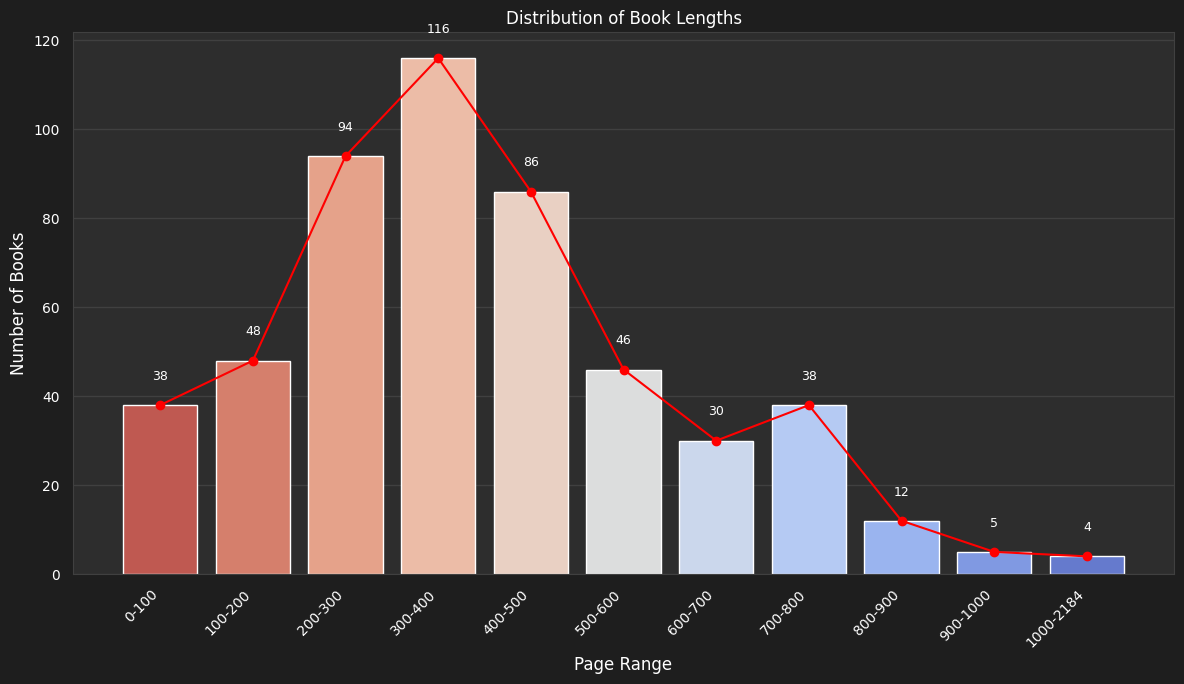

In [15]:
def analyze_book_length_distribution(data, pages_column="number_of_pages", max_bin=1000, bin_size=100):
    """
    Analyze and visualize the distribution of book lengths.

    Args:
        data (pandas.DataFrame): DataFrame containing the book lengths column.
        pages_column (str): Column name indicating the number of pages.
        max_bin (int): Maximum bin size before the last bin.
        bin_size (int): Size of each bin.

    Returns:
        matplotlib.figure.Figure: The plot figure.
    """
    # Create bins for the number of pages
    bins = list(range(0, max_bin + bin_size, bin_size))
    bins.append(int(data[pages_column].max()))

    # Create labels for the bins
    bin_labels = [f"{min_val}-{max_val}" for min_val, max_val in zip(bins[:-1], bins[1:])]

    # Bin the data using pd.cut
    book_pages_bins = pd.cut(data[pages_column], bins, labels=bin_labels)

    # Count the number of books in each bin
    book_pages_df = pd.DataFrame({
        "Page_Range": bin_labels,
        "Count": pd.cut(data[pages_column], bins).value_counts().sort_index()
    })

    # Set dark theme
    plt.style.use('dark_background')
    sns.set_theme(style="darkgrid")
    plt.rcParams.update({
        'font.size': 12,
        'axes.facecolor': '#2d2d2d',
        'figure.facecolor': '#1e1e1e',
        'grid.color': '#404040',
        'text.color': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white'
    })

    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 7))

    # Bar plot for count in each bin
    sns.barplot(
        x='Page_Range',
        y='Count',
        data=book_pages_df,
        hue='Page_Range',
        dodge=False,
        palette="coolwarm_r",
        ax=ax,
        legend=False  # Suppress legend to avoid redundancy
    )

    # Line plot to show trend
    ax.plot(
        range(len(book_pages_df["Page_Range"])),
        book_pages_df["Count"],
        marker="o",
        color="red",
        linestyle="-",
        linewidth=1.5,
        markersize=6
    )

    # Customize the plot
    ax.set(
        xlabel='Page Range',
        ylabel='Number of Books',
        title='Distribution of Book Lengths'
    )
    plt.xticks(range(len(book_pages_df["Page_Range"])), book_pages_df["Page_Range"], rotation=45, ha='right')
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Add value labels on the bars
    for i, v in enumerate(book_pages_df['Count']):
        ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=9, color='white')

    # Style the spines for better contrast
    for spine in ax.spines.values():
        spine.set_color('#404040')
        spine.set_linewidth(0.8)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return fig

# Create and display the plot
fig = analyze_book_length_distribution(read_bookshelf)
plt.show()


Does the time investment effect your rating? Let's find out!

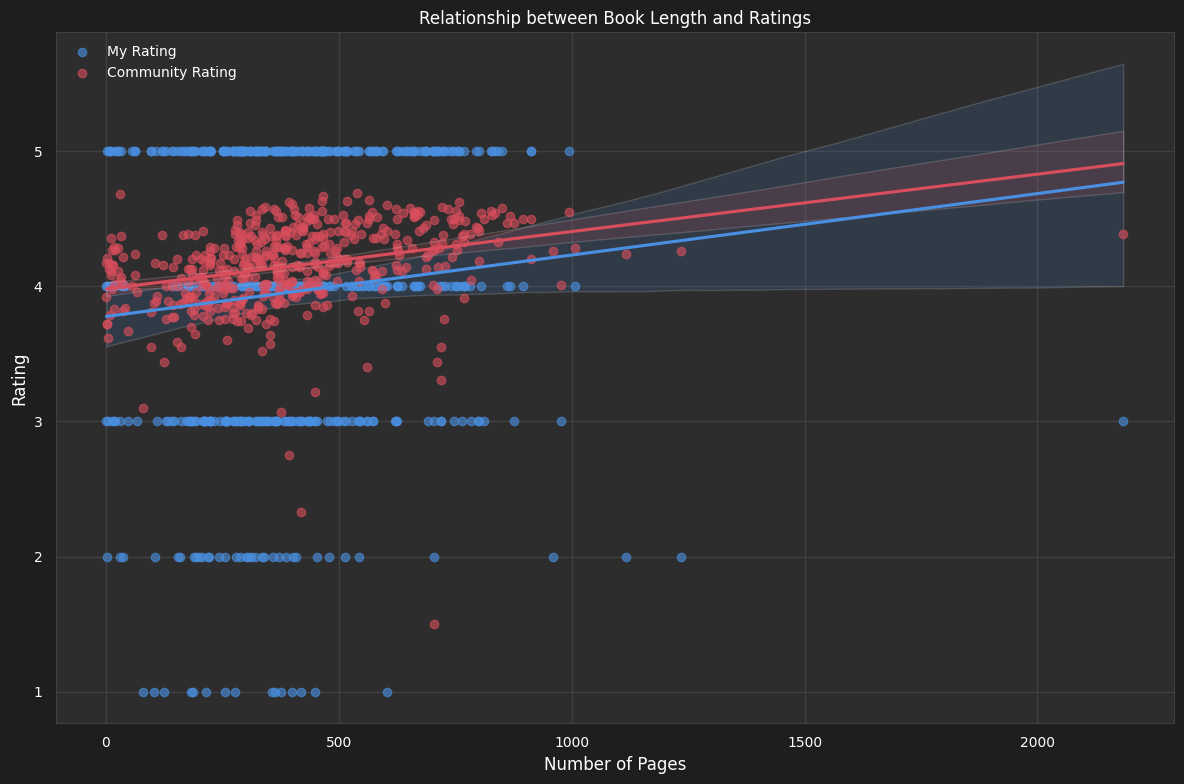

In [16]:
def analyze_ratings_vs_book_length(data, pages_column="number_of_pages", my_rating_column="my_rating", avg_rating_column="average_rating"):
    """
    Analyze and visualize the relationship between book length and ratings (personal and community).

    Args:
        data (pandas.DataFrame): DataFrame containing columns for book lengths and ratings.
        pages_column (str): Column name for the number of pages.
        my_rating_column (str): Column name for personal ratings.
        avg_rating_column (str): Column name for community ratings.

    Returns:
        matplotlib.figure.Figure: The plot figure.
    """
    # Set dark theme and styling
    plt.style.use('dark_background')
    sns.set_theme(style="darkgrid")
    plt.rcParams.update({
        'font.size': 12,
        'axes.facecolor': '#2d2d2d',
        'figure.facecolor': '#1e1e1e',
        'grid.color': '#404040',
        'text.color': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white'
    })

    # Create the figure and subplot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Regression plot for personal ratings vs number of pages
    sns.regplot(
        x=pages_column,
        y=my_rating_column,
        data=data,
        ax=ax,
        label='My Rating',
        scatter_kws={'alpha': 0.6, 'color': '#4a90e2'},
        line_kws={'color': '#4a90e2'}
    )

    # Regression plot for community ratings vs number of pages
    sns.regplot(
        x=pages_column,
        y=avg_rating_column,
        data=data,
        ax=ax,
        label='Community Rating',
        scatter_kws={'alpha': 0.6, 'color': '#d94e5d'},
        line_kws={'color': '#d94e5d'}
    )

    # Customize the plot
    ax.set(
        xlabel='Number of Pages',
        ylabel='Rating',
        title='Relationship between Book Length and Ratings'
    )
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Add legend
    ax.legend(loc='upper left', fontsize=10, frameon=False)

    # Style the spines for better contrast
    for spine in ax.spines.values():
        spine.set_color('#404040')
        spine.set_linewidth(0.8)

    # Adjust layout to prevent clipping
    plt.tight_layout()

    return fig

# Create and display the plot
fig = analyze_ratings_vs_book_length(read_bookshelf)
plt.show()


Taking inspiration from [this](https://bgstieber.github.io/post/my-year-in-books-goodreads-data-analysis-in-r/) article, let's recreate the year-long progress R plot in seaborn:



In [17]:
def analyze_book_data(read_bookshelf, dates=None):
    """
    Analyze book data from a given dataset.

    This function performs the following data science tasks:
    1. Data filtering based on date range.
    2. Data type inspection.
    3. Date parsing.
    4. Missing value analysis.
    5. Data cleaning (removing rows with missing values).
    6. Basic statistical analysis (count and date range).

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book data.
        dates (tuple): Optional. Tuple of two dates to filter the data (start_date, end_date).

    Returns:
        pd.DataFrame: Cleaned and filtered DataFrame.
    """

    # Step 1: Data Overview
    print(f"Total books in the dataset: {len(read_bookshelf)}")

    # Step 2: Data Filtering
    if dates:
        filtered_data = read_bookshelf[
            read_bookshelf["date_read"].between(dates[0], dates[1], inclusive='both')
        ]
        print(f"Books in the specified date range: {len(filtered_data)}")
    else:
        filtered_data = read_bookshelf
        print("No date range specified, using all data")

    # Step 3: Data Type Inspection
    print("\nData types of relevant columns:")
    print(filtered_data[["date_read", "title", "number_of_pages"]].dtypes)

    # Step 4: Date Parsing
    filtered_data.loc[:, "date_read"] = pd.to_datetime(filtered_data["date_read"], errors='coerce')

    # Step 5: Missing Value Analysis
    print("\nMissing values in relevant columns:")
    print(filtered_data[["date_read", "title", "number_of_pages"]].isnull().sum())

    # Step 6: Data Cleaning
    cleaned_data = filtered_data.dropna(subset=["date_read", "title", "number_of_pages"])
    print(f"\nBooks after removing rows with missing values: {len(cleaned_data)}")

    # Step 7: Basic Statistical Analysis
    min_date = cleaned_data["date_read"].min()
    max_date = cleaned_data["date_read"].max()
    print(f"Date range in the cleaned data: {min_date} to {max_date}")

    return cleaned_data

dates = ('2024-01-01', '2024-12-31')
analyzed_data = analyze_book_data(read_bookshelf, dates)


Total books in the dataset: 522
Books in the specified date range: 0

Data types of relevant columns:
date_read           object
title               object
number_of_pages    float64
dtype: object

Missing values in relevant columns:
date_read          0
title              0
number_of_pages    0
dtype: int64

Books after removing rows with missing values: 0
Date range in the cleaned data: nan to nan


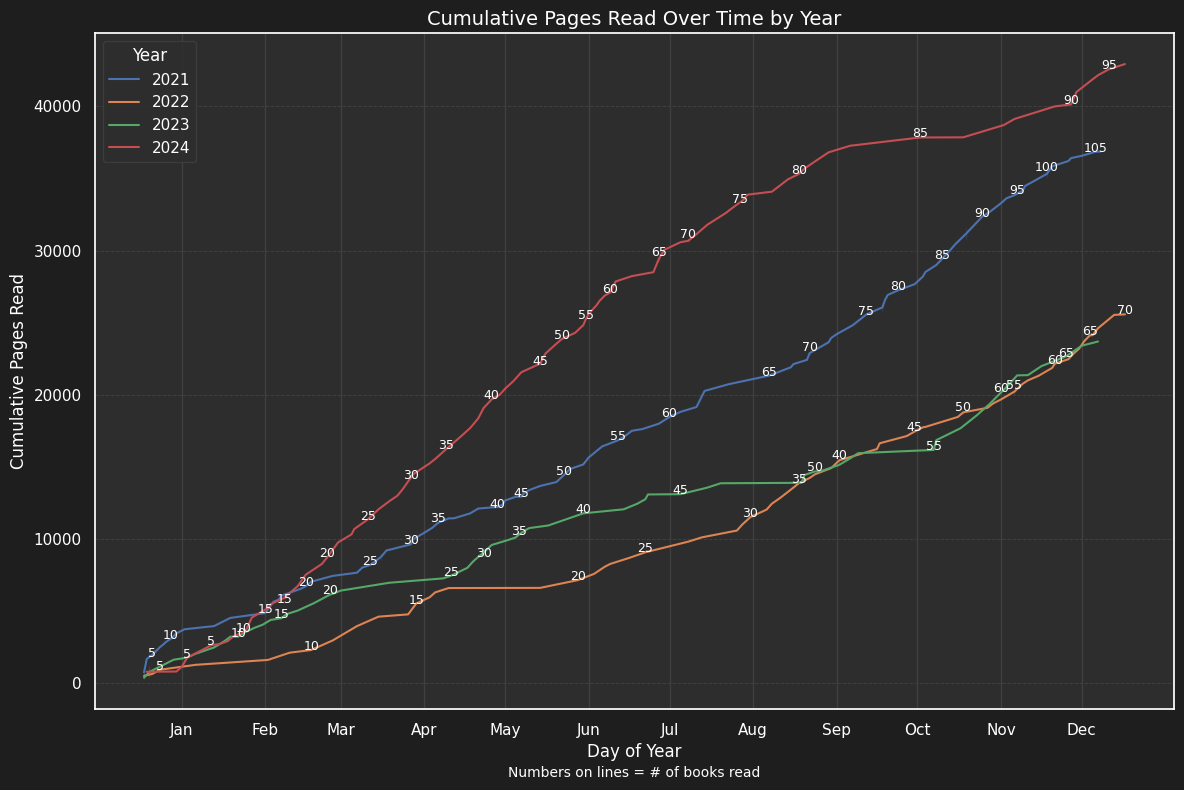

In [18]:
def analyze_and_visualize_book_data(read_bookshelf, dates=None, mod_books_parameter=5):
    """
    Analyze and visualize book reading data over time.

    This function performs the following data science tasks:
    1. Data filtering and cleaning.
    2. Date parsing and manipulation.
    3. Time series analysis.
    4. Data aggregation and cumulative calculations.
    5. Data visualization using Matplotlib and Seaborn.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book data.
        dates (list): Optional. List of two dates to filter the data [start_date, end_date].
        mod_books_parameter (int): Parameter to control frequency of book count annotations.

    Returns:
        None (displays a plot).
    """

    # Step 1: Data Cleaning and Preprocessing
    summary_by_date = read_bookshelf[["date_read", "title", "number_of_pages"]].dropna()
    summary_by_date['date_read'] = pd.to_datetime(summary_by_date['date_read'], errors='coerce')

    # Step 2: Data Filtering
    if dates:
        summary_by_date = summary_by_date[
            summary_by_date['date_read'].between(dates[0], dates[1], inclusive='both')
        ]
    summary_by_date.sort_values("date_read", inplace=True)

    # Step 3: Visualization Setup
    plt.figure(figsize=(12, 8))

    # Step 4: Time Series Analysis and Visualization
    for year in summary_by_date['date_read'].dt.year.unique():
        year_data = summary_by_date[summary_by_date['date_read'].dt.year == year].copy()

        # Cumulative Calculations
        year_data['cumu_pages_read'] = year_data["number_of_pages"].cumsum()
        year_data['day_of_year'] = year_data['date_read'].dt.dayofyear
        year_data['cumu_books_read'] = range(1, len(year_data) + 1)

        # Line Plot for Cumulative Pages Read
        sns.lineplot(
            x="day_of_year",
            y="cumu_pages_read",
            data=year_data,
            label=year,
            linewidth=1.5
        )

        # Annotating the Plot
        for index, row in year_data.iterrows():
            if row.cumu_books_read % mod_books_parameter == 0:
                plt.text(
                    row.day_of_year,
                    row.cumu_pages_read,
                    str(row.cumu_books_read),
                    fontsize=9,
                    color='white',
                    ha='center'
                )

    # Step 5: X-Axis Adjustment
    month_starts = [15, 46, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(month_starts, month_names)

    # Step 6: Plot Styling and Labeling
    plt.xlabel("Day of Year")
    plt.ylabel("Cumulative Pages Read")
    plt.title("Cumulative Pages Read Over Time by Year", fontsize=14)
    plt.legend(title="Year")
    plt.text(
        x=0.5,
        y=-0.1,
        s="Numbers on lines = # of books read",
        transform=plt.gca().transAxes,
        ha='center',
        fontsize=10,
        color='white'
    )

    # Step 7: Final Adjustments
    plt.grid(axis='y', linestyle='--', linewidth=0.7, color='#404040')
    plt.tight_layout()

    # Display the Plot
    plt.show()

dates = ['2021-01-01', '2024-12-31']
analyze_and_visualize_book_data(read_bookshelf, dates)


# Review length vs rating

Perhaps the length of your reviews provides insight into your ratings of a book?

R-squared: 0.0053
Coefficient: -0.0012
Intercept: 3.9897
Shape of X: (522, 1)
Shape of Y: (522,)
Number of non-null reviews: 522
Number of unique ratings: 5


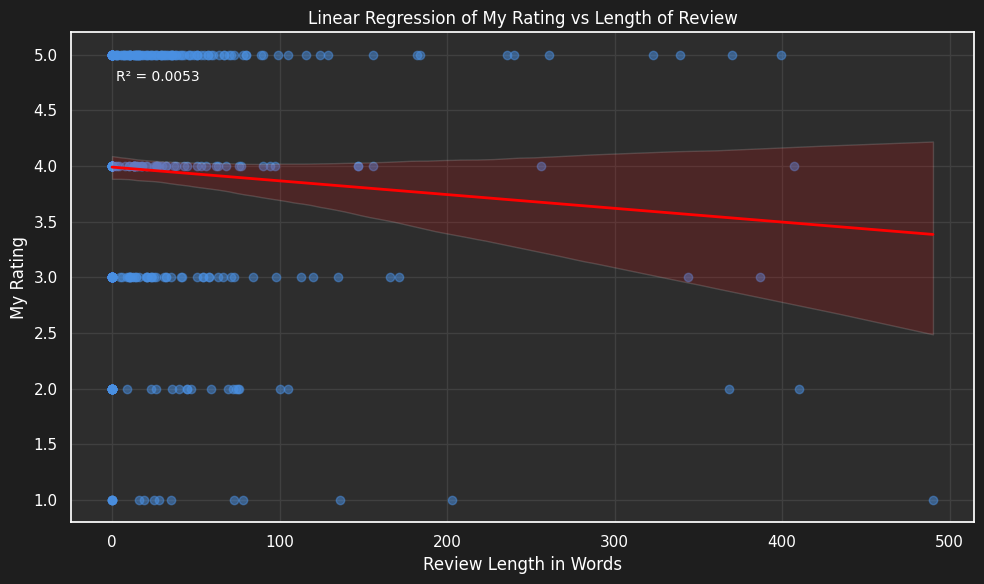

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from typing import Tuple
import numpy as np

def prepare_data(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """
    Prepare the data for analysis by extracting review lengths and ratings.

    Args:
        df (pd.DataFrame): The input dataframe containing review and rating data.

    Returns:
        Tuple[np.ndarray, np.ndarray]: X (review lengths) and Y (ratings) arrays.
    """
    df["my_review"] = df["my_review"].fillna("").astype(str)
    X = df['my_review'].apply(lambda x: len(x.split())).values.reshape(-1, 1)
    Y = df["my_rating"].values
    return X, Y

def fit_linear_regression(X: np.ndarray, Y: np.ndarray) -> Tuple[LinearRegression, float]:
    """
    Fit a linear regression model and calculate R-squared.

    Args:
        X (np.ndarray): Input features (review lengths).
        Y (np.ndarray): Target variable (ratings).

    Returns:
        Tuple[LinearRegression, float]: Fitted model and R-squared value.
    """
    model = LinearRegression().fit(X, Y)
    Y_pred = model.predict(X)
    r2 = r2_score(Y, Y_pred)
    return model, r2

def plot_regression(X: np.ndarray, Y: np.ndarray, r2: float):
    """
    Create a regression plot of review length vs rating.

    Args:
        X (np.ndarray): Input features (review lengths).
        Y (np.ndarray): Target variable (ratings).
        r2 (float): The R-squared value of the linear regression.
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=X.flatten(),
        y=Y,
        scatter_kws={"alpha": 0.5, "color": "#4a90e2"},
        line_kws={"color": "red", "linewidth": 2}
    )
    plt.xlabel("Review Length in Words")
    plt.ylabel("My Rating")
    plt.title("Linear Regression of My Rating vs Length of Review")
    plt.text(0.05, 0.9, f'R² = {r2:.4f}', transform=plt.gca().transAxes, fontsize=10)
    plt.tight_layout()
    plt.show()

def analyze_review_length_vs_rating(df: pd.DataFrame):
    """
    Perform analysis of review length vs rating.

    Args:
        df (pd.DataFrame): The input dataframe containing review and rating data.
    """
    # Step 1: Data Preparation
    X, Y = prepare_data(df)

    # Step 2: Model Fitting
    model, r2 = fit_linear_regression(X, Y)
    print(f"R-squared: {r2:.4f}")

    # Step 3: Diagnostic Information
    try:
        coefficient = model.coef_[0]
        print(f"Coefficient: {coefficient:.4f}")
    except Exception as e:
        print(f"Error retrieving coefficient: {e}")

    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of Y: {Y.shape}")
    print(f"Number of non-null reviews: {df['my_review'].notna().sum()}")
    print(f"Number of unique ratings: {df['my_rating'].nunique()}")

    # Step 4: Plot the Regression
    plot_regression(X, Y, r2)

# Example Usage
review_length_vs_rating_df = read_bookshelf.copy()
analyze_review_length_vs_rating(review_length_vs_rating_df)


Using linear regression, we found an R-squared value of 0.0065, indicating that review length explains only 0.65% of the variance in ratings. Hm. This lack of correlation suggests that the effort put into writing reviews is pretty much consistent across all rating levels, demonstrating a commitment to thorough feedback regardless of personal enjoyment. That's a good thing, I'd say!

While the initial hypothesis of a connection between review length and rating was not supported, this finding opens up avenues for deeper investigation into other factors influencing ratings, such as genre preferences or author popularity.

## Review length vs rating - Polynomial Regression
Perhaps a polynomial regression would have better luck, in case the reason for the very low r2 is a non-linear relationship. Let's try and compare the two results.

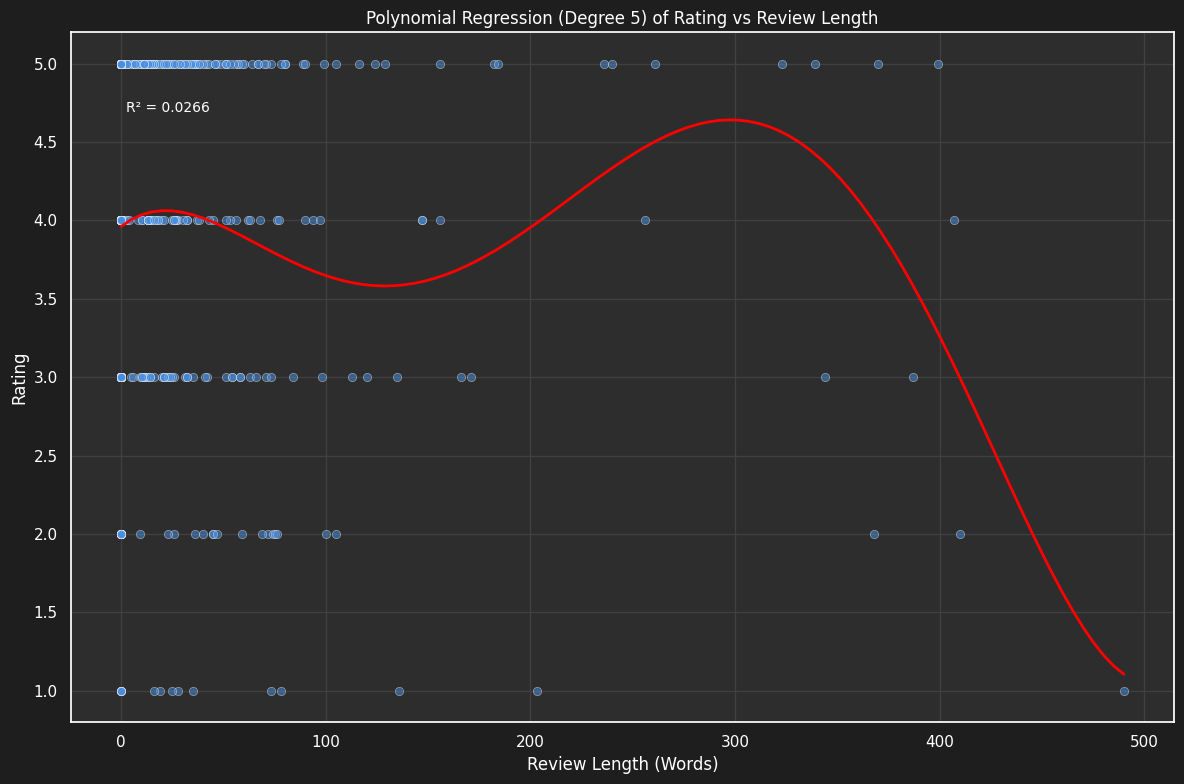

R-squared score: 0.0266
Number of reviews: 522
Average review length: 27.34 words
Median review length: 0.0 words
Maximum review length: 490 words
Median rating: 4.0
Unique ratings: 5


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def polynomial_regression(df, degree=5):
    """
    Perform polynomial regression on review length vs rating data.

    Args:
        df (pd.DataFrame): DataFrame containing 'my_review' and 'my_rating' columns.
        degree (int): Degree of the polynomial regression.

    Returns:
        float: R-squared score of the polynomial regression.
    """
    # Data preparation
    df["my_review"] = df["my_review"].fillna("").astype(str)
    X = df['my_review'].apply(lambda x: len(x.split())).values.reshape(-1, 1)
    y = df["my_rating"].astype(float).values

    # Create and fit the polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # Generate points for plotting the curve
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    # Calculate R-squared score
    r2 = r2_score(y, model.predict(X))

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=X.flatten(), y=y, alpha=0.5, color="#4a90e2")
    plt.plot(X_plot, y_plot, color='red', linewidth=2)

    plt.xlabel("Review Length (Words)")
    plt.ylabel("Rating")
    plt.title(f"Polynomial Regression (Degree {degree}) of Rating vs Review Length")
    plt.text(
        0.05, 0.9, f'R² = {r2:.4f}', transform=plt.gca().transAxes,
        fontsize=10, verticalalignment='top', color="white"
    )

    plt.tight_layout()
    plt.show()

    return r2

def analyze_review_data(df):
    """
    Perform additional analysis on the review data.

    Args:
        df (pd.DataFrame): DataFrame containing 'my_review' and 'my_rating' columns.
    """
    df["my_review"] = df["my_review"].fillna("").astype(str)
    review_lengths = df['my_review'].apply(lambda x: len(x.split()))

    print(f"Number of reviews: {len(df)}")
    print(f"Average review length: {review_lengths.mean():.2f} words")
    print(f"Median review length: {review_lengths.median()} words")
    print(f"Maximum review length: {review_lengths.max()} words")
    print(f"Median rating: {df['my_rating'].median()}")
    print(f"Unique ratings: {df['my_rating'].nunique()}")

# Polynomial Regression Analysis
r2 = polynomial_regression(review_length_vs_rating_df, degree=5)
print(f"R-squared score: {r2:.4f}")

# Additional Review Data Analysis
analyze_review_data(review_length_vs_rating_df)


After our initial linear regression analysis showed a very weak relationship between review length and rating, the polynomial model improved the R-squared value from 0.0065 to 0.0228, which, while still low, represents a fivefold increase in explanatory power. This improvement suggests there might be a slight non-linear relationship, but it remains weak overall. Oh well, worth a shot.

I think we can safely assume that review length doesn't correlate well with score.

# Predicted Read Time

We have a lot of information in the `to_read_bookshelf.pkl` file, but we haven't used it. Let's try and estimate - based on how long it took us to read the books we have read - how long it will take us to read the books we have yet to read.

Spoiler alert: it's not accurate, at least with my data. This is an exercise in using the tools we have learned so far, not in predicting how long it will take us to read a book.

## NN to predict read time

Regression would probably work fine, but let's try a different approach. Let's make use of another supervised learning algorithm: convolutional neural network. We'll use the `read_bookshelf.pkl` file to train the network on how long it took us to read a book, and then use the `to_read_bookshelf.pkl` file to predict how long it will take us to read the books we have yet to read.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


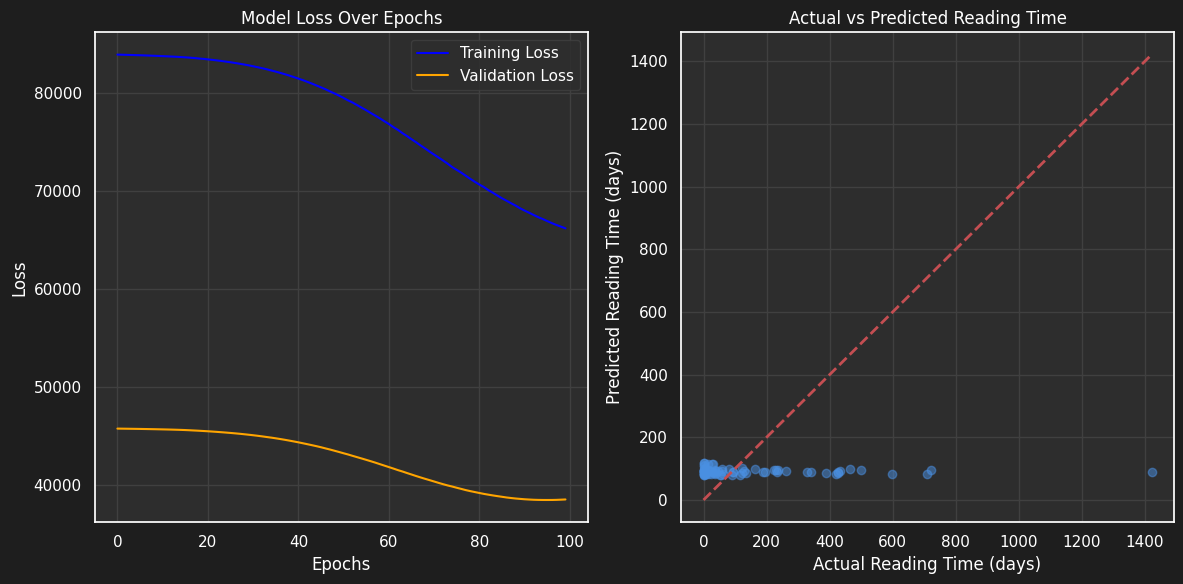

Number of books in dataset: 385
Average number of pages: 381.49
Average reading time: 133.24 days

Model Performance:
MSE: 54803.30
RMSE: 234.10
R²: -0.0533
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Predicted reading time for a 300-page book: 92.03 days


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

def preprocess_data(df, date_range):
    """
    Preprocess the book data for analysis.

    Args:
        df (pd.DataFrame): Raw book data.
        date_range (tuple): Start and end dates for filtering.

    Returns:
        pd.DataFrame: Preprocessed data with 'number_of_pages' and 'elapsed_days'.
    """
    df_copy = df.copy()
    df_copy['date_read'] = pd.to_datetime(df_copy['date_read'], errors='coerce')
    df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], errors='coerce')
    df_copy = df_copy.dropna(subset=['date_read', 'date_added', 'number_of_pages'])
    df_copy = df_copy[df_copy['date_added'].between(*date_range)]
    df_copy['elapsed_days'] = (df_copy['date_read'] - df_copy['date_added']).dt.days.clip(lower=0)
    return df_copy[['number_of_pages', 'elapsed_days']]


def build_model(input_shape):
    """
    Build a neural network model for predicting reading time.

    Args:
        input_shape (tuple): Shape of the input data.

    Returns:
        tf.keras.Model: Compiled neural network model.
    """
    model = Sequential([
        Input(shape=input_shape),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model


def plot_results(history, y_test, y_pred):
    """
    Plot the model's training history and predictions.

    Args:
        history (tf.keras.callbacks.History): Training history.
        y_test (np.array): Actual test values.
        y_pred (np.array): Predicted test values.
    """
    plt.figure(figsize=(12, 6))

    # Training history
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Actual vs Predicted
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.5, color='#4a90e2')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.title('Actual vs Predicted Reading Time')
    plt.xlabel('Actual Reading Time (days)')
    plt.ylabel('Predicted Reading Time (days)')

    plt.tight_layout()
    plt.show()

def analyze_reading_time(read_bookshelf, date_range):
    """
    Analyze reading time using neural networks.

    Args:
        read_bookshelf (pd.DataFrame): Raw book data.
        date_range (tuple): Start and end dates for filtering.
    """
    # Preprocess data
    data = preprocess_data(read_bookshelf, date_range)

    X = data['number_of_pages'].values.reshape(-1, 1)
    y = data['elapsed_days'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the model
    model = build_model((1,))
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test_scaled).flatten()

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot results
    plot_results(history, y_test, y_pred)

    # Print results
    print(f"Number of books in dataset: {len(data)}")
    print(f"Average number of pages: {data['number_of_pages'].mean():.2f}")
    print(f"Average reading time: {data['elapsed_days'].mean():.2f} days")
    print("\nModel Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {np.sqrt(mse):.2f}")
    print(f"R²: {r2:.4f}")

    example_pages = 300
    example_pages_scaled = scaler.transform([[example_pages]])
    predicted_days = model.predict(example_pages_scaled)[0][0]
    print(f"\nPredicted reading time for a {example_pages}-page book: {predicted_days:.2f} days")

# Define the date range for filtering
date_range = pd.to_datetime(['2020-01-01', '2024-12-31'])

# Run the analysis on the read_bookshelf DataFrame
analyze_reading_time(read_bookshelf, date_range)


A simple neural network model has revealed some interesting results. The negative R² value indicate that book length alone is insufficient to accurately predict reading time. This is further evidenced by the high RMSE, which is nearly twice the average reading time in our dataset.
The visualization of actual versus predicted reading times shows a weak correlation, with the model's predictions clustered in a narrower range than the actual reading times. This suggests that factors beyond book length significantly influence how long it takes to read a book (which is unsurprising, if a book is dull I'm more likely to put off finishing it, if it's a pageturner I might only take hours!).

Later, we will consider multiple factors and better methods than a simple NN to deal with this.


##Books Read Per Diem

Let's use plotly to mix things up a little.

In [22]:
import plotly.express as px
import pandas as pd

def visualize_books_by_weekday(read_bookshelf):
    """
    Create a sunburst chart visualization of books read by day of the week with dark mode.

    Data Science Components:
    - Data cleaning (handling missing values)
    - Data type conversion (ensuring date format)
    - Feature engineering (extracting day of week)
    - Data aggregation (counting books per weekday)
    - Data visualization (interactive sunburst chart with dark mode)
    - Error handling

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data
                                       with 'date_read' column

    Returns:
        plotly.graph_objs._figure.Figure: Plotly figure object
    """
    # Step 1: Data cleaning
    df = read_bookshelf.copy()
    if 'date_read' not in df.columns:
        print("Error: 'date_read' column is missing.")
        return None

    df.dropna(subset=['date_read'], inplace=True)

    # Step 2: Data type conversion
    try:
        df['date_read'] = pd.to_datetime(df['date_read'], errors='coerce')
        df.dropna(subset=['date_read'], inplace=True)
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return None

    # Step 3: Feature engineering
    df['weekday'] = df['date_read'].dt.day_name()

    # Step 4: Data aggregation
    weekday_count = df['weekday'].value_counts().to_dict()

    # Step 5: Data manipulation
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    sorted_weekday_count = {weekday: weekday_count.get(weekday, 0) for weekday in weekdays}

    df_plot = pd.DataFrame({'Day of Week': list(sorted_weekday_count.keys()),
                            'Number of Books': list(sorted_weekday_count.values())})

    # Step 6: Data visualization
    fig = px.sunburst(
        df_plot,
        path=['Day of Week'],
        values='Number of Books',
        title='Books Read by Day of Week'
    )

    # Customizing the visualization for dark mode
    fig.update_layout(
        showlegend=False,
        hoverlabel=dict(font=dict(size=12), align='left', bgcolor='black', font_color='white'),
        margin=dict(t=50, l=0, r=0, b=0),
        paper_bgcolor='black',  # Dark background
        plot_bgcolor='black',
        font=dict(color='white')  # White font for better contrast
    )

    fig.update_traces(
        hovertemplate='Day: %{label}<br>Books: %{value}',
        marker=dict(
            line=dict(width=2, color='white'),
            colorscale='blues'  # Adjust the color scheme for dark mode
        )
    )

    return fig

# Example Usage
fig = visualize_books_by_weekday(read_bookshelf)
if fig is not None:
    fig.show()
else:
    print("Unable to create visualization due to data format issues.")


Well, that is less interesting than expected.

# Word Frequency of Book Titles

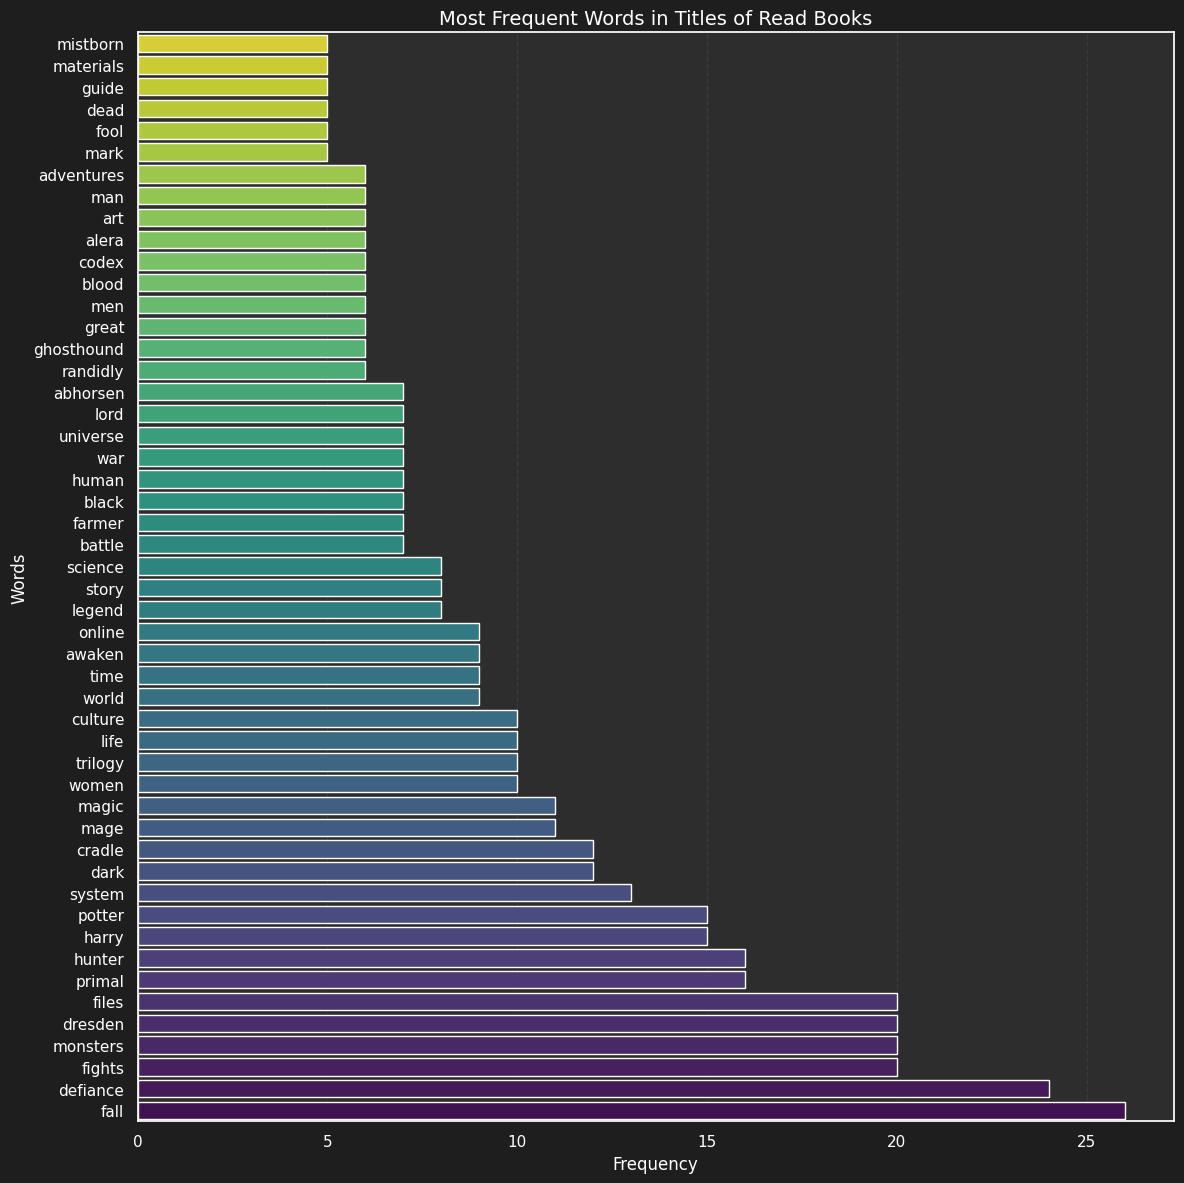

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

def analyze_title_word_frequency(read_bookshelf, top_n=50):
    """
    Analyze and visualize the frequency of words in book titles with dark mode.

    Data Science Components:
    - Natural Language Processing (NLP)
    - Text preprocessing (tokenization, stopword removal)
    - Frequency analysis
    - Data visualization

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book data with 'title' column
        top_n (int): Number of top frequent words to display

    Returns:
        matplotlib.figure.Figure: Figure object containing the word frequency plot
    """
    # Ensure NLTK data is downloaded
    nltk.download('stopwords', quiet=True)
    nltk.download("punkt", quiet=True)

    # Get all titles
    titles = " ".join(str(title) for title in read_bookshelf['title'].dropna())

    # Define and update stopwords
    stop_words = set(stopwords.words("english"))
    stop_words.update(['the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on',
                       'that', 'this', 'at', 'an', 'by', 'be', 'as', 'is', 'are'])

    # Text preprocessing
    # Lowercase, remove special characters and numbers etc
    filtered_titles = ''.join(e for e in titles.lower() if e.isalnum() or e.isspace())
    word_tokens = word_tokenize(filtered_titles)

    # Remove stopwords and numbers - gotta love list comprehensions
    word_tokens = [word for word in word_tokens if word not in stop_words and not word.isdigit()]

    # Frequency analysis
    word_counts = Counter(word_tokens)

    # Prepare data for visualization
    words, counts = zip(*word_counts.most_common(top_n))
    df_plot = pd.DataFrame({"Words": words, "Counts": counts})

    # Dark mode settings
    plt.style.use('dark_background')
    sns.set_theme(style="darkgrid")
    plt.rcParams.update({
        'font.size': 12,
        'axes.facecolor': '#2d2d2d',
        'figure.facecolor': '#1e1e1e',
        'grid.color': '#404040',
        'text.color': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white'
    })

    # Data visualization using Seaborn
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.barplot(data=df_plot, x="Counts", y="Words", ax=ax, palette="viridis", hue="Words", dodge=False, legend=False)

    # Configure plot elements
    ax.set_xlabel("Frequency", fontsize=12, color="white")
    ax.set_ylabel("Words", fontsize=12, color="white")
    ax.set_title("Most Frequent Words in Titles of Read Books", fontsize=14, color="white")

    # Add gridlines for better visualization
    ax.grid(axis='x', linestyle='--', alpha=0.7, color='#404040')

    # Invert y-axis to place the highest frequency word at the top
    ax.invert_yaxis()

    plt.tight_layout()
    return fig

fig = analyze_title_word_frequency(read_bookshelf)
plt.show()


## Now as a word cloud!

Less informative, but pretty.

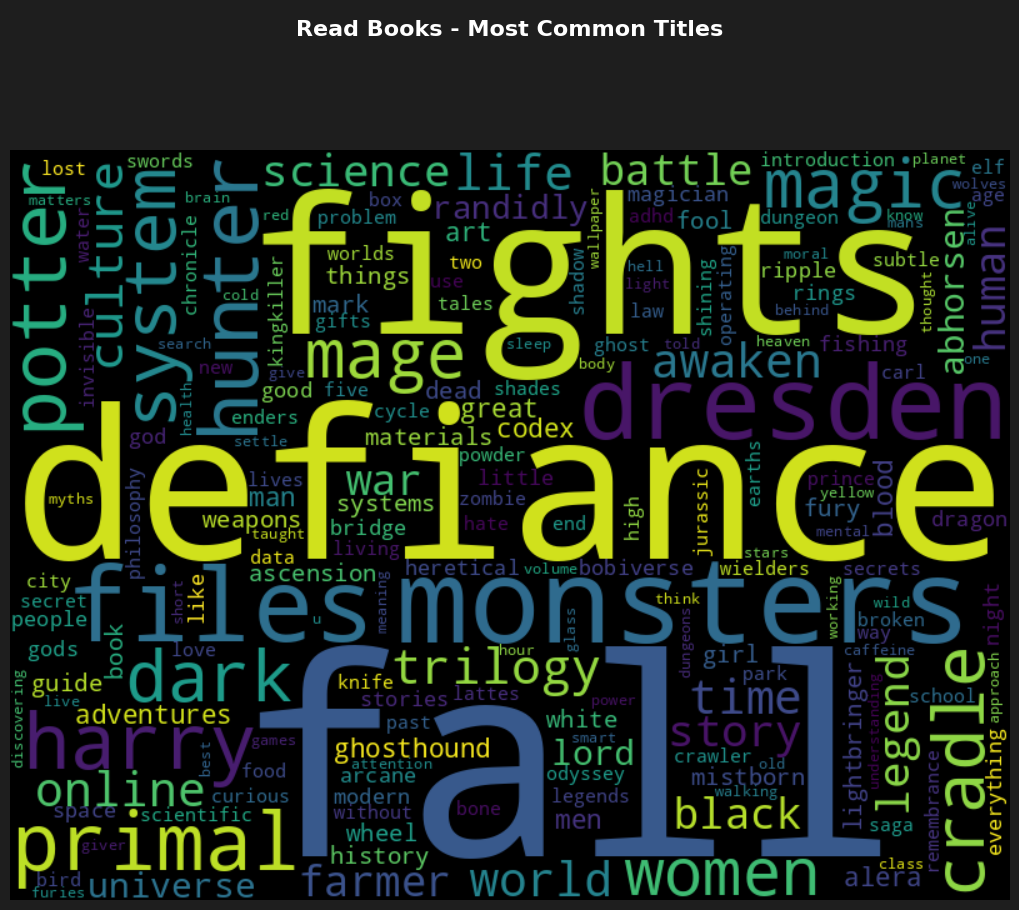

In [24]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.patches as patches
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def create_title_word_cloud(read_bookshelf):
    """
    Create a word cloud visualization of the most frequent words in book titles
    with a title

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book titles in the 'title' column.

    Returns:
        matplotlib.figure.Figure: Figure object displaying the word cloud with a minimal banner.
    """
    # Ensure NLTK data is downloaded
    nltk.download('stopwords', quiet=True)
    nltk.download("punkt", quiet=True)

    # Get all titles
    titles = " ".join(str(title) for title in read_bookshelf['title'].dropna())

    # Define and update stopwords
    stop_words = set(stopwords.words("english"))
    stop_words.update(['the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on',
                       'that', 'this', 'at', 'an', 'by', 'be', 'as', 'is', 'are'])

    # Text preprocessing
    # Lowercase, remove stopwords, special characters, and numbers
    filtered_titles = ''.join(e for e in titles.lower() if e.isalnum() or e.isspace())
    word_tokens = word_tokenize(filtered_titles)
    word_tokens = [word for word in word_tokens if word not in stop_words and not word.isdigit()]

    # Count the frequency of each word
    word_counts = Counter(word_tokens)

    # Create WordCloud object
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='black',  # Dark mode-friendly
        colormap='viridis',        # Colorblind-friendly colormap
        stopwords=stop_words,
        min_font_size=10
    ).generate_from_frequencies(word_counts)

    # Create the figure and layout
    fig = plt.figure(figsize=(10, 10))

    # Add the banner
    ax_banner = fig.add_axes([0, 0.95, 1, 0.04], facecolor='black')
    ax_banner.text(0.5, 0.5, "Read Books - Most Common Titles",
                   color='white', fontsize=16, fontweight='bold',
                   ha='center', va='center')
    ax_banner.set_xticks([])
    ax_banner.set_yticks([])
    ax_banner.axis("off")

    # Add the word cloud
    ax_cloud = fig.add_axes([0, 0, 1, 0.95])
    ax_cloud.imshow(wordcloud, interpolation='bilinear')
    ax_cloud.axis("off")

    return fig

# Generate and display the word cloud with a minimal banner
word_cloud_fig = create_title_word_cloud(read_bookshelf)
plt.show()


# Male vs Female Authors

This is making use of existing resources. I am not claiming anything regarding gender identities, this is a hand wave-y analysis of the data available.

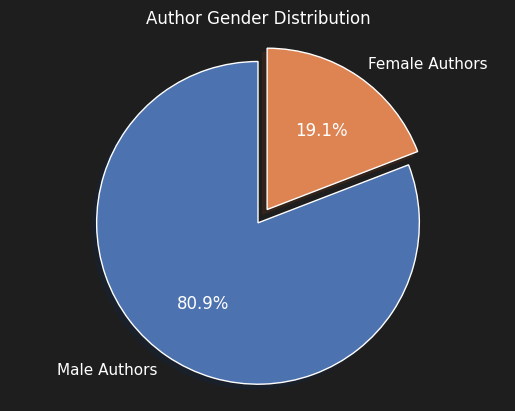

In [25]:
!pip install names_dataset
from names_dataset import NameDataset, NameWrapper

# Load the names database
nd = NameDataset()

def analyze_author_gender_distribution(read_bookshelf):
    """
    Analyze and visualize the gender distribution of book authors.

    This function performs the following tasks:
    1. Determines the gender of authors based on their first names
    2. Counts the number of male and female authors
    3. Creates a pie chart to visualize the gender distribution

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book data with 'author' column

    Returns:
    matplotlib.figure.Figure: Figure object containing the pie chart
    """


    # Create a new column "gender" in the dataframe
    read_bookshelf_gender = read_bookshelf.copy()
    read_bookshelf_gender['gender'] = read_bookshelf['author'].apply(
        lambda x: NameWrapper(nd.search(x.split()[0])).gender if x.split()[0].isalpha() else np.nan
    )

    # Count the number of male and female authors
    male_authors = read_bookshelf_gender[read_bookshelf_gender['gender'] == 'Male'].shape[0]
    female_authors = read_bookshelf_gender[read_bookshelf_gender['gender'] == 'Female'].shape[0]

    # Plot the pie chart of male and female authors
    labels = ['Male Authors', 'Female Authors']
    sizes = [male_authors, female_authors]
    explode = (0.1, 0)  # only "explode" the 1st slice

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90)

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Author Gender Distribution')

    return fig

gender_distribution_fig = analyze_author_gender_distribution(read_bookshelf)
gender_distribution_fig.show()

This is clearly influenced by my high number of fantasy and sci fi books, which are oversatured with male writers. Let's see if I've improved the diversity of authors I've read over time...

##Gender of authors by Recent Years

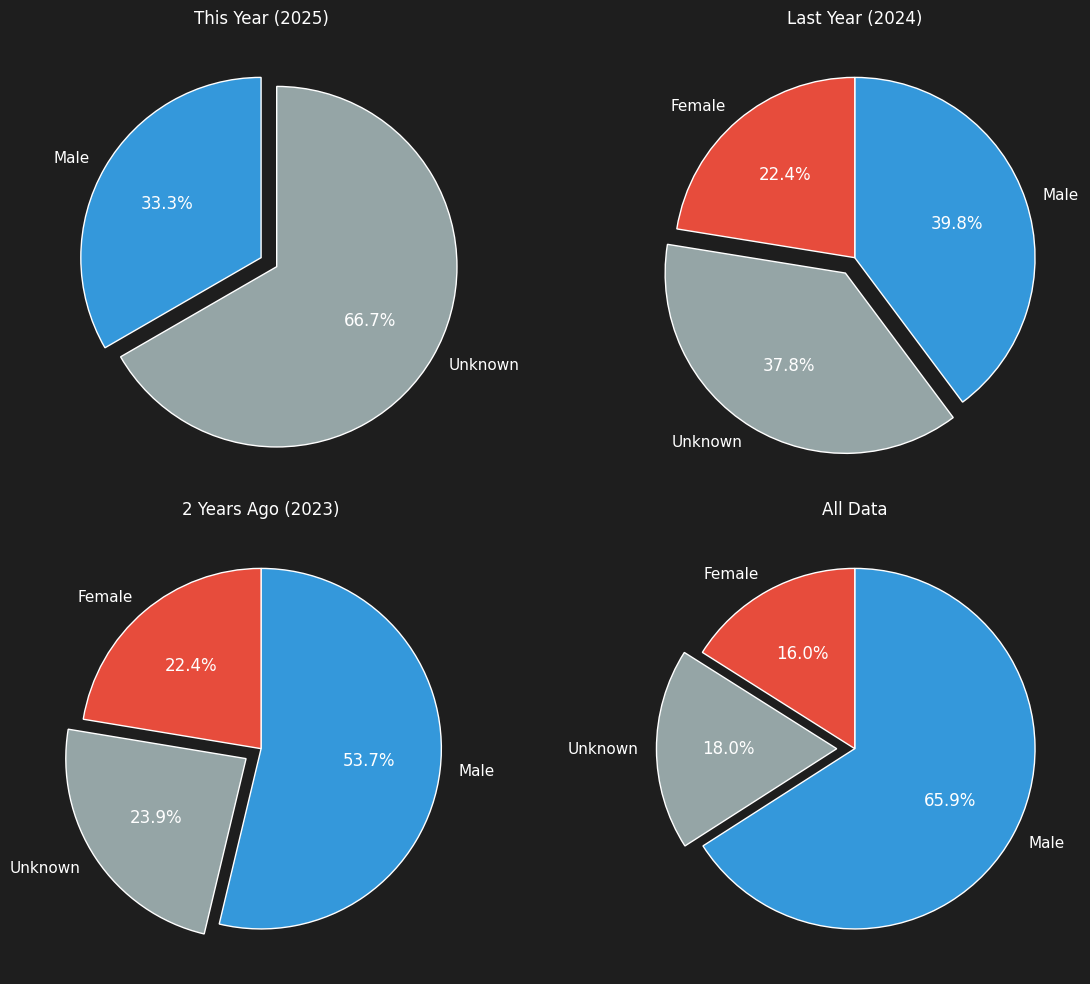

In [26]:
!pip install gender-guesser
from gender_guesser.detector import Detector

def analyze_author_gender_distribution_over_time(read_bookshelf):
    """
    Analyze and visualize the gender distribution of authors over time.

    Data Science Components:
    - Data cleaning (handling missing values)
    - Data type conversion (ensuring date format)
    - Feature engineering (extracting year, guessing gender)
    - Data aggregation (counting authors by gender and year)
    - Data visualization (pie charts)
    - Error handling

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data
                                       with 'date_read' and 'author' columns

    Returns:
        matplotlib.figure.Figure: Figure object containing the pie charts
    """
    # Copy the dataframe to modify it without affecting the original
    df = read_bookshelf.copy()

    # Data cleaning: Remove rows with missing 'date_read' or 'author' values
    df.dropna(subset=['date_read', 'author'], inplace=True)

    # Data type conversion: Ensure 'date_read' is in datetime format
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return None

    # Get the current year, last year and 2 years ago
    CURRENT_YEAR = pd.Timestamp('now').year
    LAST_YEAR = CURRENT_YEAR - 1
    TWO_YEARS_AGO = CURRENT_YEAR - 2

    # Split the data based on the date when books were read
    current_year_books = df[df['date_read'].dt.year == CURRENT_YEAR]
    last_year_books = df[df['date_read'].dt.year == LAST_YEAR]
    two_years_ago_books = df[df['date_read'].dt.year == TWO_YEARS_AGO]

    # Initialize gender detector
    detector = Detector()

    def get_gender(author):
        first_name = author.split(" ")[0]
        gender = detector.get_gender(first_name)
        if gender in ['male', 'mostly_male']:
            return 'Male'
        elif gender in ['female', 'mostly_female']:
            return 'Female'
        else:
            return 'Unknown'

    # Get the gender of authors for different time periods
    current_year_genders = current_year_books['author'].apply(get_gender)
    last_year_genders = last_year_books['author'].apply(get_gender)
    two_years_ago_genders = two_years_ago_books['author'].apply(get_gender)
    all_genders = df['author'].apply(get_gender)

    # Define a consistent color scheme
    color_scheme = {'Male': '#3498db', 'Female': '#e74c3c', 'Unknown': '#95a5a6'}

    def plot_pie_chart(data, title, ax):
        values = data.value_counts()
        labels = values.index
        colors = [color_scheme[gender] for gender in labels]
        explode = [0.1 if label == 'Unknown' else 0 for label in labels]
        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
               counterclock=False, explode=explode, colors=colors)
        ax.set_title(title)
        return ax

    # Create a subplot with 4 pie charts
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax[0,0] = plot_pie_chart(current_year_genders, f"This Year ({CURRENT_YEAR})", ax[0,0])
    ax[0,1] = plot_pie_chart(last_year_genders, f"Last Year ({LAST_YEAR})", ax[0,1])
    ax[1,0] = plot_pie_chart(two_years_ago_genders, f"2 Years Ago ({TWO_YEARS_AGO})", ax[1,0])
    ax[1,1] = plot_pie_chart(all_genders, "All Data", ax[1,1])

    plt.tight_layout()
    return fig

gender_distribution_fig = analyze_author_gender_distribution_over_time(read_bookshelf)
if gender_distribution_fig is not None:
    gender_distribution_fig.show()
else:
    print("Unable to create visualization due to data format issues.")

Great. It looks like, year on year, I'm reading more equitably.

# Books Over Time

## Average books read by month, year and day

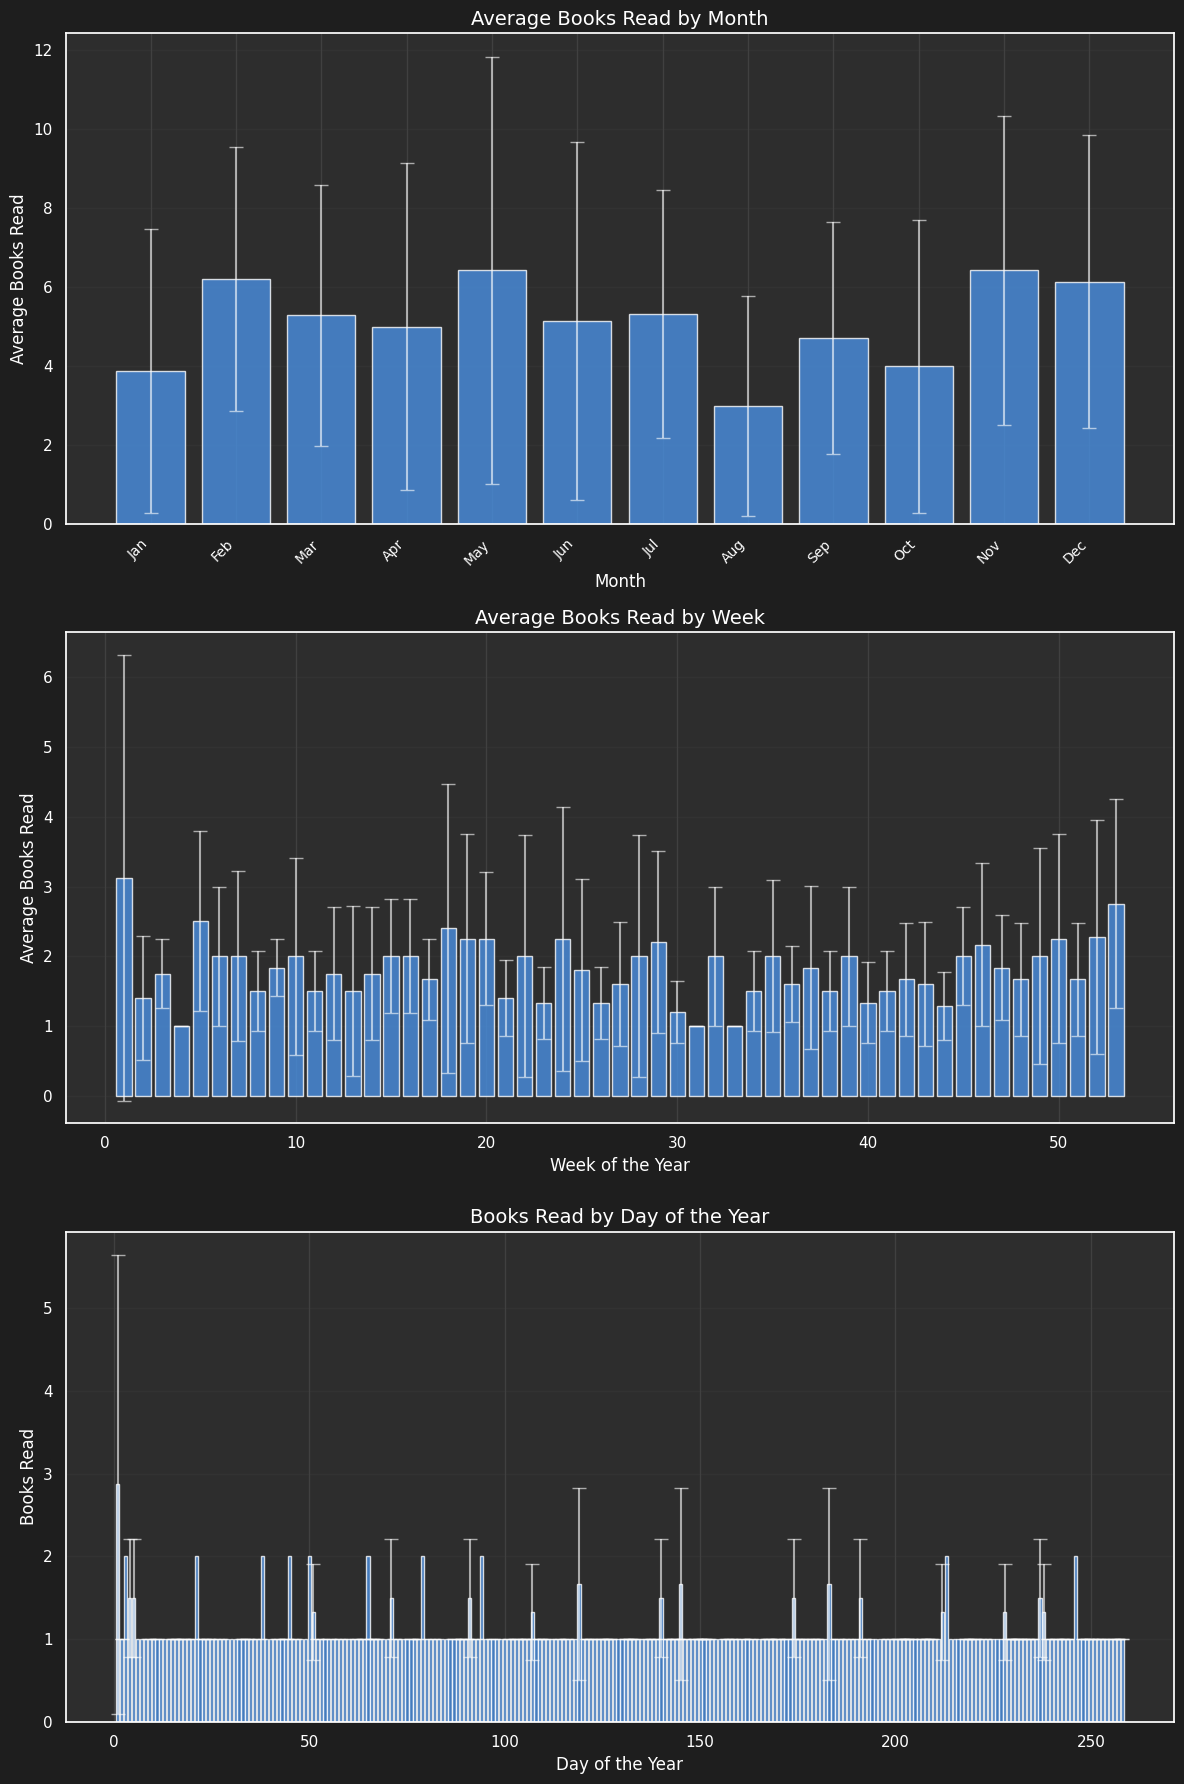

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_reading_patterns(read_bookshelf):
    """
    Analyze and visualize reading patterns over time.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data with a 'date_read' column.

    Returns:
        matplotlib.figure.Figure: Figure object containing the bar plots.
    """
    def prepare_data(df, groupby_cols):
        """
        Prepare grouped data for visualization.

        Args:
            df (pd.DataFrame): Input DataFrame.
            groupby_cols (list): Columns to group by.

        Returns:
            tuple: Mean and standard deviation of the grouped data.
        """
        grouped = df.groupby(groupby_cols).size().reset_index(name='count')
        mean = grouped.groupby(groupby_cols[0])['count'].mean()
        std = grouped.groupby(groupby_cols[0])['count'].std()
        return mean, std

    def plot_bar_with_error(ax, x, y, yerr, title, xlabel, ylabel, xticks=None, xticklabels=None):
        """
        Plot a bar chart with error bars.

        Args:
            ax (matplotlib.axes.Axes): Matplotlib Axes object.
            x (np.ndarray): X-axis values.
            y (np.ndarray): Y-axis values.
            yerr (np.ndarray): Error values for the Y-axis.
            title (str): Title of the plot.
            xlabel (str): Label for the X-axis.
            ylabel (str): Label for the Y-axis.
            xticks (np.ndarray, optional): Positions of the ticks on the X-axis.
            xticklabels (list, optional): Labels for the ticks on the X-axis.
        """
        bars = ax.bar(x, y, alpha=0.8, color='#4a90e2')
        ax.errorbar(x=x, y=y, yerr=yerr, fmt='none', color='white', capsize=5, alpha=0.6)
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.grid(axis='y', alpha=0.3)
        if xticks is not None and xticklabels is not None:
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticklabels, rotation=45, ha='right', fontsize=10)
        return bars

    # Data preprocessing
    df = read_bookshelf.copy()
    df.dropna(subset=['date_read'], inplace=True)

    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return None

    # Feature engineering
    df['year'] = df['date_read'].dt.year
    df['month'] = df['date_read'].dt.month
    df['week_number'] = df['date_read'].dt.isocalendar().week
    df['day_of_year'] = df['date_read'].dt.dayofyear

    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))

    # Monthly plot
    mean_month, std_month = prepare_data(df, ['month', 'year'])
    x_month = np.arange(1, 13)
    plot_bar_with_error(axes[0], x_month, mean_month, std_month,
                        'Average Books Read by Month', 'Month', 'Average Books Read',
                        x_month, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Weekly plot
    mean_week, std_week = prepare_data(df, ['week_number', 'year'])
    x_week = np.arange(1, len(mean_week) + 1)
    plot_bar_with_error(axes[1], x_week, mean_week, std_week,
                        'Average Books Read by Week', 'Week of the Year', 'Average Books Read')

    # Daily plot
    mean_day, std_day = prepare_data(df, ['day_of_year', 'year'])
    x_day = np.arange(1, len(mean_day) + 1)
    plot_bar_with_error(axes[2], x_day, mean_day, std_day,
                        'Books Read by Day of the Year', 'Day of the Year', 'Books Read')

    # Adjust layout
    plt.tight_layout()
    return fig

# Generate and display the plots
reading_patterns_fig = analyze_reading_patterns(read_bookshelf)
if reading_patterns_fig:
    plt.show()


Huge amount of variability. The last plot is unnecessary, as it seems between 0-1 each day is the norm, with outliers on day 1 being my estimate reading years of older books.

# Heat maps of Book Ratings over Time

Let's just do 2019 onwards.

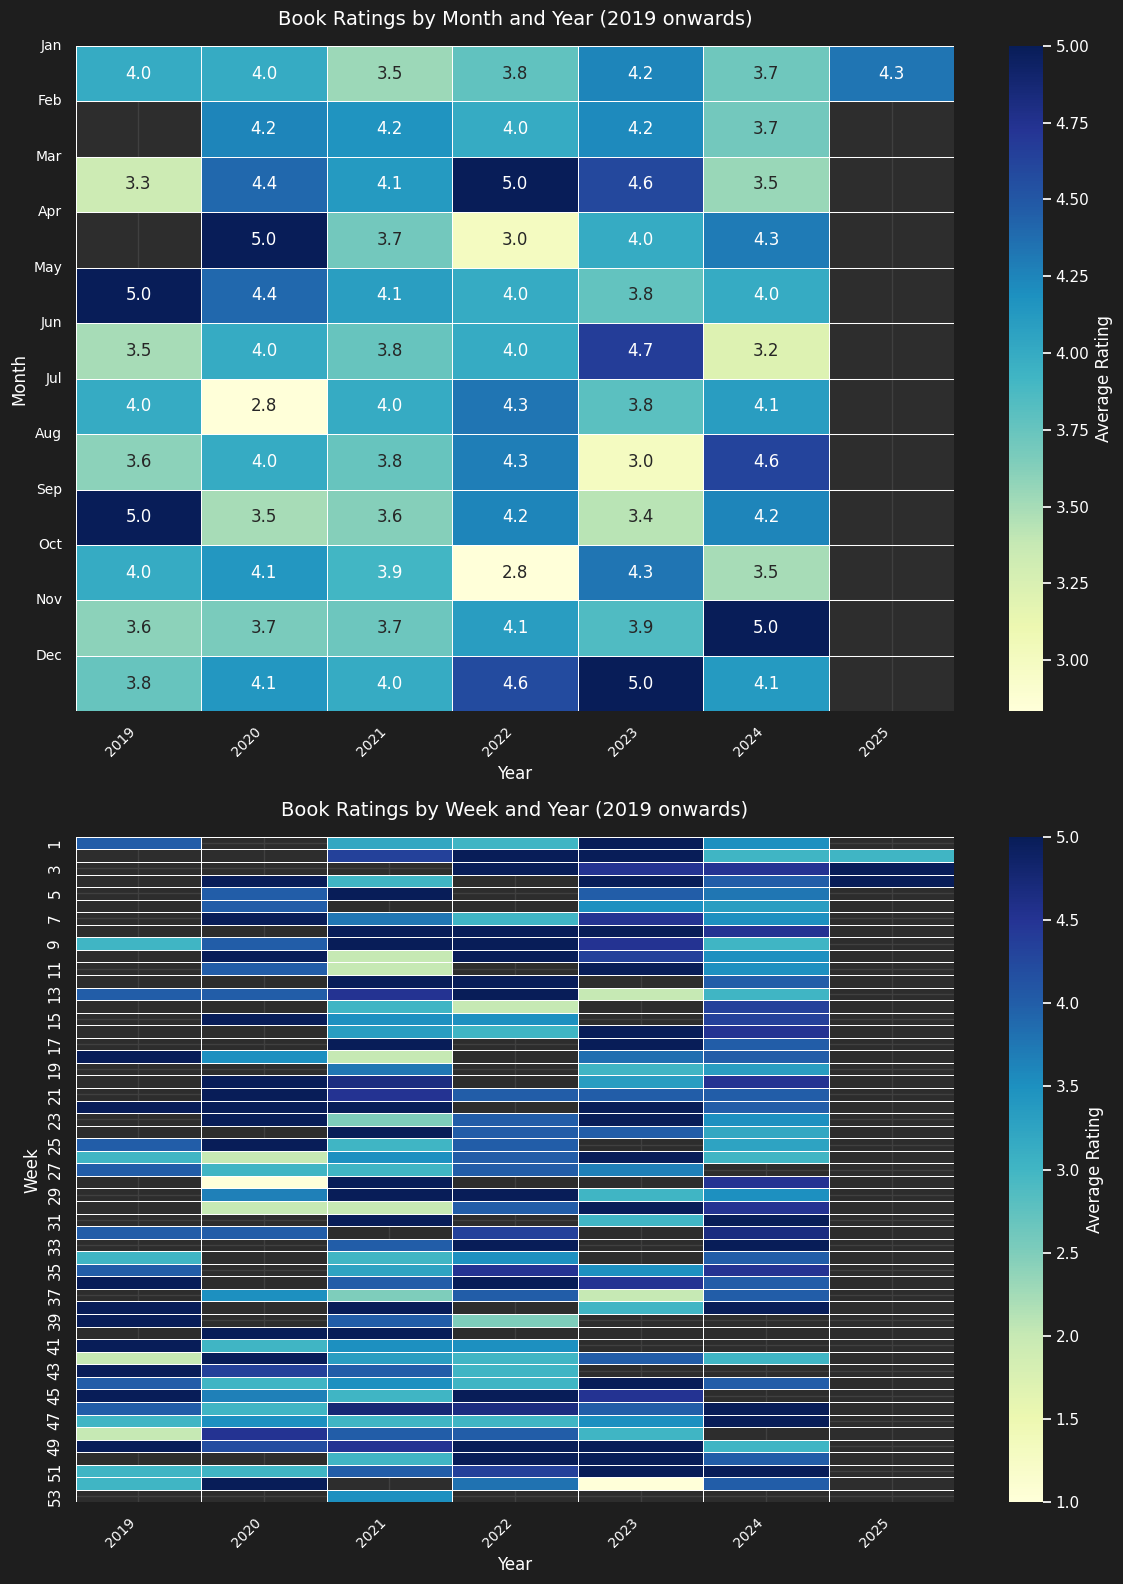

Total books read from 2019 onwards: 428
Average rating from 2019 onwards: 3.94
Years covered: 2019, 2020, 2021, 2022, 2023, 2024, 2025


In [28]:
def analyze_book_ratings_heatmap(read_bookshelf):
    """
    Analyze and visualize book ratings over time using heatmaps, filtered from 2019 onwards.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reading data with 'date_read' and 'my_rating' columns.

    Returns:
        tuple: (matplotlib.figure.Figure, int, float, str)
               Figure object containing the heatmaps,
               Total number of books read,
               Average rating,
               Years covered (as a string).
    """
    def prepare_heatmap_data(df, index_col, columns_col, values_col):
        """
        Prepare pivot table data for the heatmap.

        Args:
            df (pd.DataFrame): DataFrame to process.
            index_col (str): Column to use as index.
            columns_col (str): Column to use as columns.
            values_col (str): Column to aggregate.

        Returns:
            pd.DataFrame: Pivot table for heatmap visualization.
        """
        return df.pivot_table(index=index_col, columns=columns_col, values=values_col, aggfunc='mean')

    def plot_heatmap(ax, data, title, xlabel, ylabel, cmap='YlGnBu', yticklabels=None, yticks=None, show_annotations=True):
        """
        Plot a heatmap.

        Args:
            ax (matplotlib.axes.Axes): Matplotlib Axes object.
            data (pd.DataFrame): Data for the heatmap.
            title (str): Title of the heatmap.
            xlabel (str): Label for the X-axis.
            ylabel (str): Label for the Y-axis.
            cmap (str): Color map for the heatmap.
            yticklabels (list, optional): Custom labels for Y-axis ticks.
            yticks (list, optional): Positions for Y-axis ticks.
            show_annotations (bool): Whether to show the rating annotations in each cell.
        """
        sns.heatmap(data, ax=ax, cmap=cmap, annot=show_annotations, fmt=".1f" if show_annotations else "",
                    cbar_kws={'label': 'Average Rating'}, linewidths=0.5)
        ax.set_title(title, fontsize=14, pad=15)
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        if yticklabels:
            ax.set_yticks(yticks if yticks is not None else range(len(yticklabels)))
            ax.set_yticklabels(yticklabels, fontsize=10, rotation=0)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    # Copy and clean the dataframe
    df = read_bookshelf.copy()
    df.dropna(subset=['date_read', 'my_rating'], inplace=True)

    # Convert 'date_read' to datetime
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        return None, 0, 0.0, ""

    # Extract time-based features
    df['year'] = df['date_read'].dt.year
    df['month'] = df['date_read'].dt.month
    df['week'] = df['date_read'].dt.isocalendar().week

    # Filter data from 2019 onwards
    df = df[df['year'] >= 2019]

    # Prepare data for heatmaps
    monthly_pivot = prepare_heatmap_data(df, 'month', 'year', 'my_rating')
    weekly_pivot = prepare_heatmap_data(df, 'week', 'year', 'my_rating')

    # Plot the heatmaps
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

    # Monthly heatmap with annotations
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plot_heatmap(ax1, monthly_pivot, 'Book Ratings by Month and Year (2019 onwards)', 'Year', 'Month',
                 yticklabels=month_names, show_annotations=True)

    # Weekly heatmap without annotations
    plot_heatmap(ax2, weekly_pivot, 'Book Ratings by Week and Year (2019 onwards)', 'Year', 'Week', show_annotations=False)

    plt.tight_layout()

    # Calculate statistics
    total_books = len(df)
    average_rating = df['my_rating'].mean()
    years_covered = ', '.join(map(str, sorted(df['year'].unique())))

    return fig, total_books, average_rating, years_covered

# Generate and display the heatmaps
ratings_heatmap_fig, total_books, average_rating, years_covered = analyze_book_ratings_heatmap(read_bookshelf)

if ratings_heatmap_fig is not None:
    plt.show()
    print(f"Total books read from 2019 onwards: {total_books}")
    print(f"Average rating from 2019 onwards: {average_rating:.2f}")
    print(f"Years covered: {years_covered}")
else:
    print("Unable to create visualization due to data format issues.")


# Number of books read by author

Total number of unique authors: 299
Number of books by top author (Jim  Butcher): 26
Number of books by 50th top author (Alan Alda): 2


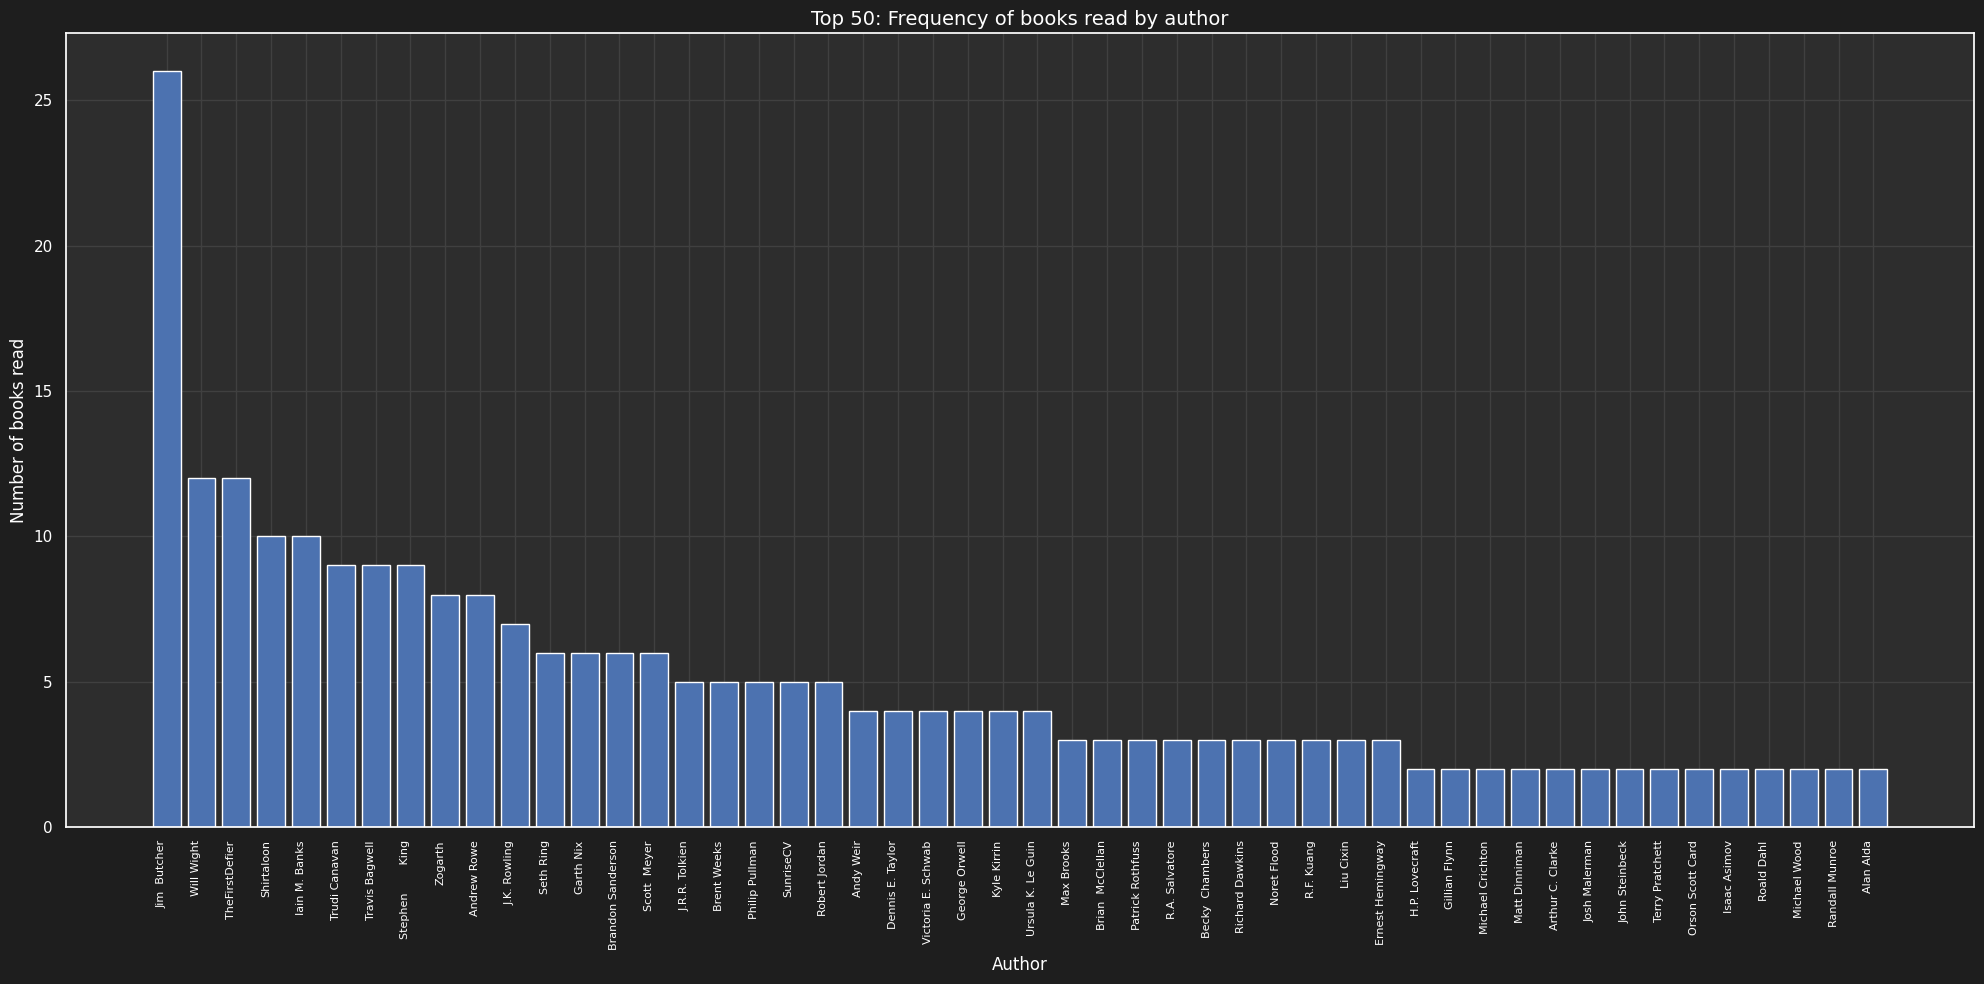

In [29]:
def analyze_top_authors(read_bookshelf, top_n=50):
    # Calculate author counts
    author_counts = read_bookshelf['author'].value_counts()
    top_authors = author_counts[:top_n]

    # Create the plot
    fig, ax = plt.subplots(figsize=(20, 10))
    bars = ax.bar(range(len(top_authors)), top_authors.values, align='center')

    # Customize the plot
    ax.set_xlabel('Author', fontsize=12)
    ax.set_ylabel('Number of books read', fontsize=12)
    ax.set_title(f'Top {top_n}: Frequency of books read by author', fontsize=14)

    # Set x-axis ticks
    ax.set_xticks(range(len(top_authors)))
    ax.set_xticklabels(top_authors.index, rotation=90, ha='right', fontsize=8)

    # Adjust layout
    plt.tight_layout()

    # Calculate statistics
    total_unique_authors = len(author_counts)
    top_author_books = top_authors.values[0]
    top_author_name = top_authors.index[0]
    last_top_author_books = top_authors.values[-1]
    last_top_author_name = top_authors.index[-1]

    return fig, total_unique_authors, top_author_name, top_author_books, last_top_author_name, last_top_author_books

# Analyze top authors
fig, total_authors, top_author, top_books, last_author, last_books = analyze_top_authors(read_bookshelf)

# Display the plot
fig.show()

# Print statistics
print(f"Total number of unique authors: {total_authors}")
print(f"Number of books by top author ({top_author}): {top_books}")
print(f"Number of books by 50th top author ({last_author}): {last_books}")

# Genres

From now on, I'm going to be making use of the genres and read dates from the enhanced CSV as described in the beginning.

First, we'll need to do some cleaning. I'm going to save the top 3 genres only, I think more than that is likely bloat.

In [30]:
def preprocess_book_genres(bookshelf):
    """
    Preprocess the genres column in the bookshelf dataframe.

    Tasks:
    1. Removes books with NaN genres.
    2. Splits the genres into up to 3 separate columns.
    3. Cleans and standardizes genre names.
    4. Drops empty genre rows and renames genre columns.
    5. Drops the original 'genres' column and any excess genre columns.

    Args:
        bookshelf (pd.DataFrame): DataFrame containing book information including a 'genres' column.

    Returns:
        pd.DataFrame: Processed DataFrame with cleaned and separated genre columns.
    """
    # Remove books with NaN genres
    bookshelf = bookshelf.dropna(subset=['genres']).reset_index(drop=True)

    # Split genres into separate columns
    genre_df = bookshelf['genres'].str.split(";", expand=True).iloc[:, :3]

    # Clean and standardize genre names
    def clean_genre(g):
        if pd.notnull(g):
            g = g.lower().split("|")[0]
            g = g.replace("lit rpg", "litrpg")
            g = g.replace("sci fi", "science fiction")
            g = g.replace("scifi", "science fiction")
            g = g.replace("ya", "young adult")
            return g
        return None

    # Apply the cleaning function to each genre column
    for col in genre_df.columns:
        genre_df[col] = genre_df[col].map(clean_genre)

    # Add cleaned genres back to the main dataframe
    bookshelf = pd.concat([bookshelf, genre_df], axis=1)

    # Rename genre columns
    bookshelf.rename(columns={0: 'genre_1', 1: 'genre_2', 2: 'genre_3'}, inplace=True)

    # Remove rows where all genre columns are empty
    bookshelf.dropna(subset=['genre_1', 'genre_2', 'genre_3'], how='all', inplace=True)

    # Drop the original 'genres' column
    bookshelf.drop(columns=['genres'], inplace=True)

    return bookshelf

# Process both read and to-read bookshelves
read_bookshelf = preprocess_book_genres(read_bookshelf)
to_read_bookshelf = preprocess_book_genres(to_read_bookshelf)

# Print some statistics about the processed data
print("Read Bookshelf:")
print(f"Number of books after preprocessing: {len(read_bookshelf)}")
print(f"Number of unique primary genres: {read_bookshelf['genre_1'].nunique()}")
print("\nTo-Read Bookshelf:")
print(f"Number of books after preprocessing: {len(to_read_bookshelf)}")
print(f"Number of unique primary genres: {to_read_bookshelf['genre_1'].nunique()}")


Read Bookshelf:
Number of books after preprocessing: 502
Number of unique primary genres: 31

To-Read Bookshelf:
Number of books after preprocessing: 668
Number of unique primary genres: 61


# Dates

The dates are a bit of a mess. Let's clean them up.

In [31]:
def split_dates(df):
    """
    Process the 'read_dates' column in the bookshelf dataframe.

    This function performs the following tasks:
    1. Splits the 'read_dates' column into a list of dates
    2. Creates new columns for start and end dates for each read
    3. Converts the dates to datetime format

    Args:
    df (pd.DataFrame): DataFrame containing book information including a 'read_dates' column

    Returns:
    pd.DataFrame: Processed DataFrame with split start and end dates for each read
    """
    # Split into a list of dates
    df['read_dates'] = df['read_dates'].str.split(';')

    # Max read count is equal to max number of books read * 2
    max_read_count = df['read_count'].max() * 2

    # Reset the index
    df = df.reset_index(drop=True)

    # For each potential book read
    for i in range(max_read_count):
        df[f'start_{i}'] = pd.NaT
        df[f'end_{i}'] = pd.NaT
        for j in range(len(df)):
            read_dates = df.at[j, 'read_dates']
            if isinstance(read_dates, float):
                continue
            if len(read_dates) <= i:
                continue
            start_date, end_date = read_dates[i].split(',')
            df.at[j, f'start_{i}'] = pd.to_datetime(start_date.strip())
            df.at[j, f'end_{i}'] = pd.to_datetime(end_date.strip())

    return df

# Process the read bookshelf
read_bookshelf = split_dates(read_bookshelf)

# Print some statistics about the processed data
print("Read Bookshelf after date processing:")
print(f"Number of books: {len(read_bookshelf)}")
print(f"Number of date columns: {sum('start' in col for col in read_bookshelf.columns)}")
print(f"Date range of first read: {read_bookshelf['start_0'].min()} to {read_bookshelf['end_0'].max()}")

Read Bookshelf after date processing:
Number of books: 502
Number of date columns: 4
Date range of first read: 2004-01-01 00:00:00 to 2025-01-22 00:00:00


# Distribution of ratings for each genre

##Distribution of ratings for each genre - Genre 1 only

Genre Statistics:
                 count      mean       std
genre_1                                   
fantasy            158  4.208861  0.924223
non fiction         72  4.055556  1.136945
litrpg              60  3.966667  0.843051
fiction             51  3.921569  1.074116
science fiction     44  3.818182  1.084194

Total number of primary genres: 31
Genre with highest average rating: machine learning (5.00)
Genre with lowest average rating: religion (1.00)


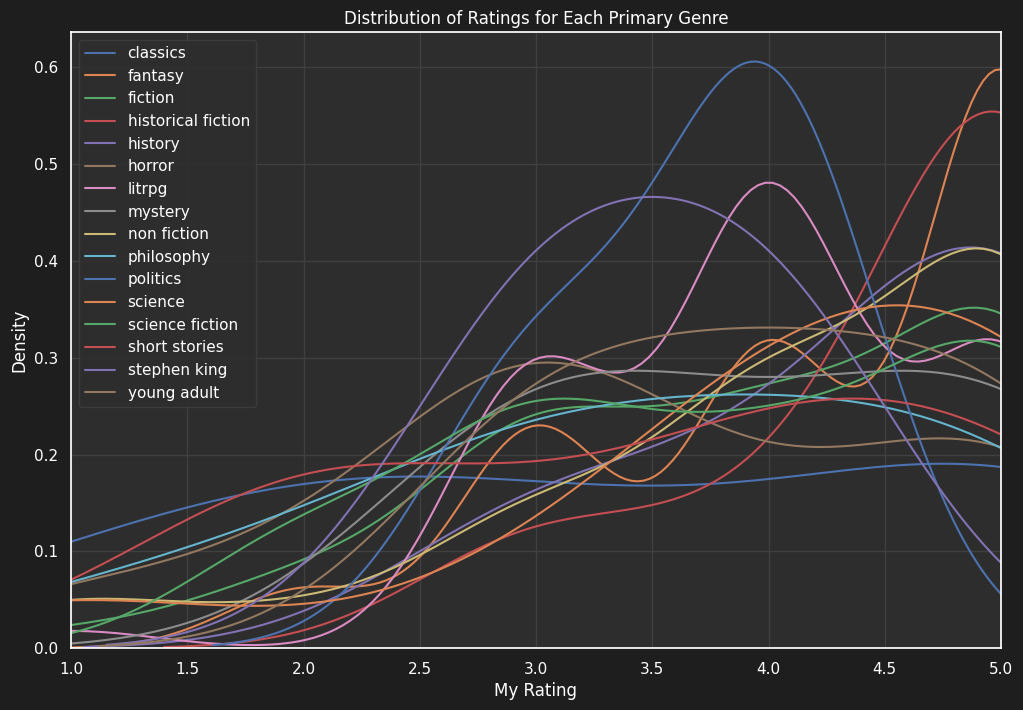

In [32]:
def plot_rating_distribution_by_genre(read_bookshelf):
    """
    Create a kernel density estimate plot of rating distributions for each primary genre.

    This function performs the following tasks:
    1. Creates a copy of the input dataframe
    2. Replaces the 'genre' column with 'genre_1' (primary genre)
    3. Groups the data by genre
    4. Plots a kernel density estimate for each genre with more than 0 variance in ratings

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book information including 'genre_1' and 'my_rating' columns

    Returns:
    matplotlib.figure.Figure: Figure object containing the plot
    """
    # Create a copy of the original dataframe to avoid modifying it
    bookshelf_genre_1 = read_bookshelf.copy()

    # Replace the genre column with the genre_1 column
    bookshelf_genre_1['genre'] = bookshelf_genre_1['genre_1']

    # Group the dataframe by the genre column
    grouped = bookshelf_genre_1.groupby(by='genre')['my_rating']

    # Set the figure size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the kernel density estimate for each genre that has more than 0 variance
    for name, group in grouped:
        if group.var() > 0:
            sns.kdeplot(group, label=name, ax=ax)

    # Add x and y labels, title and legend
    ax.set_xlabel('My Rating')
    ax.set_ylabel('Density')
    ax.set_title('Distribution of Ratings for Each Primary Genre')
    ax.legend()
    ax.set_xlim(1, 5)

    return fig

# Create the plot
rating_distribution_fig = plot_rating_distribution_by_genre(read_bookshelf)

# Display the plot
rating_distribution_fig.show()

# Print some statistics about the genres and ratings
genre_stats = read_bookshelf.groupby('genre_1')['my_rating'].agg(['count', 'mean', 'std']).sort_values('count', ascending=False)
print("Genre Statistics:")
print(genre_stats.head())
print(f"\nTotal number of primary genres: {len(genre_stats)}")
print(f"Genre with highest average rating: {genre_stats['mean'].idxmax()} ({genre_stats['mean'].max():.2f})")
print(f"Genre with lowest average rating: {genre_stats['mean'].idxmin()} ({genre_stats['mean'].min():.2f})")

## Distribution of ratings for each genre - all genres

Top 10 most common genres across all genre fields:
genre
fiction            257
fantasy            232
science fiction    121
non fiction        108
litrpg              86
young adult         58
audible             57
nonfiction          54
horror              36
classics            33
Name: count, dtype: int64

Total number of unique genres: 119
Number of books with multiple genres: 498


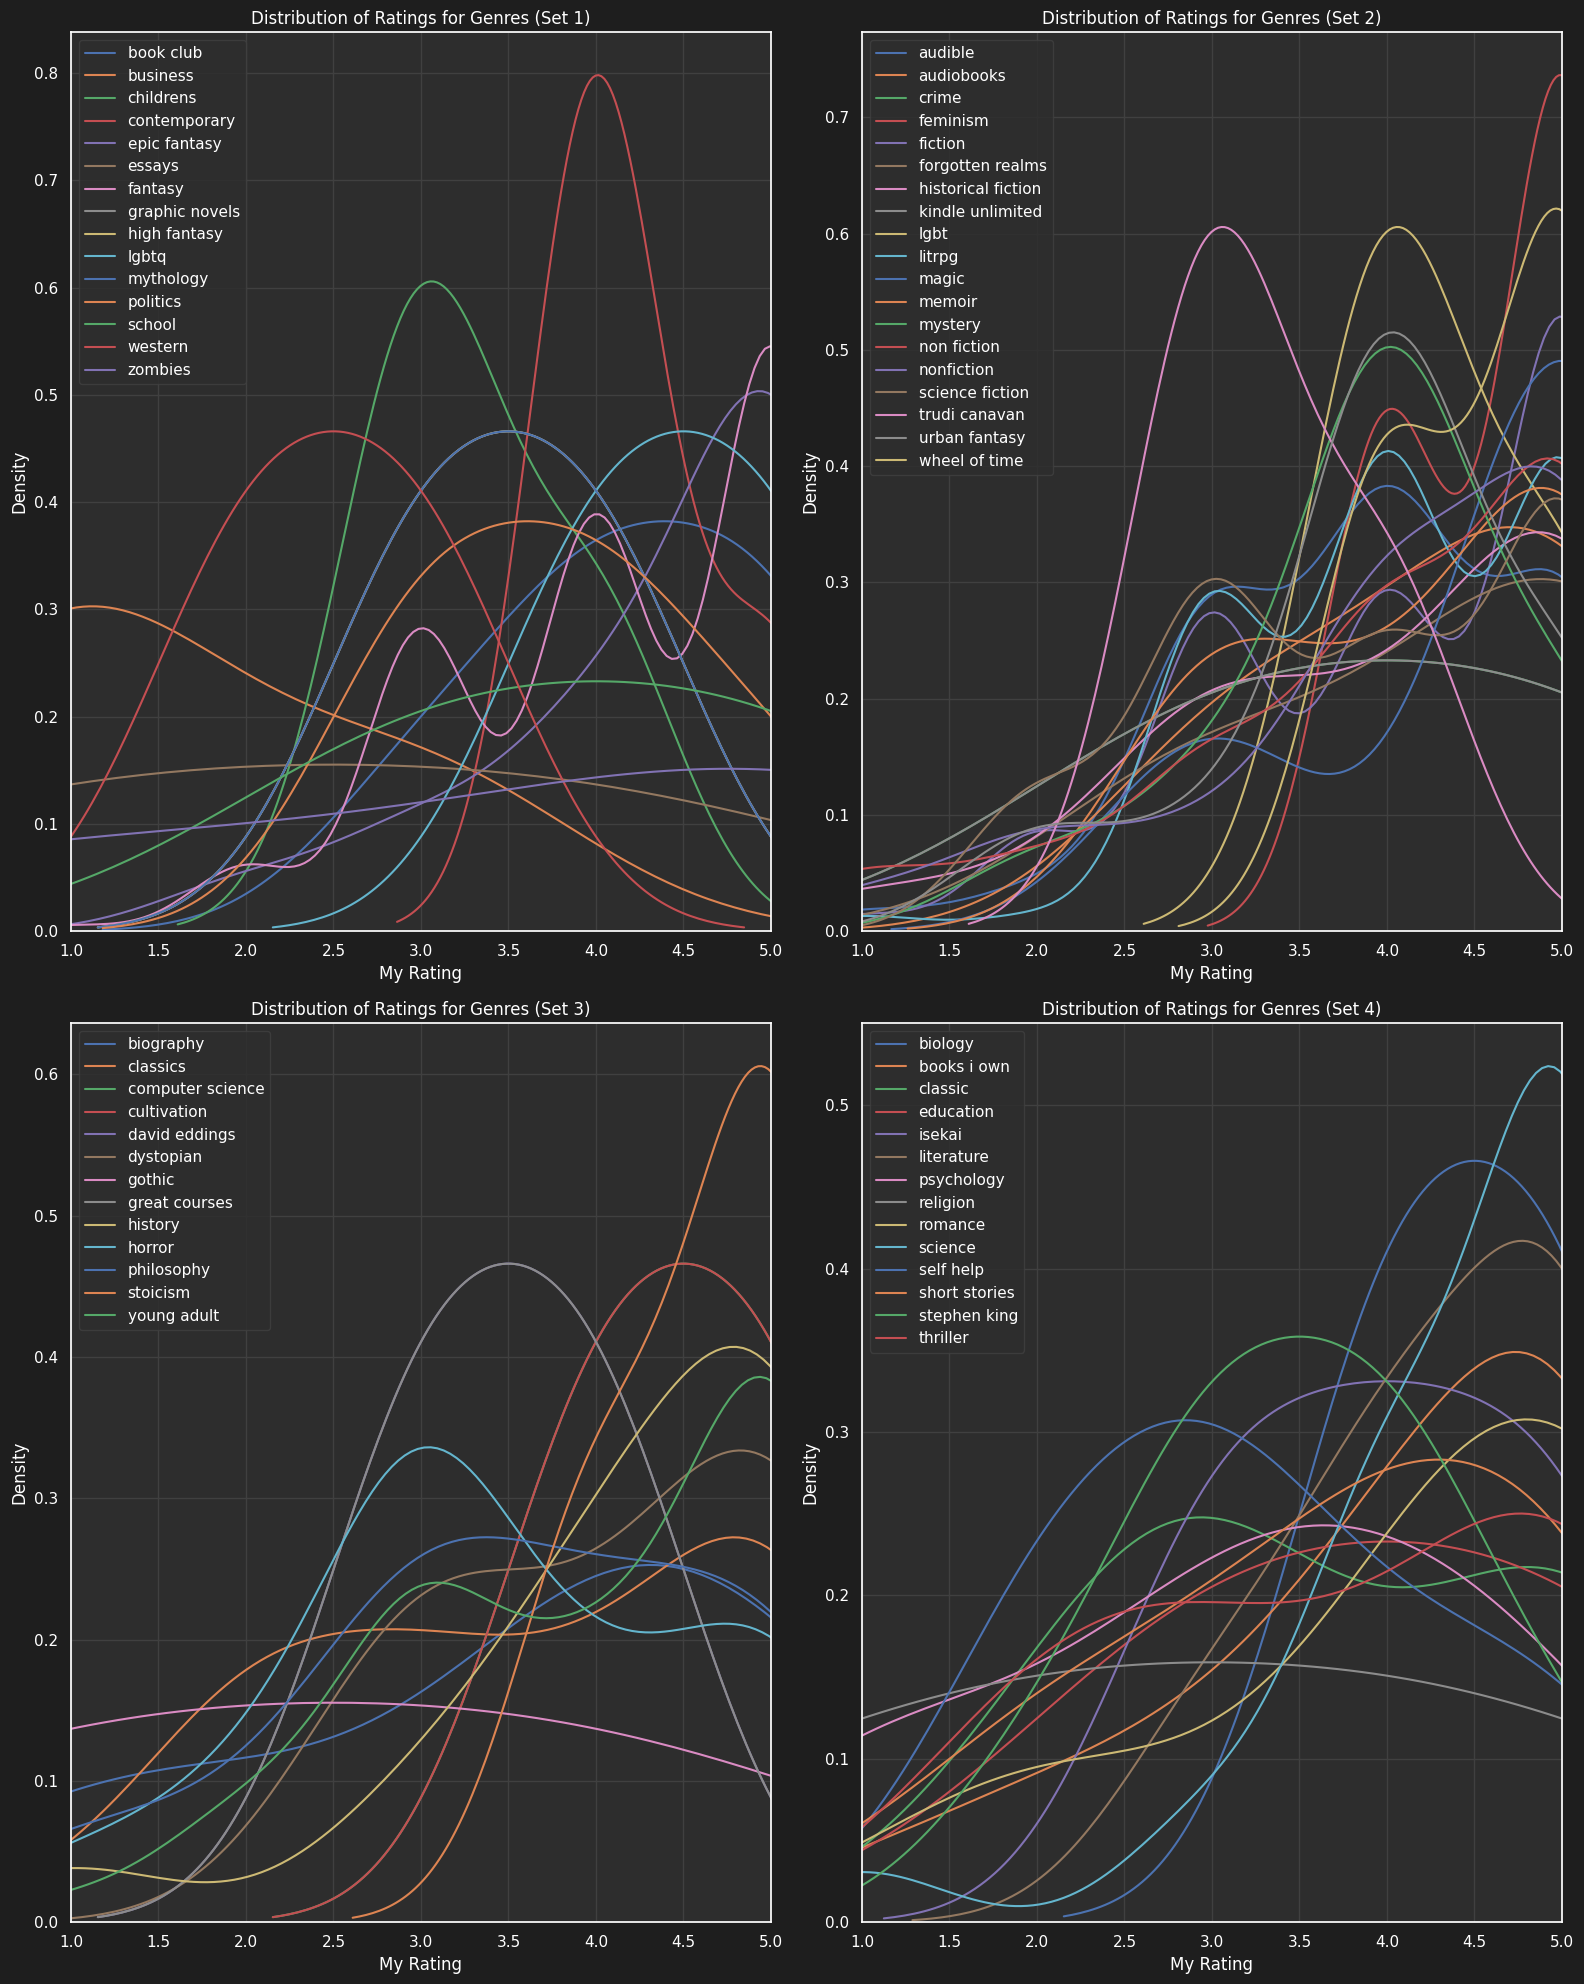

In [33]:
def plot_rating_distribution_all_genres(read_bookshelf):
    """
    Create kernel density estimate plots of rating distributions for all genres, divided into four subplots.

    This function performs the following tasks:
    1. Melts the dataframe to convert genre columns into rows
    2. Drops rows with missing genre values
    3. Divides all genres into four subsets
    4. Creates four subplots, each showing the rating distribution for a subset of genres

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book information including 'genre_1', 'genre_2', 'genre_3', and 'my_rating' columns

    Returns:
    matplotlib.figure.Figure: Figure object containing the plots
    """
    # Create a copy of the original dataframe to avoid modifying it
    bookshelf_all_genres = read_bookshelf.copy()

    # Melt the dataframe to convert the genre_1, genre_2, and genre_3 columns into rows
    bookshelf_all_genres = bookshelf_all_genres.melt(id_vars=['my_rating'], value_vars=['genre_1', 'genre_2', 'genre_3'], var_name='genre_column', value_name='genre')

    # Drop any rows with missing genre values
    bookshelf_all_genres = bookshelf_all_genres.dropna(subset=['genre'])

    # Get the set of all genres
    all_genres = set(bookshelf_all_genres['genre'])

    # Divide the set of genres into four subsets of approximately equal size
    num_genres = len(all_genres)
    subset_size = num_genres // 4
    genre_subsets = [list(all_genres)[i:i+subset_size] for i in range(0, num_genres, subset_size)]

    # Handle the case where the number of genres is not divisible by 4
    if num_genres % 4 != 0:
        last_subset = genre_subsets.pop()  # Remove the incomplete subset
        genre_subsets[-1].extend(last_subset)  # Add the remaining genres to the last subset

    # Set the figure size
    fig, axs = plt.subplots(2, 2, figsize=(16, 20))
    axs = axs.ravel()  # Flatten the 2x2 array to make it easier to iterate over

    # Create four subplots, each with 25% of the genres
    for i, genres in enumerate(genre_subsets):
        # Create a new dataframe with only the rows for the current subset of genres
        subset_df = bookshelf_all_genres[bookshelf_all_genres['genre'].isin(genres)]
        # Group the dataframe by the genre column
        grouped = subset_df.groupby(by='genre')['my_rating']
        # Plot the kernel density estimate for each genre that has more than 0 variance
        for name, group in grouped:
            if group.var() > 0:
                sns.kdeplot(group, label=name, ax=axs[i])
        # Add x and y labels, title and legend
        axs[i].set_xlabel('My Rating')
        axs[i].set_ylabel('Density')
        axs[i].set_title(f'Distribution of Ratings for Genres (Set {i+1})')
        axs[i].legend()
        axs[i].set_xlim(1, 5)

    plt.tight_layout()
    return fig

# Create the plot
rating_distribution_all_genres_fig = plot_rating_distribution_all_genres(read_bookshelf)

# Display the plot
rating_distribution_all_genres_fig.show()

# Print some statistics about the genres
genre_counts = read_bookshelf[['genre_1', 'genre_2', 'genre_3']].melt(value_name='genre')['genre'].value_counts()
print("Top 10 most common genres across all genre fields:")
print(genre_counts.head(10))
print(f"\nTotal number of unique genres: {len(genre_counts)}")
print(f"Number of books with multiple genres: {sum(read_bookshelf['genre_2'].notna())}")

That's rather ugly. Let's just look at the top 5 genres.

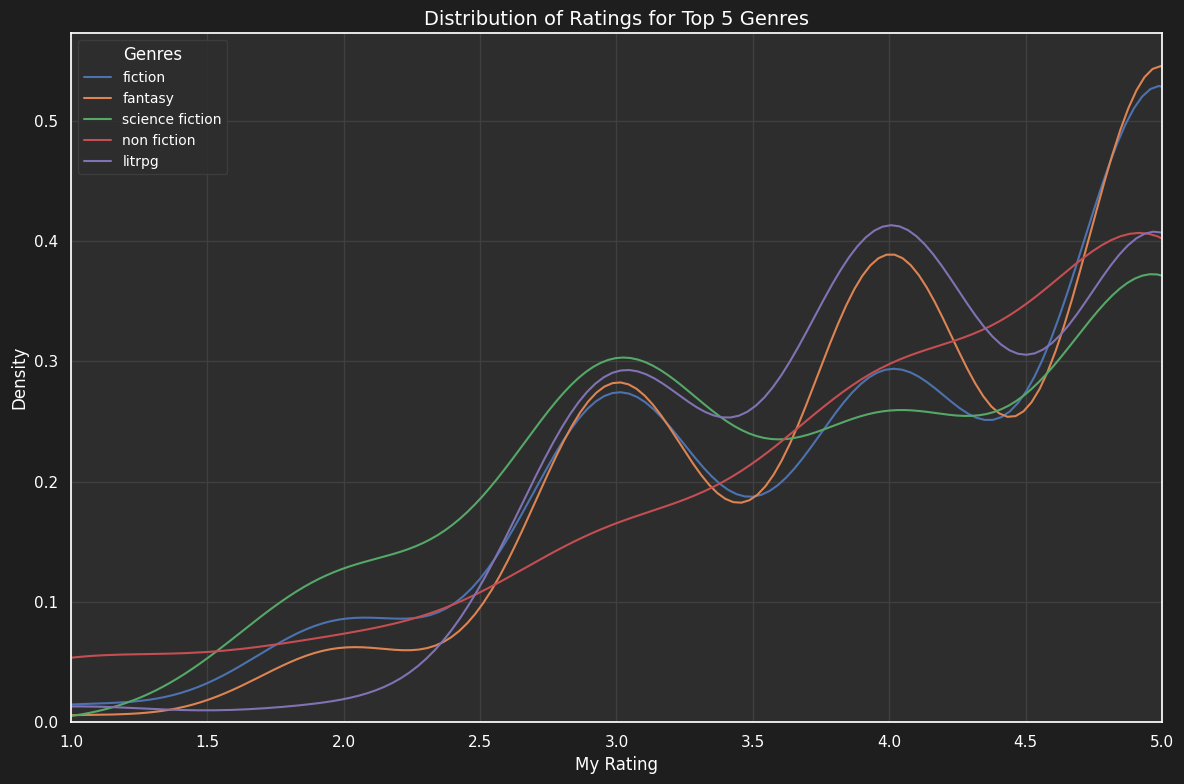

Top 5 Genres:
fiction:
  Number of books: 257
  Average rating: 4.04
  Most common rating: 5

fantasy:
  Number of books: 232
  Average rating: 4.10
  Most common rating: 5

science fiction:
  Number of books: 121
  Average rating: 3.84
  Most common rating: 5

non fiction:
  Number of books: 108
  Average rating: 3.98
  Most common rating: 5

litrpg:
  Number of books: 86
  Average rating: 4.05
  Most common rating: 4



In [34]:
def prepare_genre_data(df):
    """
    Prepare the genre data by melting the genre columns and dropping missing values.

    Args:
    df (pd.DataFrame): DataFrame containing book information including genre columns and ratings

    Returns:
    pd.DataFrame: Melted DataFrame with genre and rating information
    """
    # Melt the dataframe to convert the genre columns into rows
    melted_df = df.melt(id_vars=['my_rating'], value_vars=['genre_1', 'genre_2', 'genre_3'], var_name='genre_column', value_name='genre')

    # Drop any rows with missing genre values
    melted_df = melted_df.dropna(subset=['genre'])

    return melted_df

def plot_top_genres(df, num_genres=5):
    """
    Plot the rating distribution for the top genres and print statistics.

    Args:
    df (pd.DataFrame): Melted DataFrame with genre and rating information
    num_genres (int): Number of top genres to analyze (default is 5)

    Returns:
    None
    """
    # Get the top genres
    top_genres = df['genre'].value_counts().nlargest(num_genres).index

    # Filter the dataframe to include only the top genres
    top_genres_df = df[df['genre'].isin(top_genres)]

    # Set up the plot
    plt.figure(figsize=(12, 8))

    # Plot the kernel density estimate for each top genre
    for i, genre in enumerate(top_genres):
        genre_data = top_genres_df[top_genres_df['genre'] == genre]['my_rating']
        if genre_data.var() > 0:
            sns.kdeplot(genre_data, label=genre)

    # Customize the plot
    plt.xlabel('My Rating', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution of Ratings for Top {num_genres} Genres', fontsize=14)
    plt.legend(title='Genres', title_fontsize='12', fontsize='10')
    plt.xlim(1, 5)

    plt.tight_layout()
    plt.show()

    # Print some statistics
    print(f"Top {num_genres} Genres:")
    for genre in top_genres:
        genre_data = top_genres_df[top_genres_df['genre'] == genre]['my_rating']
        print(f"{genre}:")
        print(f"  Number of books: {len(genre_data)}")
        print(f"  Average rating: {genre_data.mean():.2f}")
        print(f"  Most common rating: {genre_data.mode().values[0]}")
        print()

# prep data
bookshelf_all_genres = prepare_genre_data(read_bookshelf)

# Plot the top 5 genres
plot_top_genres(bookshelf_all_genres)

# Number of books / pages read by genre

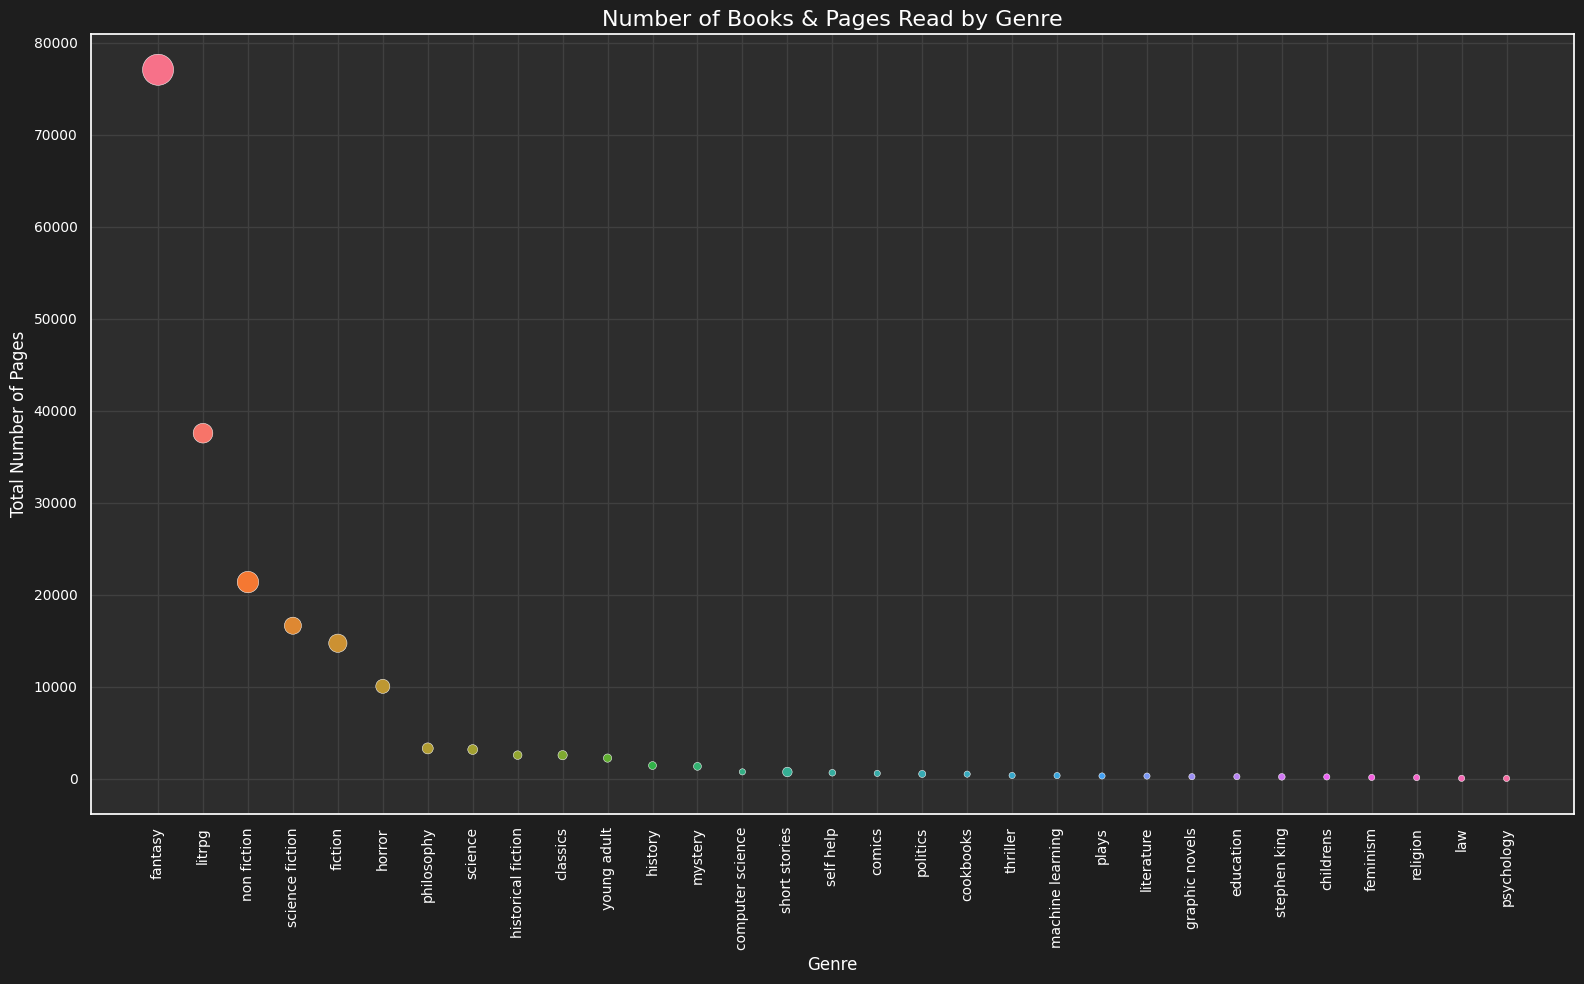


Top 5 Genres Analysis:

fantasy:
  Number of books: 158
  Total pages: 77045.0
  Average rating: 4.21
  Average pages per book: 488
  Most read author: Jim  Butcher
  Year with most fantasy books: 2021.0

litrpg:
  Number of books: 60
  Total pages: 37538.0
  Average rating: 3.97
  Average pages per book: 626
  Most read author: TheFirstDefier
  Year with most litrpg books: 2024

non fiction:
  Number of books: 72
  Total pages: 21357.0
  Average rating: 4.06
  Average pages per book: 301
  Most read author: Adam Kay
  Year with most non fiction books: 2024.0

science fiction:
  Number of books: 44
  Total pages: 16614.0
  Average rating: 3.82
  Average pages per book: 378
  Most read author: Iain M. Banks
  Year with most science fiction books: 2020.0

fiction:
  Number of books: 51
  Total pages: 14710.0
  Average rating: 3.92
  Average pages per book: 288
  Most read author: Ernest Hemingway
  Year with most fiction books: 2021.0


In [35]:
def analyze_genres(df):
    """
    Analyze genres by aggregating book count, total pages, and average rating.

    Args:
    df (pd.DataFrame): DataFrame containing book information

    Returns:
    pd.DataFrame: Aggregated data by genre
    """
    book_count = df["genre_1"].value_counts().reset_index()
    book_count.columns = ["genre_1", "count"]

    grouped_by_genre = df.groupby("genre_1").agg({
        "number_of_pages": "sum",
        "my_rating": "mean"
    }).reset_index()
    grouped_by_genre = grouped_by_genre.merge(book_count, on="genre_1")
    grouped_by_genre = grouped_by_genre.sort_values("number_of_pages", ascending=False)

    return grouped_by_genre

def plot_genre_analysis(grouped_data):
    """
    Plot genre analysis as a scatter plot of pages read vs genre, without number labels.

    Args:
    grouped_data (pd.DataFrame): Aggregated genre data

    Returns:
    pd.DataFrame: Top 5 genres by number of pages
    """
    plt.figure(figsize=(16, 10))

    scatter = sns.scatterplot(x="genre_1", y="number_of_pages", data=grouped_data, hue="genre_1", size="count",
                    sizes=(20, 500), legend=False)

    plt.title("Number of Books & Pages Read by Genre", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Total Number of Pages", fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

    return grouped_data.head()

def print_top_genres_info(top_genres, df):
    """
    Print detailed information about the top genres.

    Args:
    top_genres (pd.DataFrame): Top genres data
    df (pd.DataFrame): Original DataFrame containing book information
    """
    # Convert 'date_read' to datetime if it's not already
    try:
        df['date_read'] = pd.to_datetime(df['date_read'])
    except Exception as e:
        print(f"Error converting 'date_read' to datetime: {e}")
        print("Sample of 'date_read' values:")
        print(df['date_read'].head())
        return

    print("\nTop 5 Genres Analysis:")
    for _, row in top_genres.iterrows():
        genre = row['genre_1']
        print(f"\n{genre}:")
        print(f"  Number of books: {row['count']}")
        print(f"  Total pages: {row['number_of_pages']}")
        print(f"  Average rating: {row['my_rating']:.2f}")

        genre_books = df[df['genre_1'] == genre]
        print(f"  Average pages per book: {genre_books['number_of_pages'].mean():.0f}")
        print(f"  Most read author: {genre_books['author'].mode().values[0]}")

        # Check if 'date_read' column exists and has valid data
        if 'date_read' in genre_books.columns and not genre_books['date_read'].isna().all():
            print(f"  Year with most {genre} books: {genre_books['date_read'].dt.year.mode().values[0]}")
        else:
            print(f"  Year with most {genre} books: Data not available")

# Analyze genres
grouped_by_genre = analyze_genres(read_bookshelf)

# Plot and get top 5 genres
top_5_genres = plot_genre_analysis(grouped_by_genre)

# Print top genres info
print_top_genres_info(top_5_genres, read_bookshelf)

# Number of Books Read by Year Published and Genre

## \# of Books Read By Year Published & Genre, all data


Top 10 Genres Since 1990:
genre
fiction            249
fantasy            232
science fiction    116
non fiction        106
litrpg              86
young adult         58
audible             56
nonfiction          53
horror              31
classics            30
Name: count, dtype: int64


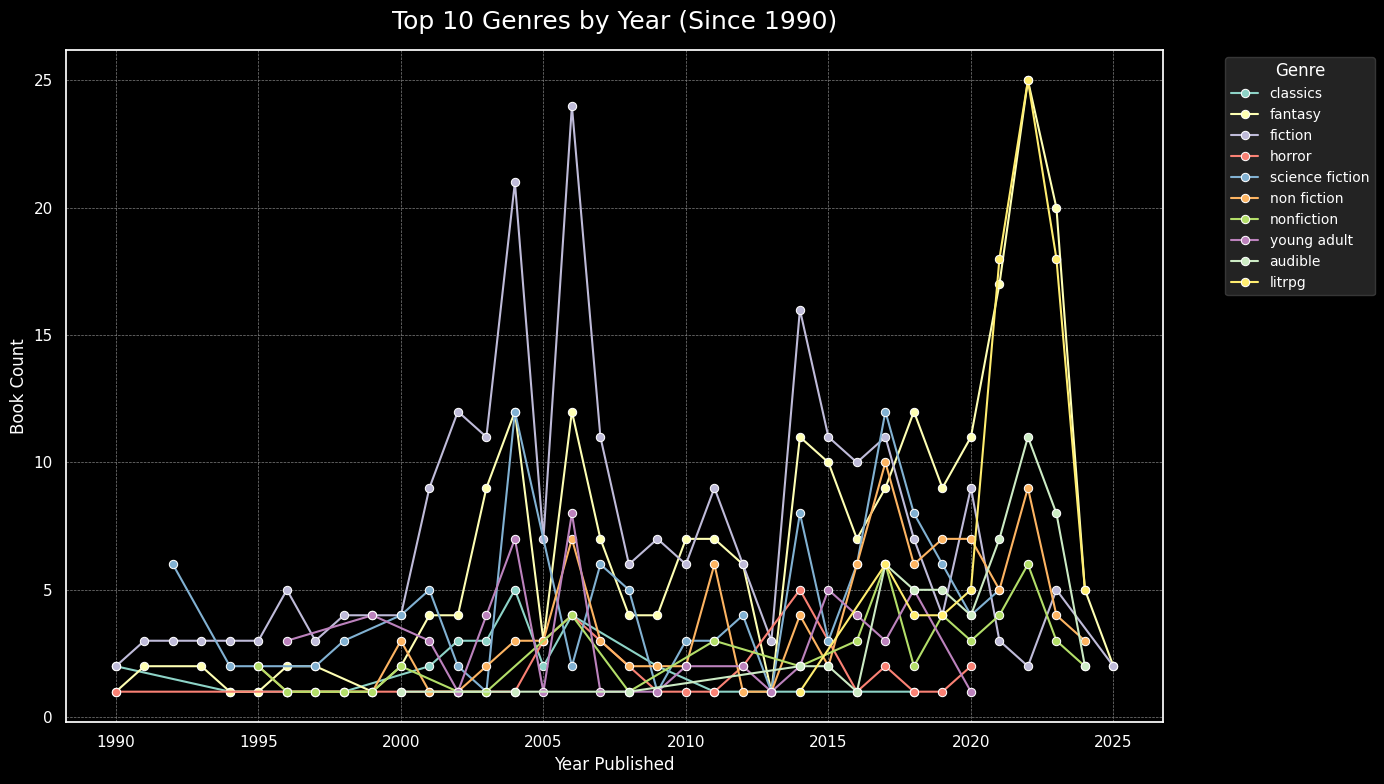

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable dark mode for plots
plt.style.use('dark_background')

def count_genres(read_bookshelf):
    """
    Counts the occurrences of each genre in the provided DataFrame.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book information including genres.

    Returns:
        pd.DataFrame: A DataFrame with one row for each unique genre and a 'count' column
            indicating the number of books in that genre.
    """
    # Identify genre columns
    genre_columns = [col for col in read_bookshelf.columns if col.startswith('genre')]
    if not genre_columns:
        raise ValueError("No genre columns found in the DataFrame")

    # Melt the DataFrame to create a long format for genres
    melted_df = pd.melt(
        read_bookshelf,
        id_vars=['year_published'],
        value_vars=genre_columns,
        var_name='genre_column',
        value_name='genre'
    )

    # Filter valid genre values
    melted_df = melted_df[melted_df['genre'].notna() & melted_df['genre'].str.strip().ne('')]

    # Count the occurrences of each genre per year
    return melted_df.groupby(['year_published', 'genre']).size().reset_index(name='count')

def analyze_top_genres_since_1990(read_bookshelf, start_year=1990):
    """
    Analyze and visualize the number of books read for the top 10 genres from 1990 onwards.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book information including genres and publication year.
        start_year (int): The starting year for the analysis (default is 1990).

    Returns:
        matplotlib.figure.Figure: Figure object containing the plot.
        pd.Series: Top 10 genres and their total counts since 1990.
    """
    try:
        # Count genres using the helper function
        genre_counts = count_genres(read_bookshelf)

        # Filter data for the specified year range
        genre_counts = genre_counts[genre_counts['year_published'] >= start_year]

        # Identify top 10 genres by overall count
        top_10_genres = genre_counts.groupby('genre')['count'].sum().nlargest(10)

        # Filter data to include only top 10 genres
        filtered_data = genre_counts[genre_counts['genre'].isin(top_10_genres.index)]

        # Create the plot
        fig, ax = plt.subplots(figsize=(14, 8))
        sns.lineplot(
            data=filtered_data,
            x='year_published',
            y='count',
            hue='genre',
            marker='o',
            ax=ax
        )

        # Customize plot aesthetics
        ax.set_title(f"Top 10 Genres by Year (Since {start_year})", fontsize=18, pad=15)
        ax.set_xlabel("Year Published", fontsize=12)
        ax.set_ylabel("Book Count", fontsize=12)
        ax.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        ax.grid(color='gray', linestyle='--', linewidth=0.5)

        plt.tight_layout()
        return fig, top_10_genres

    except Exception as e:
        print(f"Error: {e}")
        return None, None

top_genres_fig, top_10_genres = analyze_top_genres_since_1990(read_bookshelf)

if top_genres_fig:
    top_genres_fig.show()

if top_10_genres is not None:
    print("\nTop 10 Genres Since 1990:")
    print(top_10_genres)


In [37]:
print(genre_counts)

genre
fiction            257
fantasy            232
science fiction    121
non fiction        108
litrpg              86
                  ... 
programming          1
dark academia        1
iain banks           1
cozy                 1
cs                   1
Name: count, Length: 119, dtype: int64


Let's animate the genres per year by number of books read, and pages.

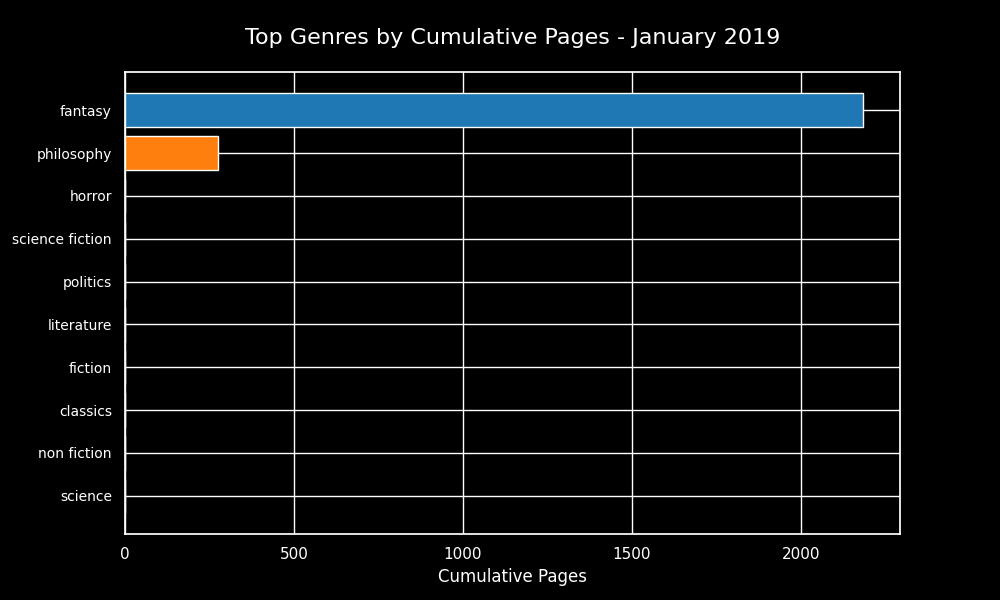

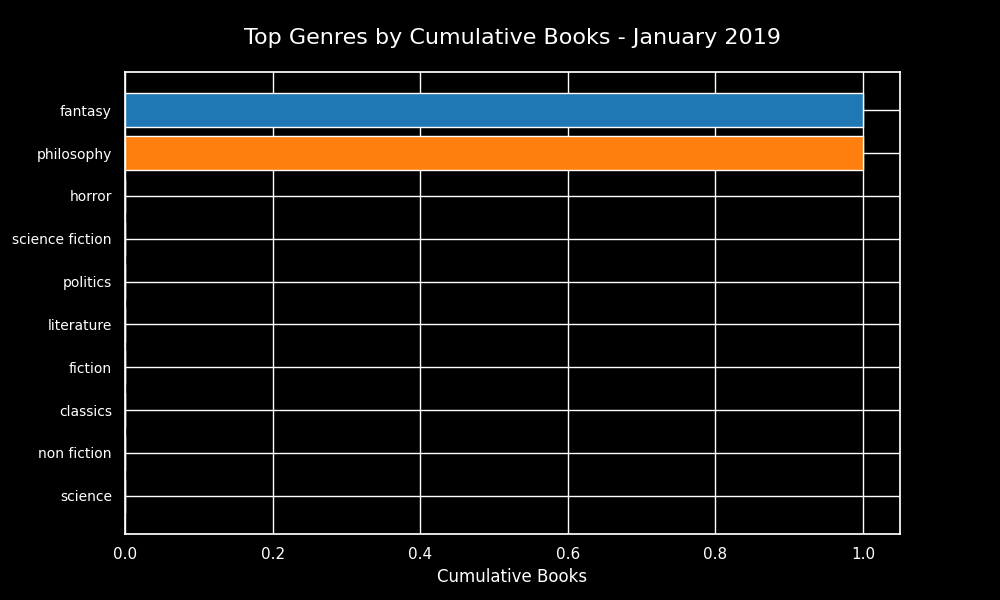

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import seaborn as sns

plt.style.use('dark_background')

def preprocess_data(df):
    # Ensure date column exists or is derived
    if 'date_read' in df.columns:
        df = df.copy()  # Avoid SettingWithCopyWarning
        df.loc[:, 'date'] = pd.to_datetime(df['date_read'], errors='coerce')
    else:
        raise KeyError("Missing 'date_read' column in the dataframe.")

    # Filter for data since 2019
    df = df[df['date'].dt.year >= 2019]

    # Extract month and year
    df.loc[:, 'month_year'] = df['date'].dt.to_period('M')
    df.loc[:, 'month_name'] = df['date'].dt.strftime('%B %Y')  # Full month name

    # Aggregate monthly metrics
    monthly_stats = df.groupby(['month_year', 'genre_1']).agg(
        books_read=('title', 'count'),  # Number of books read
        pages_read=('number_of_pages', 'sum')  # Total pages read
    ).reset_index()

    # Ensure all months and genres are represented
    all_months = monthly_stats['month_year'].unique()
    all_genres = monthly_stats['genre_1'].unique()
    full_index = pd.MultiIndex.from_product([all_months, all_genres], names=['month_year', 'genre_1'])
    monthly_stats = monthly_stats.set_index(['month_year', 'genre_1']).reindex(full_index, fill_value=0).reset_index()

    # Calculate cumulative metrics
    monthly_stats['cumulative_books'] = monthly_stats.groupby('genre_1')['books_read'].cumsum()
    monthly_stats['cumulative_pages'] = monthly_stats.groupby('genre_1')['pages_read'].cumsum()

    return monthly_stats

def create_animation(data, metric, filename):
    metric_col = f'cumulative_{metric}'

    # Get top genres by applying operations after groupby
    top_genres = (
        data.groupby('month_year')
        .apply(lambda x: pd.DataFrame({
            'month_year': [x.name] * len(x.nlargest(10, metric_col)),
            'genre_1': x.nlargest(10, metric_col)['genre_1'],
            metric_col: x.nlargest(10, metric_col)[metric_col]
        }), include_groups=False)
        .reset_index(drop=True)
    )

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.color_palette("tab10", 10)

    def update(frame):
        ax.clear()
        month_data = top_genres[top_genres['month_year'] == frame]
        ax.barh(
            month_data['genre_1'],
            month_data[metric_col],
            color=colors[:len(month_data)]
        )
        month_name = frame.strftime('%B %Y')
        ax.set_title(f"Top Genres by Cumulative {metric.capitalize()} - {month_name}", fontsize=16, pad=20)
        ax.set_xlabel(f"Cumulative {metric.capitalize()}", fontsize=12)
        ax.set_ylabel("Genre", fontsize=12, labelpad=20)
        ax.tick_params(axis='y', labelsize=10)
        ax.invert_yaxis()

    frames = sorted(data['month_year'].unique())
    anim = FuncAnimation(fig, update, frames=frames, interval=666, repeat=True)
    anim.save(filename, writer='pillow', fps=1.5)
    plt.close(fig)

    return Image(open(filename, 'rb').read())

genre_data = preprocess_data(read_bookshelf)

pages_gif = create_animation(genre_data, 'pages', 'top_genres_pages.gif')
books_gif = create_animation(genre_data, 'books', 'top_genres_books.gif')

display(pages_gif)
display(books_gif)


# Predicting Rating for to_read_bookshelf

To do this, we'll build a simple feed-foward NN using PyTorch and train it on the read_bookshelf data, specifically the my_rating, average_rating and genre_1 columns, in order to predict the future my_rating for the books I haven't read yet.


Early stopping at epoch 10


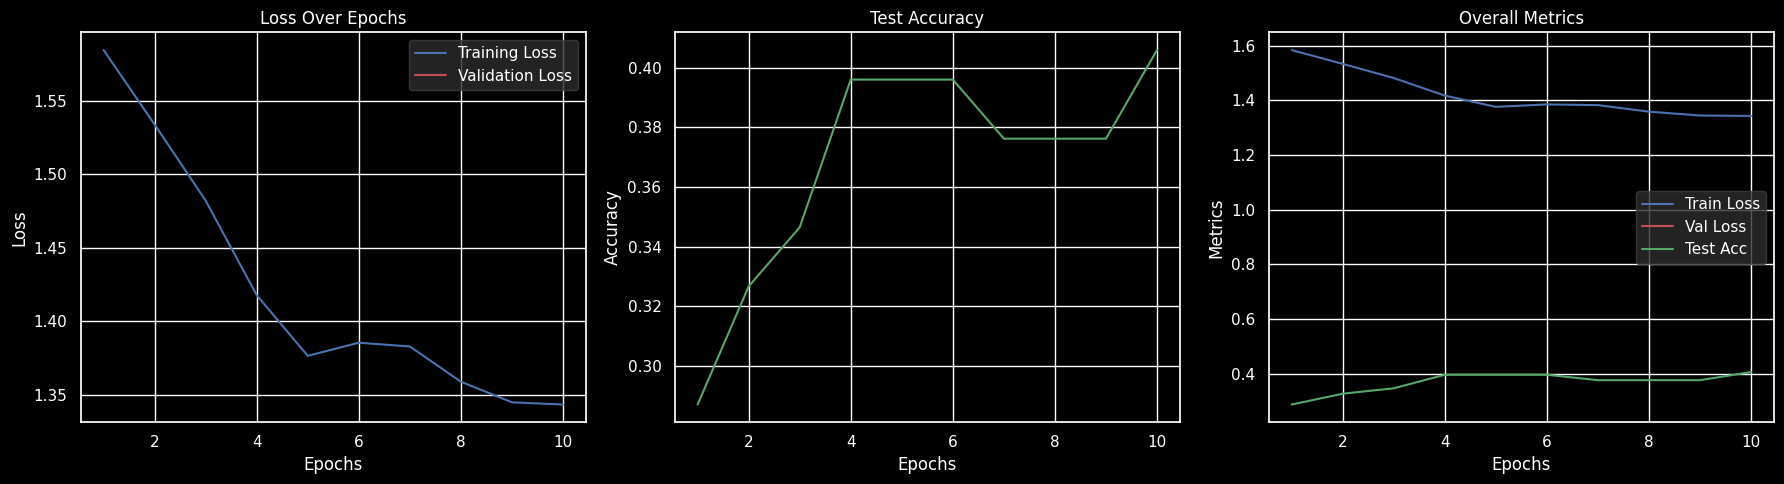

Final Test Accuracy: 0.4059


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

class RatingPredictor(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_rate=0.5):
        super().__init__()
        layers = []
        for i, hidden_size in enumerate(hidden_sizes):
            if i == 0:
                layers.append(nn.Linear(input_size, hidden_size))
            else:
                layers.append(nn.Linear(hidden_sizes[i-1], hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
        self.hidden_layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_sizes[-1], num_classes)

    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x

def train_rating_predictor(read_bookshelf, num_epochs=10000, hidden_sizes=[128, 64, 32], learning_rate=0.001, batch_size=32, patience=10):
    """
    Train a neural network to predict book ratings based on average rating, genre, and number of pages.

    Args:
    read_bookshelf (pd.DataFrame): DataFrame containing book information
    num_epochs (int): Maximum number of training epochs
    hidden_sizes (list): Sizes of the hidden layers in the neural network
    learning_rate (float): Learning rate for the optimizer
    batch_size (int): Batch size for training
    patience (int): Number of epochs to wait before early stopping

    Returns:
    tuple: Trained model, scaler, test data tensors, and lists of losses and accuracies
    """
    # Split data
    train_data, test_data = train_test_split(read_bookshelf, test_size=0.2, random_state=42)
    train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

    # Encode genres
    le = LabelEncoder()
    all_genres = read_bookshelf['genre_1'].unique()
    le.fit(all_genres)

    for data in [train_data, test_data, val_data]:
        data['genre_encoded'] = le.transform(data['genre_1'])

    # Select features
    features = ['average_rating', 'number_of_pages', 'genre_encoded']

    # Normalize numerical features
    scaler = StandardScaler()
    for data in [train_data, test_data, val_data]:
        data[features] = scaler.fit_transform(data[features])

    # Convert data to float and handle NaN values
    for data in [train_data, test_data, val_data]:
        data[features] = data[features].astype(float).fillna(0)

    # Create tensors
    train_inputs = torch.tensor(train_data[features].values, dtype=torch.float32)
    train_labels = torch.tensor(train_data['my_rating'].values, dtype=torch.long) - 1
    val_inputs = torch.tensor(val_data[features].values, dtype=torch.float32)
    val_labels = torch.tensor(val_data['my_rating'].values, dtype=torch.long) - 1
    test_inputs = torch.tensor(test_data[features].values, dtype=torch.float32)
    test_labels = torch.tensor(test_data['my_rating'].values, dtype=torch.long) - 1

    # Define the model
    input_size = train_inputs.shape[1]
    num_classes = 5  # number of possible ratings (1 to 5)
    model = RatingPredictor(input_size, hidden_sizes, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store loss and accuracy for plotting
    train_losses = []
    val_losses = []
    test_accuracies = []

    # Early stopping variables
    best_val_loss = float('inf')
    epochs_no_improve = 0

    # Train the model
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for i in range(0, train_inputs.shape[0], batch_size):
            batch_inputs = train_inputs[i:i+batch_size]
            batch_labels = train_labels[i:i+batch_size]

            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Calculate average loss for the epoch
        avg_train_loss = epoch_loss / (train_inputs.shape[0] // batch_size)
        train_losses.append(avg_train_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels).item()
            val_losses.append(val_loss)

            test_outputs = model(test_inputs)
            _, predicted = torch.max(test_outputs.data, 1)
            accuracy = (predicted == test_labels).float().mean().item()
            test_accuracies.append(accuracy)

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Accuracy: {accuracy:.4f}')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

    return model, scaler, test_inputs, test_labels, train_losses, val_losses, test_accuracies

def plot_training_progress(train_losses, val_losses, test_accuracies):
    """
    Plot the training loss, validation loss, and test accuracy over epochs.

    Args:
    train_losses (list): List of training losses
    val_losses (list): List of validation losses
    test_accuracies (list): List of test accuracies
    """
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 5))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot test accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, test_accuracies, 'g-')
    plt.title('Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Plot all metrics
    plt.subplot(1, 3, 3)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.plot(epochs, test_accuracies, 'g-', label='Test Accuracy')
    plt.title('All Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# train
model, scaler, test_inputs, test_labels, train_losses, val_losses, test_accuracies = train_rating_predictor(read_bookshelf)

# plot
plot_training_progress(train_losses, val_losses, test_accuracies)

# evaluate accuracy
model.eval()
with torch.no_grad():
    test_outputs = model(test_inputs)
    _, predicted = torch.max(test_outputs.data, 1)
    accuracy = (predicted == test_labels).float().mean()
    print(f'Final Test Accuracy: {accuracy.item():.4f}')

OK, that's the model trained. Let's try and see what happens when we predict the ratings.

## All Results

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
import joblib

def book_rating_prediction_pipeline(read_bookshelf, to_read_bookshelf):
    """
    This function builds and evaluates a machine learning pipeline to predict book ratings
    based on user data. The pipeline preprocesses both numerical and categorical features,
    fits a RandomForestClassifier, and applies the model to new data for rating predictions.

    Parameters:
    read_bookshelf (DataFrame): The dataset containing books the user has already rated.
    to_read_bookshelf (DataFrame): The dataset containing books the user plans to read.

    Returns:
    DataFrame: The to_read_bookshelf DataFrame with an additional column for predicted ratings.

    Steps:
    1. Splits the data into training and test sets.
    2. Defines and preprocesses numeric and categorical features.
    3. Computes class weights to handle class imbalance.
    4. Constructs and fits a RandomForestClassifier using a pipeline.
    5. Evaluates the model's performance on the test set.
    6. Saves the pipeline for later use.
    7. Applies the model to predict ratings for the to-read bookshelf.
    """

    # Split the data into training and test sets
    train_data, test_data = train_test_split(read_bookshelf, test_size=0.2, random_state=42)

    # Define numeric and categorical features
    numeric_features = ['average_rating', 'number_of_pages']
    categorical_features = ['genre_1']

    # Create a preprocessing pipeline for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Create a preprocessing pipeline for categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing pipelines
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Prepare training data
    X_train = train_data[numeric_features + categorical_features]
    y_train = train_data['my_rating'].fillna(0) - 1  # Adjust ratings to be 0-4

    # Compute class weights for the classifier
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Create the machine learning pipeline with class weights
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict))
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Evaluate the model on the test set
    X_test = test_data[numeric_features + categorical_features]
    y_test = test_data['my_rating'].fillna(0) - 1
    y_pred = pipeline.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Save the trained pipeline to a file for future use
    joblib.dump(pipeline, 'book_rating_pipeline.joblib')

    # Predict ratings for the to-read bookshelf dataset
    to_read_features = to_read_bookshelf[numeric_features + categorical_features]
    predicted_ratings = pipeline.predict(to_read_features)

    # Add the predicted ratings to the to_read_bookshelf DataFrame
    to_read_bookshelf['predicted_rating'] = predicted_ratings + 1  # Convert ratings back to 1-5 scale

    # Return the modified DataFrame with predicted ratings
    return to_read_bookshelf[['title', 'predicted_rating']]

result = book_rating_prediction_pipeline(read_bookshelf.copy(), to_read_bookshelf.copy())
print(result)

Accuracy: 0.3564356435643564

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.25      0.17      0.21        23
           3       0.26      0.20      0.23        30
           4       0.46      0.63      0.53        41

    accuracy                           0.36       101
   macro avg       0.19      0.20      0.19       101
weighted avg       0.32      0.36      0.33       101

                                                 title  predicted_rating
0            Mark of the Fool 3 (Mark of the Fool, #3)                 5
1    How We Show Up: Reclaiming Family, Friendship,...                 4
2    Mutual Aid: Building Solidarity in This Crisis...                 4
3    Let This Radicalize You: Organizing and the Re...                 5
4       No One Will Come Back For Us and Other Stories                 3
..                  

Great. This could be saved as a CSV or similar and perused - you could sort by descending predicted_rating to choose your next books!

# Gantt chart of books read

Let's make use of the data we cleaned earlier for the enhanced csv.

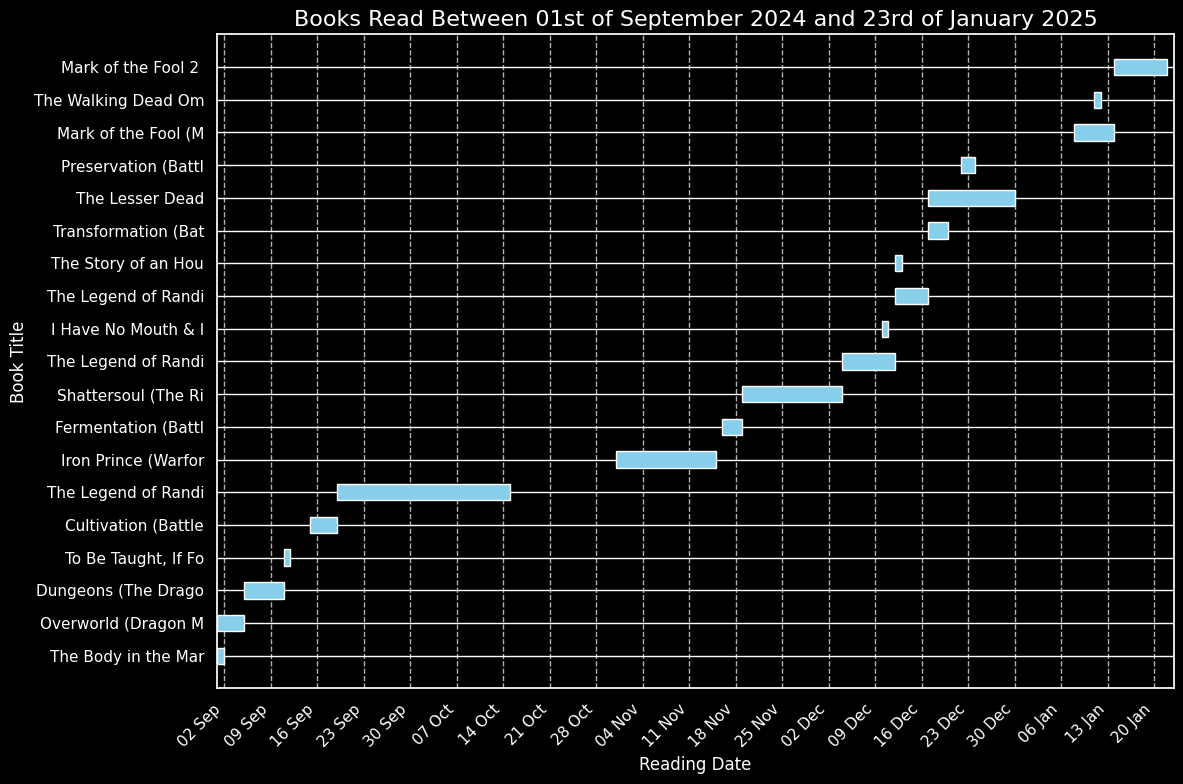

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

# Enable dark mode
plt.style.use('dark_background')

# Define the start and end dates
start_date = pd.to_datetime('2024-09-01')
end_date = pd.to_datetime('2025-01-23')

# Filter the DataFrame to include rows where the book was read between the start and end dates
df = read_bookshelf[(read_bookshelf['end_0'] >= start_date) & (read_bookshelf['start_0'] <= end_date)]

# Create a new DataFrame with the book title and start/end dates
df_tasks = df[['title', 'start_0', 'end_0', 'number_of_pages']].copy()
df_tasks['title'] = df_tasks['title'].str.slice(0, 19)
df_tasks['start_0'] = pd.to_datetime(df_tasks['start_0'])
df_tasks['end_0'] = pd.to_datetime(df_tasks['end_0'])

# Set a minimum duration of 1 day for visibility
df_tasks['duration'] = (df_tasks['end_0'] - df_tasks['start_0']).apply(lambda x: max(x, timedelta(days=1)))

# Sort the DataFrame by start date
df_tasks = df_tasks.sort_values('start_0')

# Create a new column for the y-axis, which will be the book title
df_tasks['y'] = range(1, len(df_tasks) + 1)

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the horizontal bars for each task
ax.barh(df_tasks['y'], df_tasks['duration'].dt.days, left=df_tasks['start_0'], height=0.5, align='center', color='skyblue')

# Set the x-axis limits and format the ticks as dates
ax.set_xlim(start_date, end_date)
ax.xaxis_date()

# Format the x-axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))  # Major ticks on Mondays
ax.xaxis.set_minor_locator(mdates.DayLocator())  # Minor ticks every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))  # Format as '01 Apr'

# Rotate and align the tick labels so they look better
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add gridlines for better readability
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Set the y-axis limits and labels
ax.set_ylim(0, len(df_tasks) + 1)
ax.set_yticks(df_tasks['y'])
ax.set_yticklabels(df_tasks['title'])

# Dynamic title generation based on the selected dates
def day_suffix(day):
    if 11 <= day <= 13:
        return "th"
    else:
        return {1: "st", 2: "nd", 3: "rd"}.get(day % 10, "th")

start_suffix = day_suffix(start_date.day)
end_suffix = day_suffix(end_date.day)

start_str = start_date.strftime(f"%d{start_suffix} of %B %Y")
end_str = end_date.strftime(f"%d{end_suffix} of %B %Y")

ax.set_title(f"Books Read Between {start_str} and {end_str}", fontsize=16)
ax.set_xlabel('Reading Date', fontsize=12)
ax.set_ylabel('Book Title', fontsize=12)

# Adjust layout to prevent cutoff of tick labels
plt.tight_layout()

# Show the plot
plt.show()


# Predict Read Times - Again!

This time we'll use a mix of data, and we can see which data are more useful in prediction of read times.

Cross-validation R2 scores:
   CV1      CV2     CV3      CV4     CV5
------  -------  ------  -------  ------
0.1147  -0.5371  0.1882  -2.6095  0.3599
Mean R2 score: -0.4968

R-squared Score on test set: -0.1185

Sample predictions:
+---+-------------------------------------------------------------------------------+------------+----------------+----------------+-----------------+-------------------+---------------------------+
|   |                                     Title                                     | Page Count | Average Rating | Year Published |      Genre      | Number of Ratings | Estimated Duration (days) |
+---+-------------------------------------------------------------------------------+------------+----------------+----------------+-----------------+-------------------+---------------------------+
| 0 |                   Mark of the Fool 3 (Mark of the Fool, #3)                   |   726.0    |      4.43      |     2023.0     |     fantasy     |       4442        |

<ipython-input-45-0858cbc2ae63>:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-0858cbc2ae63>:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



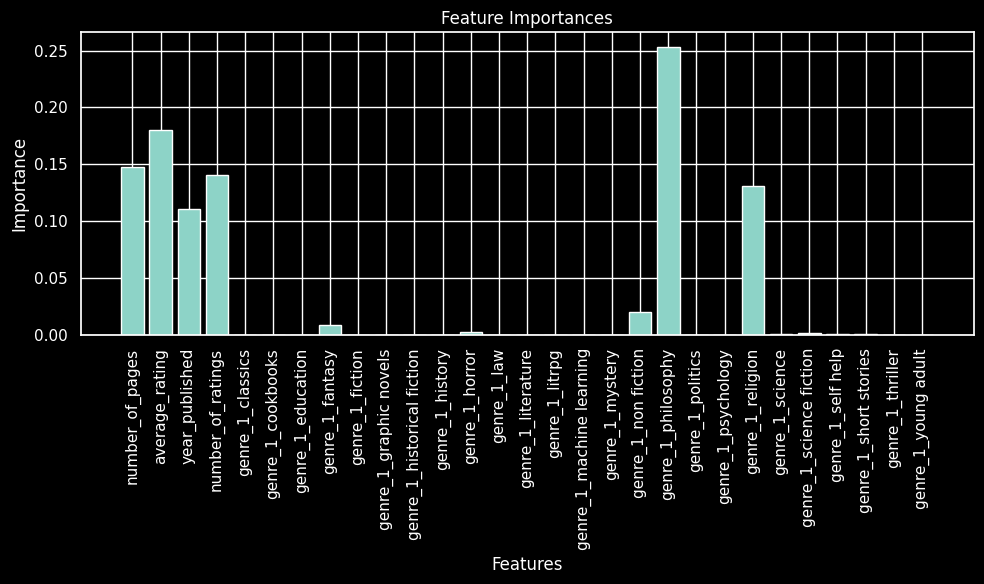

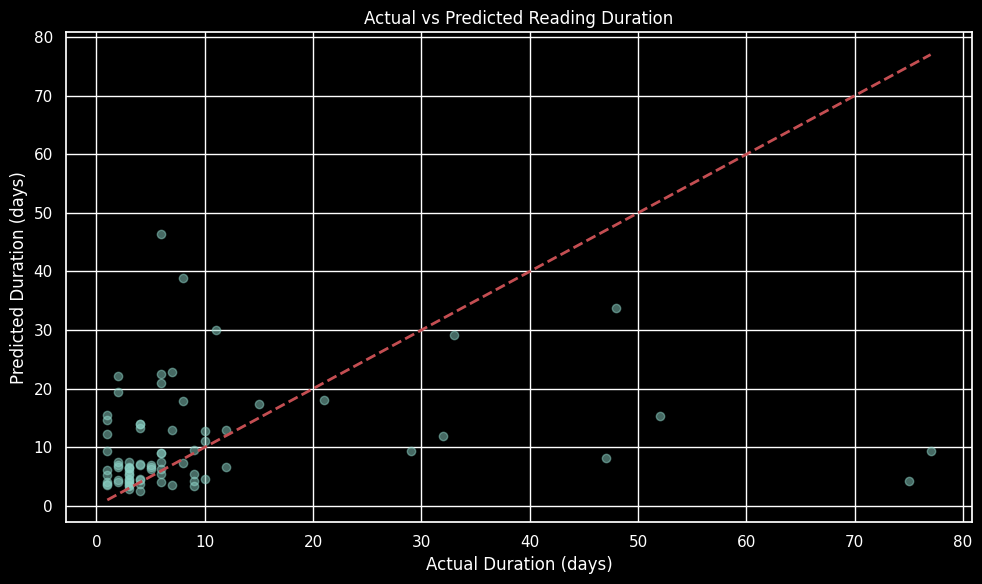

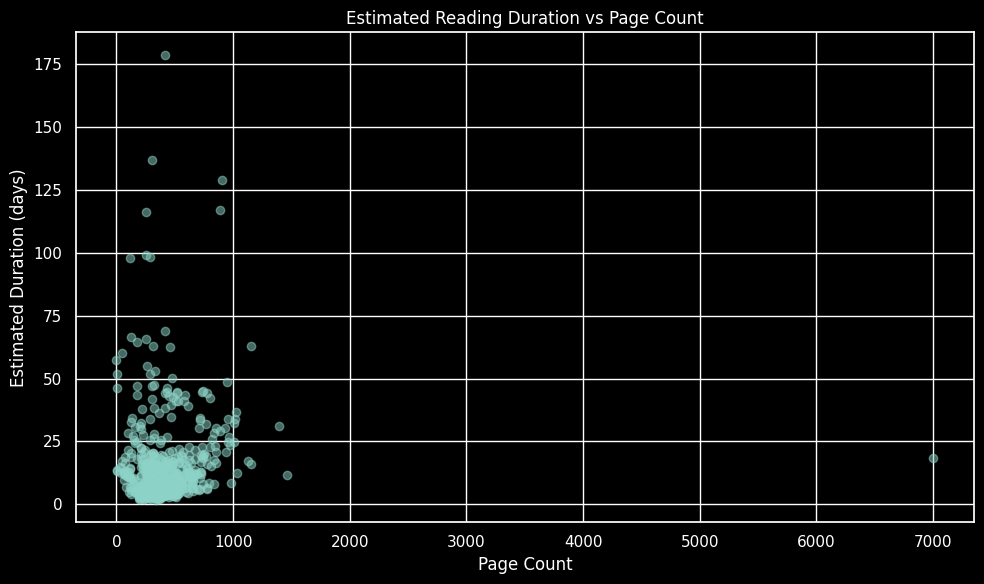

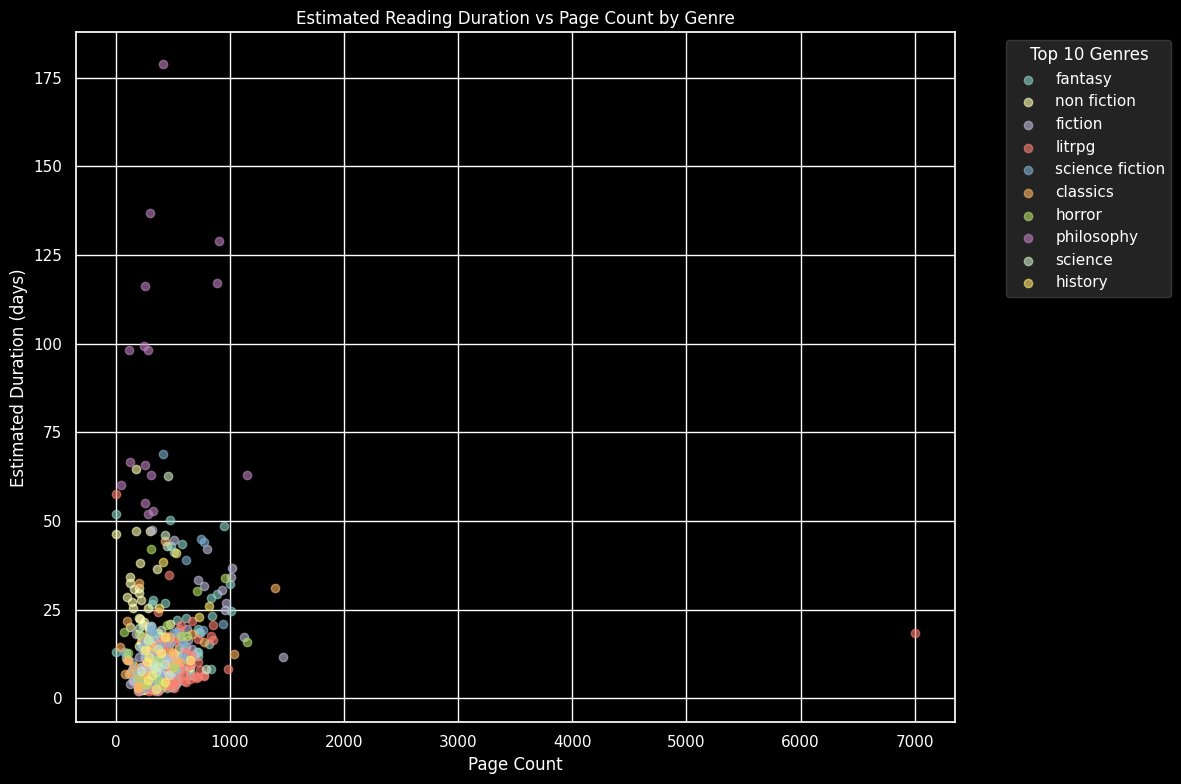


Summary Statistics for Top 10 Genres:
+-----------------+---------------------------------------+-----------------------------------------+--------------------------------------+--------------------------------------+------------------------+--------------------------+-----------------------+-----------------------+
|      Genre      | ('Estimated Duration (days)', 'mean') | ('Estimated Duration (days)', 'median') | ('Estimated Duration (days)', 'min') | ('Estimated Duration (days)', 'max') | ('Page Count', 'mean') | ('Page Count', 'median') | ('Page Count', 'min') | ('Page Count', 'max') |
+-----------------+---------------------------------------+-----------------------------------------+--------------------------------------+--------------------------------------+------------------------+--------------------------+-----------------------+-----------------------+
|    classics     |          13.451538461538462           |                 10.855                  |                 3.0

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Data
read_df = read_bookshelf.copy()
to_read_df = to_read_bookshelf.copy()

# Calculate duration in days
read_df['duration'] = pd.to_datetime(read_df['end_0']) - pd.to_datetime(read_df['start_0'])
read_df = read_df[(read_df['duration'] > pd.Timedelta(0)) & (read_df['duration'] <= pd.Timedelta(days=365))]
read_df = read_df.dropna(subset=['duration', 'number_of_pages', 'average_rating', 'year_published', 'genre_1', 'number_of_ratings'])
y = read_df['duration'].dt.total_seconds() / (24 * 3600)
X = read_df[['number_of_pages', 'average_rating', 'year_published', 'genre_1', 'number_of_ratings']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define Pipeline
numeric_features = ['number_of_pages', 'average_rating', 'year_published', 'number_of_ratings']
categorical_features = ['genre_1']

numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# Step 3: Perform Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R2 scores:")
print(tabulate([cv_scores], headers=['CV1', 'CV2', 'CV3', 'CV4', 'CV5'], floatfmt='.4f'))
print(f"Mean R2 score: {cv_scores.mean():.4f}")

# Step 4: Fit Model and Evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test set: {r2:.4f}")

# Step 5: Predictions for `to_read_bookshelf`
to_read_X = to_read_df[['number_of_pages', 'average_rating', 'year_published', 'genre_1', 'number_of_ratings']]
to_read_X[numeric_features] = to_read_X[numeric_features].fillna(to_read_X[numeric_features].median())
to_read_X['genre_1'] = to_read_X['genre_1'].fillna(to_read_X['genre_1'].mode()[0])
to_read_y_pred = np.maximum(model.predict(to_read_X), 0)

# Results DataFrame
results = pd.DataFrame({
    'Title': to_read_df['title'],
    'Page Count': to_read_df['number_of_pages'],
    'Average Rating': to_read_df['average_rating'],
    'Year Published': to_read_df['year_published'],
    'Genre': to_read_df['genre_1'],
    'Number of Ratings': to_read_df['number_of_ratings'],
    'Estimated Duration (days)': to_read_y_pred
})

# Print Results
print("\nSample predictions:")
print(tabulate(results.head(10), headers='keys', tablefmt='pretty', floatfmt='.2f'))

# Top and Bottom Predictions
print("\nTop 10 books estimated to take the longest to read:")
print(tabulate(results.sort_values('Estimated Duration (days)', ascending=False).head(10), headers='keys', tablefmt='pretty', floatfmt='.2f'))

print("\nTop 10 books estimated to take the shortest to read:")
print(tabulate(results.sort_values('Estimated Duration (days)', ascending=True).head(10), headers='keys', tablefmt='pretty', floatfmt='.2f'))

# Step 6: Feature Importances
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = numeric_features + model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 7: Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (days)')
plt.ylabel('Predicted Duration (days)')
plt.title('Actual vs Predicted Reading Duration')
plt.tight_layout()
plt.show()

# Step 8: Scatter Plot for Page Count vs Estimated Duration
plt.figure(figsize=(10, 6))
plt.scatter(results['Page Count'], results['Estimated Duration (days)'], alpha=0.5)
plt.xlabel('Page Count')
plt.ylabel('Estimated Duration (days)')
plt.title('Estimated Reading Duration vs Page Count')
plt.tight_layout()
plt.show()

# Step 9: Genre-based Scatter Plot
plt.figure(figsize=(12, 8))
top_genres = results['Genre'].value_counts().nlargest(10).index
for genre in top_genres:
    genre_data = results[results['Genre'] == genre]
    plt.scatter(genre_data['Page Count'], genre_data['Estimated Duration (days)'], label=genre, alpha=0.6)
plt.xlabel('Page Count')
plt.ylabel('Estimated Duration (days)')
plt.title('Estimated Reading Duration vs Page Count by Genre')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 10: Summary Statistics
top_genre_stats = results[results['Genre'].isin(top_genres)].groupby('Genre').agg({
    'Estimated Duration (days)': ['mean', 'median', 'min', 'max'],
    'Page Count': ['mean', 'median', 'min', 'max']
})
print("\nSummary Statistics for Top 10 Genres:")
print(tabulate(top_genre_stats, headers='keys', tablefmt='pretty', floatfmt='.2f'))


#Word Cloud for Genres

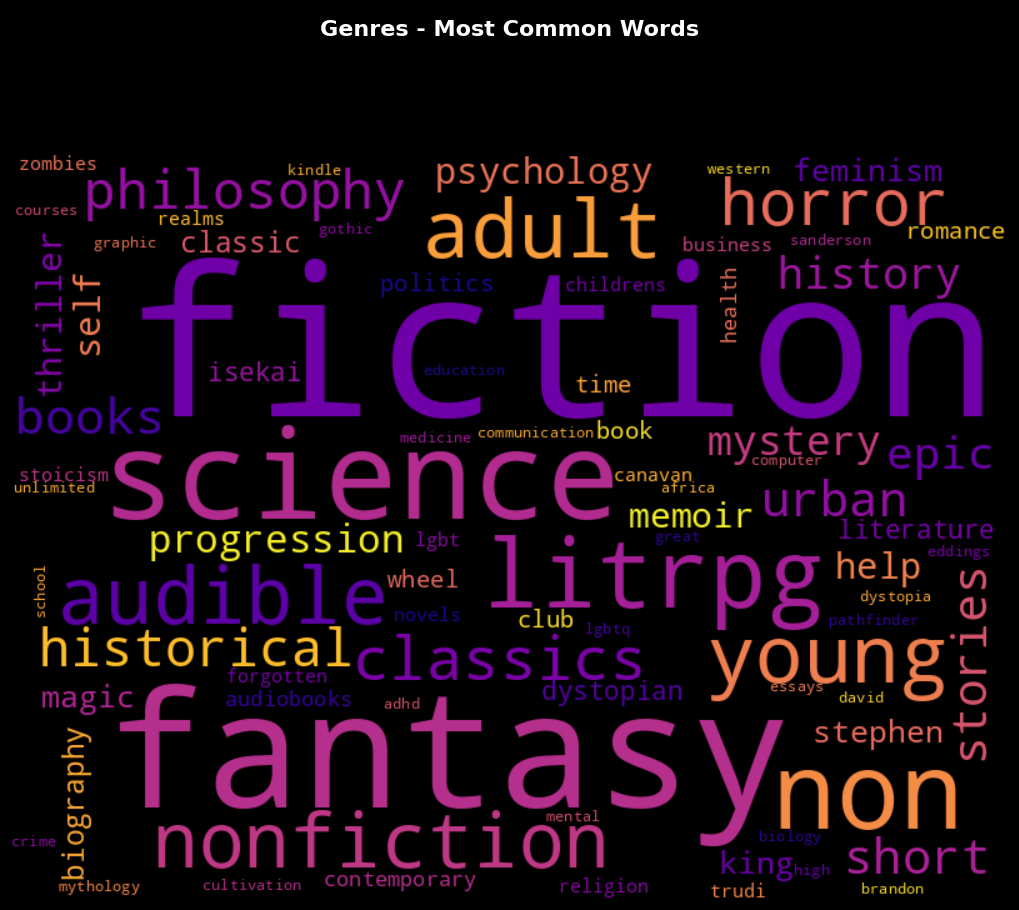

In [46]:
import matplotlib.patches as patches

def create_genre_word_cloud(bookshelf_all_genres):
    """
    Create a word cloud visualization of the most frequent words in book genres with a title banner.

    Args:
        bookshelf_all_genres (pd.DataFrame): DataFrame containing book genres in the 'genre' column.

    Returns:
        matplotlib.figure.Figure: Figure object displaying the word cloud with a minimal banner.
    """
    # Ensure NLTK data is downloaded
    nltk.download('stopwords', quiet=True)
    nltk.download("punkt", quiet=True)

    # Get all genres
    genres = " ".join(str(genre) for genre in bookshelf_all_genres['genre'].dropna())

    # Define and update stopwords
    stop_words = set(stopwords.words("english"))
    stop_words.update(['the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on',
                       'that', 'this', 'at', 'an', 'by', 'be', 'as', 'is', 'are'])

    # Text preprocessing
    # Lowercase, remove stopwords, special characters, and numbers
    filtered_genres = ''.join(e for e in genres.lower() if e.isalnum() or e.isspace())
    word_tokens = word_tokenize(filtered_genres)
    word_tokens = [word for word in word_tokens if word not in stop_words and not word.isdigit()]

    # Count the frequency of each word
    word_counts = Counter(word_tokens)

    # Create WordCloud object
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='black',  # Dark mode-friendly
        colormap='plasma',         # Vibrant colormap
        stopwords=stop_words,
        min_font_size=10
    ).generate_from_frequencies(word_counts)

    # Create the figure and layout
    fig = plt.figure(figsize=(10, 10))

    # Add the banner
    ax_banner = fig.add_axes([0, 0.95, 1, 0.04], facecolor='black')
    ax_banner.text(0.5, 0.5, "Genres - Most Common Words",
                   color='white', fontsize=16, fontweight='bold',
                   ha='center', va='center')
    ax_banner.set_xticks([])
    ax_banner.set_yticks([])
    ax_banner.axis("off")

    # Add the word cloud
    ax_cloud = fig.add_axes([0, 0, 1, 0.95])
    ax_cloud.imshow(wordcloud, interpolation='bilinear')
    ax_cloud.axis("off")

    return fig

# Generate and display the word cloud for genres
genre_word_cloud_fig = create_genre_word_cloud(bookshelf_all_genres)
plt.show()


# Sentiment Analysis

Sentiment analysis is analyzing a text for emotional content. Let's see what the titles of the books read flag in terms emotional content.

In [47]:
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_title_sentiment(read_bookshelf):
    """
    Perform sentiment analysis on book titles and associate them with user ratings.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book titles in the 'title' column
                                        and ratings in the 'my_rating' column.

    Returns:
        pd.DataFrame: A DataFrame containing the book titles, their sentiment scores, and ratings.
    """
    # Ensure NLTK resources are downloaded
    nltk.download('vader_lexicon', quiet=True)
    nltk.download('stopwords', quiet=True)

    # Extract titles and ratings
    titles = read_bookshelf['title'].dropna().copy()
    ratings = read_bookshelf['my_rating'].copy()

    # Load stopwords
    stop_words = set(stopwords.words('english'))

    # Initialize the sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Process titles and perform sentiment analysis
    sentiment_scores = []
    for title in titles:
        # Remove stopwords and special symbols
        filtered_title = " ".join(
            [word for word in title.lower().split() if word not in stop_words]
        )
        filtered_title = ''.join(e for e in filtered_title if e.isalnum() or e.isspace())

        # Perform sentiment analysis
        sentiment = sia.polarity_scores(filtered_title)
        sentiment_scores.append(sentiment['compound'])

    # Create a DataFrame with sentiment scores and ratings
    sentiment_df = pd.DataFrame({
        'Title': titles,
        'Sentiment': sentiment_scores,
        'Rating': ratings
    })

    return sentiment_df

sentiment_results = analyze_title_sentiment(read_bookshelf)
print(sentiment_results.head())


                                               Title  Sentiment  Rating
0          Mark of the Fool 2 (Mark of the Fool, #2)    -0.7003       5
1            Mark of the Fool (Mark of the Fool, #1)    -0.7003       5
2                 The Walking Dead Omnibus, Volume 1    -0.6486       3
3                                    The Lesser Dead    -0.6486       4
4  The Anthropocene Reviewed: Essays on a Human-C...     0.0000       4


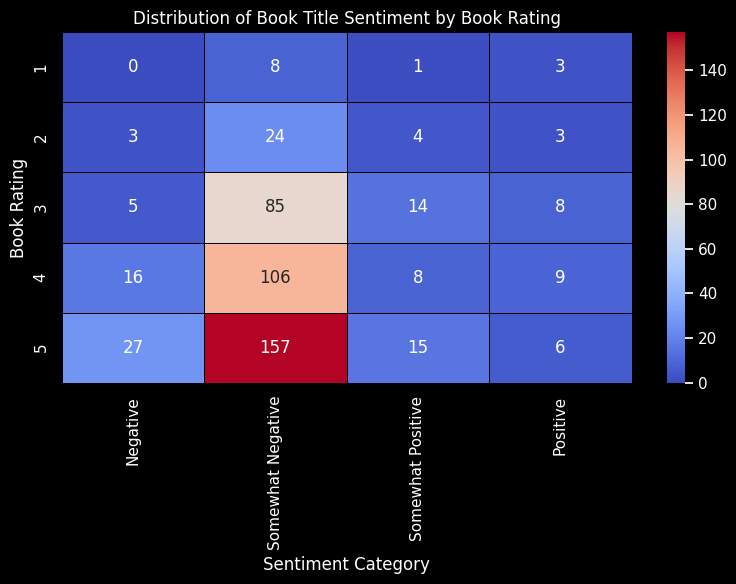

In [51]:
def plot_sentiment_by_rating(sentiment_scores, ratings):
    """
    Plot a heatmap showing the distribution of sentiment categories by book ratings,
    addressing empty cells and improving color representation.

    Args:
        sentiment_scores (list): List of sentiment scores for book titles.
        ratings (pd.Series): Series containing book ratings.
    """
    # Create a DataFrame with sentiment scores, ratings, and counts
    df = pd.DataFrame({
        'Sentiment': sentiment_scores,
        'Rating': ratings,
        'Count': 1
    })

    # Bin sentiment scores into categories
    sentiment_bins = [-1, -0.5, 0, 0.5, 1]
    sentiment_labels = ['Negative', 'Somewhat Negative', 'Somewhat Positive', 'Positive']
    df['Sentiment Category'] = pd.cut(df['Sentiment'], bins=sentiment_bins, labels=sentiment_labels)

    # Aggregate counts by rating and sentiment category
    df_agg = df.groupby(['Rating', 'Sentiment Category'], observed=True).agg({'Count': 'sum'}).reset_index()

    # Pivot the data for heatmap plotting
    heatmap_data = df_agg.pivot(index='Rating', columns='Sentiment Category', values='Count')

    # Fill missing values with 0 for empty cells
    heatmap_data = heatmap_data.fillna(0)

    # Create the heatmap with a divergent colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        heatmap_data,
        cmap='coolwarm',
        annot=True,
        fmt='.0f',
        cbar=True,
        linewidths=0.5,
        linecolor='black'
    )

    # Set axis labels and title
    plt.xlabel('Sentiment Category')
    plt.ylabel('Book Rating')
    plt.title('Distribution of Book Title Sentiment by Book Rating')
    plt.tight_layout()
    plt.show()

plot_sentiment_by_rating(sentiment_results['Sentiment'], sentiment_results['Rating'])


## Review Sentiment Analysis

In [52]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_review_sentiment(read_bookshelf):
    """
    Perform sentiment analysis on book reviews and associate them with titles and ratings.

    Args:
        read_bookshelf (pd.DataFrame): DataFrame containing book reviews in the 'my_review' column,
                                        titles in the 'title' column, and ratings in the 'my_rating' column.

    Returns:
        pd.DataFrame: A DataFrame containing the book titles, reviews, sentiment scores, and ratings.
    """
    # Ensure NLTK resources are downloaded
    nltk.download('vader_lexicon', quiet=True)
    nltk.download('stopwords', quiet=True)

    # Get all reviews, titles, and ratings
    reviews = read_bookshelf['my_review'].dropna()
    titles = read_bookshelf.loc[reviews.index, 'title']
    ratings = read_bookshelf.loc[reviews.index, 'my_rating']

    # Load English stopwords
    english_stops = set(stopwords.words('english'))

    # Initialize the sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Process reviews and perform sentiment analysis
    sentiment_scores = []
    for review in reviews:
        # Remove stopwords and special characters
        filtered_review = " ".join(
            [word for word in review.lower().split() if word not in english_stops]
        )
        filtered_review = ''.join(e for e in filtered_review if e.isalnum() or e.isspace())

        # Perform sentiment analysis
        sentiment = sia.polarity_scores(filtered_review)
        sentiment_scores.append(sentiment['compound'])

    # Create a DataFrame with sentiment scores, reviews, titles, and ratings
    sentiment_df = pd.DataFrame({
        'Title': titles.values,
        'Review': reviews.values,
        'Sentiment': sentiment_scores,
        'Rating': ratings.values
    })

    return sentiment_df
sentiment_results = analyze_review_sentiment(read_bookshelf)
print(sentiment_results.head())


                                               Title  \
0          Mark of the Fool 2 (Mark of the Fool, #2)   
1            Mark of the Fool (Mark of the Fool, #1)   
2                                    The Lesser Dead   
3  The Anthropocene Reviewed: Essays on a Human-C...   
4                                              Babel   

                                              Review  Sentiment  Rating  
0            Thoroughly enjoying this series so far.     0.5709       5  
1                                    Great concept.      0.6249       5  
2  The Lesser Dead is refreshingly different from...     0.6540       4  
3    Rating this book feels rather meta. Four stars.     0.0000       4  
4  The most enthralling book I've read all year. ...     0.4215       5  


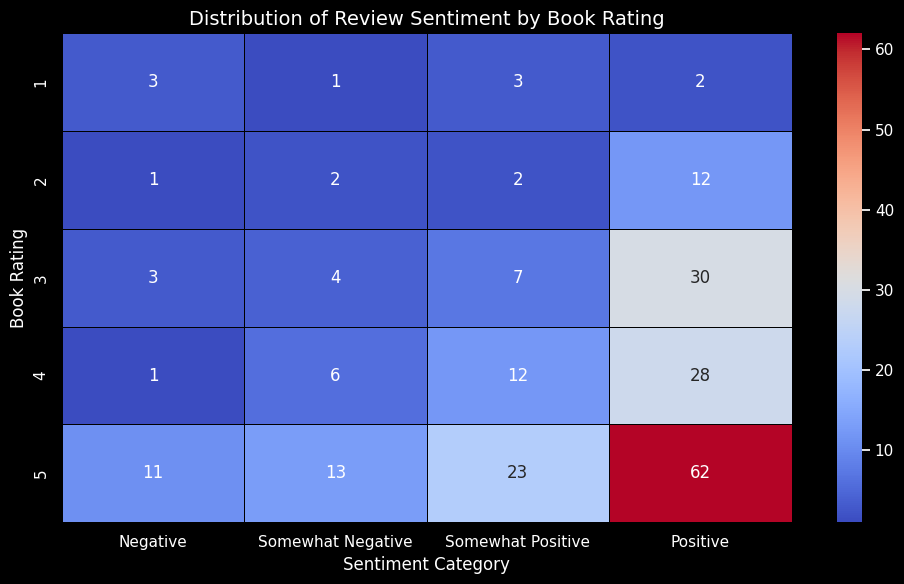

In [54]:
def plot_review_sentiment_heatmap(df):
    """
    Create a heatmap showing the distribution of review sentiment categories by book rating.

    Args:
        df (pd.DataFrame): DataFrame containing sentiment scores, sentiment categories, and ratings.

    Returns:
        None: Displays the heatmap plot.
    """
    # Bin the sentiment scores into categories
    df['Sentiment Category'] = pd.cut(
        df['Sentiment'],
        bins=[-1, -0.5, 0, 0.5, 1],
        labels=['Negative', 'Somewhat Negative', 'Somewhat Positive', 'Positive']
    )

    # Group by rating and sentiment category to count combinations
    df_agg = df.groupby(['Rating', 'Sentiment Category'], observed=True).size().reset_index(name='Count')

    # Pivot data for heatmap plotting
    heatmap_data = df_agg.pivot(index='Rating', columns='Sentiment Category', values='Count')

    # Fill missing values with 0 for empty cells
    heatmap_data = heatmap_data.fillna(0)

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data,
        cmap='coolwarm',  # Divergent colormap for better differentiation
        annot=True,
        fmt='d',
        linewidths=0.5,
        cbar=True,
        linecolor='black'
    )

    # Set axis labels and title
    plt.xlabel('Sentiment Category', fontsize=12)
    plt.ylabel('Book Rating', fontsize=12)
    plt.title('Distribution of Review Sentiment by Book Rating', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_review_sentiment_heatmap(sentiment_results)


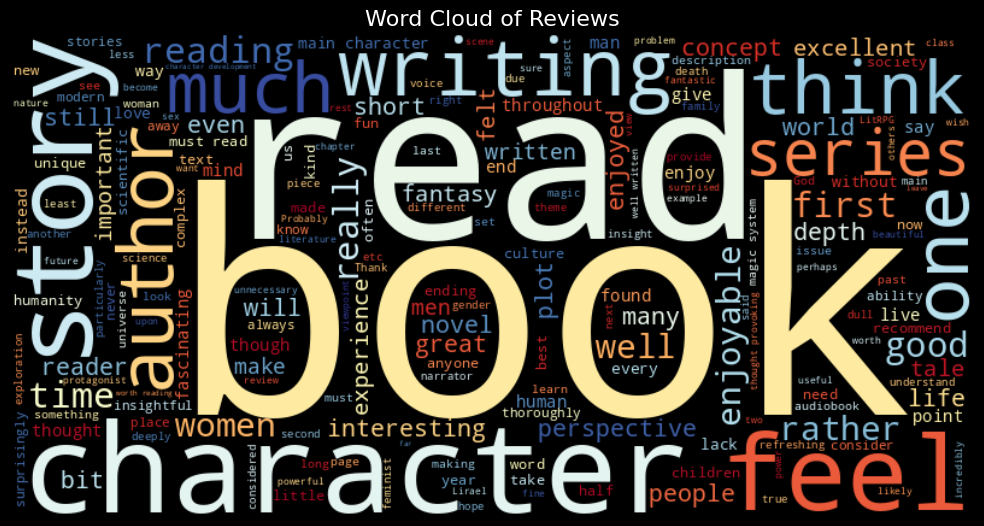

<ipython-input-62-75a060aabde4>:51: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



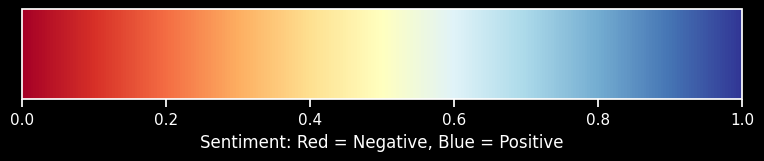

In [62]:
import re
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_review_wordcloud_with_colorbar(df):
    """
    Generate a word cloud from reviews and display a corresponding sentiment colorbar.

    Args:
        df (pd.DataFrame): DataFrame containing the 'Review' column.

    Returns:
        None: Displays the word cloud and colorbar.
    """
    # Join all reviews into a single string and clean HTML tags
    reviews = ' '.join(df['Review'].dropna())
    reviews = re.sub(r'<br/>', '', reviews)

    # Define the colormap for the WordCloud
    colormap = 'RdYlBu'

    # Create and generate the WordCloud object
    wordcloud = WordCloud(
        background_color='black',
        colormap=colormap,
        width=800,
        height=400
    ).generate(reviews)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Create a 2D array for plotting the colorbar
    colorbar_data = np.array([[0, 1]])

    # Display the colorbar
    plt.figure(figsize=(9, 1.5))
    colorbar_img = plt.imshow(colorbar_data, cmap=colormap)

    # Hide axes and add custom colorbar
    plt.gca().set_visible(False)
    colorbar_axes = plt.axes([0.1, 0.2, 0.8, 0.6])
    colorbar = plt.colorbar(orientation="horizontal", cax=colorbar_axes)
    colorbar.set_label('Sentiment: Red = Negative, Blue = Positive', fontsize=12)
    plt.tight_layout()
    plt.show()

# Usage example
plot_review_wordcloud_with_colorbar(sentiment_results)
